Todo: velká/malá!

In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet("data/cnb_vyber.parquet")

In [6]:
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))

In [7]:
df = df[df['rok'].notnull()]

In [21]:
df3 = df[['rok','072_x','245_a','245_c','520_a','650_a','653_a','655_a','964_a']].sort_values(by='rok')

In [55]:
df3.explode('072_x').groupby('072_x').size().nlargest(30)

072_x
Učební osnovy. Vyučovací předměty. Učebnice               52554
Česká próza                                               43396
Literatura pro děti a mládež (beletrie)                   36999
Biografie                                                 25311
Americká próza                                            18728
Anglická próza, anglicky psaná                            16116
Česká poezie                                              15864
Milostná, dobrodružná, fantastická próza                  15790
Literatura pro děti a mládež (naučná)                     13437
Dějiny Česka a Slovenska                                   7418
Sport. Hry. Tělesná cvičení                                7395
Patologie. Klinická medicína                               7128
Kuchařství. Potraviny. Vařená jídla                        6262
Německá próza, německy psaná                               5925
Architektura                                               5903
Vojenství. Obrana země. Ozbrojené 

In [57]:
df3.explode('653_a').groupby('653_a').size().nlargest(30)

653_a
Česká republika            695
sčítání obyvatelstva       670
sčítání bytů               581
sčítání domácností         578
sčítání domů               572
Československo             440
česká próza                382
dějiny                     380
denní četba                311
česká poezie               281
demografická statistika    259
jazyková úroveň A2         201
stol. 20., léta 90.        198
čeština jako cizí jazyk    189
křesťanský život           188
jazyková úroveň A1         182
sídelní jednotky           178
světová válka 2.           176
čeština                    173
matematika                 162
duchovní život             141
jazyková úroveň B1         138
české země                 138
politický vývoj            132
vlastivěda                 121
české pohádky              118
obce                       110
česká literatura           110
základní školy             105
firmy                      102
dtype: int64

In [59]:
df3.explode('650_a').groupby('650_a').size().nlargest(30)

650_a
čeština                            8240
Czech language                     6318
druhá světová válka (1939-1945)    4837
World War (1939-1945)              3736
matematika                         3571
křesťanský život                   3507
biblické citáty                    3294
angličtina                         2767
Christian life                     2737
Biblical quotations                2727
oborová terminologie               2598
mathematics                        2555
kultura a společnost               2484
každodenní život                   2483
čeští spisovatelé                  2450
česká literatura                   2415
Bůh a člověk                       2377
sebepoznání                        2312
fauna                              2298
účetnictví                         2244
everyday life                      2241
management                         2203
české malířství                    2166
architektonické památky            2163
cesty a pobyt                     

In [61]:
porevoluci = tema_poprve[tema_poprve > 1989].index.to_list()
porevoluci

['"normalization" (1969-1989 : Czechoslovakia)',
 '"normalization", Czechoslovakia, 1968-1989',
 '"normalization", Czechoslovakia, 1969-1989',
 "'ndrangheta",
 '1. ročník ZŠ',
 '131 (locomotives)',
 '131 (lokomotivy)',
 '141 (locomotives)',
 '141 (lokomotivy)',
 '16. stol.',
 '1919-1993',
 '1993-1999',
 '2-chlorodeoxyadenosin',
 '2. ročník ZŠ',
 '21. století',
 '360-degree feedback',
 '360stupňová zpětná vazba',
 '363 (locomotives)',
 '363 (lokomotivy)',
 '387.0 (lokomotivy)',
 '3D Studio 4.0',
 '3D Studio 4.0 (software)',
 '3D Studio MAX',
 '3D Studio MAX (computer file)',
 '3D Studio MAX (software)',
 '3D Studio MAX 2',
 '3D Studio MAX 2 (software)',
 '3D Studio MAX 3',
 '3D Studio MAX 3 (software)',
 '3D Studio MAX 4',
 '3D Studio MAX 4 (software)',
 '3D Studio MAX 5 (software)',
 '3D Studio MAX 6',
 '3D Studio MAX 6 (software)',
 '3D Studio MAX 7',
 '3D Studio MAX 7 (software)',
 '3D Studio MAX 8',
 '3D Studio MAX 8 (software)',
 '3D Studio VIZ',
 '3D Studio VIZ (software)',
 '3D S

In [41]:
tema_poprve = df3.explode('650_a').groupby('650_a')['rok'].min()
tema_valikost = df3.explode('650_a').groupby('650_a').size()

In [43]:
temata_650 = df3.explode('650_a')
pozdejsi = tema_poprve[tema_poprve >= 1945].index.to_list()
vetsi = tema_valikost[tema_valikost >= 10].index.to_list()

In [67]:
temata_650[temata_650['650_a'].isin(porevoluci)].groupby('650_a').size().nlargest(50)

650_a
channeling                          886
programs and projects               810
regional development                693
positive thinking                   629
special education                   609
sustainable development             565
counting                            538
environmental education             537
communication skills                527
educational projects                513
historical postcards                512
e-learning                          511
personnel management                505
social service                      494
internet                            463
evropské právo                      457
integrovaná výchova a vzdělávání    432
people with disabilities            425
European law                        424
dinosauři                           418
tourism                             416
dinosaurs                           403
integrated education                399
Internet                            389
globalizace                       

In [47]:
temata_650[(temata_650['650_a'].isin(pozdejsi)) & (temata_650['650_a'].isin(vetsi))]

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
bknvla00795,1945.0,[Česká poezie],Touha volyňských Čechů po vlasti /,Josef Toman,None,volynští Češi,None,[česká poezie],None
bknvla00792,1945.0,[Česká poezie],Touha volyňských Čechů po vlasti /,Josef Toman,None,volynští Češi,None,[česká poezie],None
bk194501135,1945.0,[Dějiny Česka a Slovenska],Lidice :,[podle úředních pramenů napsal Vlastimil Louda...,None,"vyhlazení Lidic (1942 : Lidice, Česko)",None,[dokumenty],None
bk194501135,1945.0,[Dějiny Česka a Slovenska],Lidice :,[podle úředních pramenů napsal Vlastimil Louda...,None,válečné zločiny,None,[dokumenty],None
bk194501135,1945.0,[Dějiny Česka a Slovenska],Lidice :,[podle úředních pramenů napsal Vlastimil Louda...,None,zločiny nacismu,None,[dokumenty],None
...,...,...,...,...,...,...,...,...,...
nkc20243606944,2024.0,[Zemědělství. Pedologie. Agrotechnika. Agroeko...,Půda :,Miloslav Šimek,None,půdní organismy,None,"[populárně-naučné publikace, obrazové publikac...",None
nkc20243606944,2024.0,[Zemědělství. Pedologie. Agrotechnika. Agroeko...,Půda :,Miloslav Šimek,None,soil,None,"[populárně-naučné publikace, obrazové publikac...",None
nkc20243606944,2024.0,[Zemědělství. Pedologie. Agrotechnika. Agroeko...,Půda :,Miloslav Šimek,None,soil ecology,None,"[populárně-naučné publikace, obrazové publikac...",None


In [51]:
temata_650.groupby('650_a')['rok'].min().sort_values()

650_a
instituce a organizace          1900.0
vlastenectví                    1900.0
zvyky a obyčeje                 1900.0
zvykové právo                   1900.0
právo                           1900.0
                                 ...  
nedžang jóga                    2024.0
prezidentky                     2024.0
plastics finishing              2024.0
science-fiction novellas        2024.0
associations of bibliophiles    2024.0
Name: rok, Length: 65879, dtype: float64

In [39]:
df3.explode('650_a').groupby('650_a')['rok'].min()

650_a
"normalization" (1969-1989 : Czechoslovakia)    1990.0
"normalization", Czechoslovakia, 1968-1989      2002.0
"normalization", Czechoslovakia, 1969-1989      1995.0
'ndrangheta                                     2010.0
1. ročník ZŠ                                    1996.0
                                                 ...  
žíla rudní                                      1978.0
žíly                                            2009.0
žíly dolních končetin                           1957.0
žížalovití                                      2011.0
žížaly                                          2002.0
Name: rok, Length: 65879, dtype: float64

In [35]:
df3.explode('650_a').groupby()

In [25]:
df3.explode('964_a').groupby('964_a').size().nlargest(20)

964_a
Pohádky                                          395
Básně                                            323
Praha - výstavy výtvarné                         298
Kuchařky (knihy)                                 291
Bibliofilie (tisky)                              201
Hry divadelní                                    189
Veselohry                                        175
Pohádky moderní                                  172
Povídky                                          157
Pohádky české                                    141
Matematika vyšší - učebnice vysokoškol.          138
Fyzika - učebnice vysokoškol.                    135
Podniky průmyslové - dějiny                      134
Hry loutkové                                     132
Básně lyrické                                    131
Brno - výstavy výtvarné                          117
pohádky české - publikace pro děti               107
Geometrie deskriptivní - učebnice vysokoškol.     94
Pohádky - hry loutkové                  

In [8]:
df2 = df[['rok','072_x','245_a','245_c','520_a','650_a','653_a','655_a','964_a']].astype(str).sort_values(by='rok')

In [9]:
df2['rok'] = df2['rok'].apply(lambda x: x.replace('.0',''))

In [10]:
def r(frejm):
    return frejm.groupby('rok').size().reindex([str(x) for x in range(1900,2025)]).fillna(0).plot.bar(figsize=(25,5))

In [11]:
df2['rok'].iloc[0]

'1900'

In [13]:
df2

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
cpk20041299307,1900,['Práce'],Co má znáti obchodní pomocník /,vydala Českoslovanská Obchodnická Beseda v Praze,None,['zaměstnanci' 'pracovněprávní vztahy' 'obchod...,None,['příručky'],None
bkn20021112105,1900,None,Princ Dedal :,ilustroval K.V. Muttich,None,None,None,None,None
bknjje08487,1900,['Česká poezie'],Jak ledy plavaly-- /,Jiří Luděk Moravský,None,None,None,['česká poezie'],None
bkn20021112103,1900,['Česká próza' 'Literatura pro děti a mládež (...,Povídky z výměnku /,české mládeži vypráví F.J. Andrlík,None,None,None,['české povídky' 'publikace pro mládež'],None
cpk20021183492,1900,['Fyzioterapie. Psychoterapie. Alternativní lé...,"Kneippovo léčení, neboli stručné pojednání o j...",napsal J. Ježek,None,['lidové léčitelství'],None,['příručky'],None
...,...,...,...,...,...,...,...,...,...
nkc20243601102,2024,"['Německá poezie, německy psaná']",Seyfriedovy runy a další vzpomínky na germánsk...,"Karl Maria Wiligut, Anton Vrbka ; z německého ...",None,['germánská mytologie' 'Germanic mythology'],None,['rakouská poezie' 'komentovaná vydání' 'Austr...,None
nkc20243601094,2024,['Patologie. Klinická medicína'],Gastroenterologie :,"autoři: Radek Kroupa, Jiří Cyrany, Jiří Dolina...",None,['gastroenterologie' 'diagnostika (lékařství)'...,None,['metodické příručky' 'methodological manuals'],None
nkc20243601149,2024,['Literatura pro děti a mládež (beletrie)'],Červená Karkulka ;,None,['Bohatě ilustrované leporelo obsahuje převypr...,None,None,['pohádky' 'leporela' 'publikace pro děti' 'fa...,None


<Axes: xlabel='rok'>

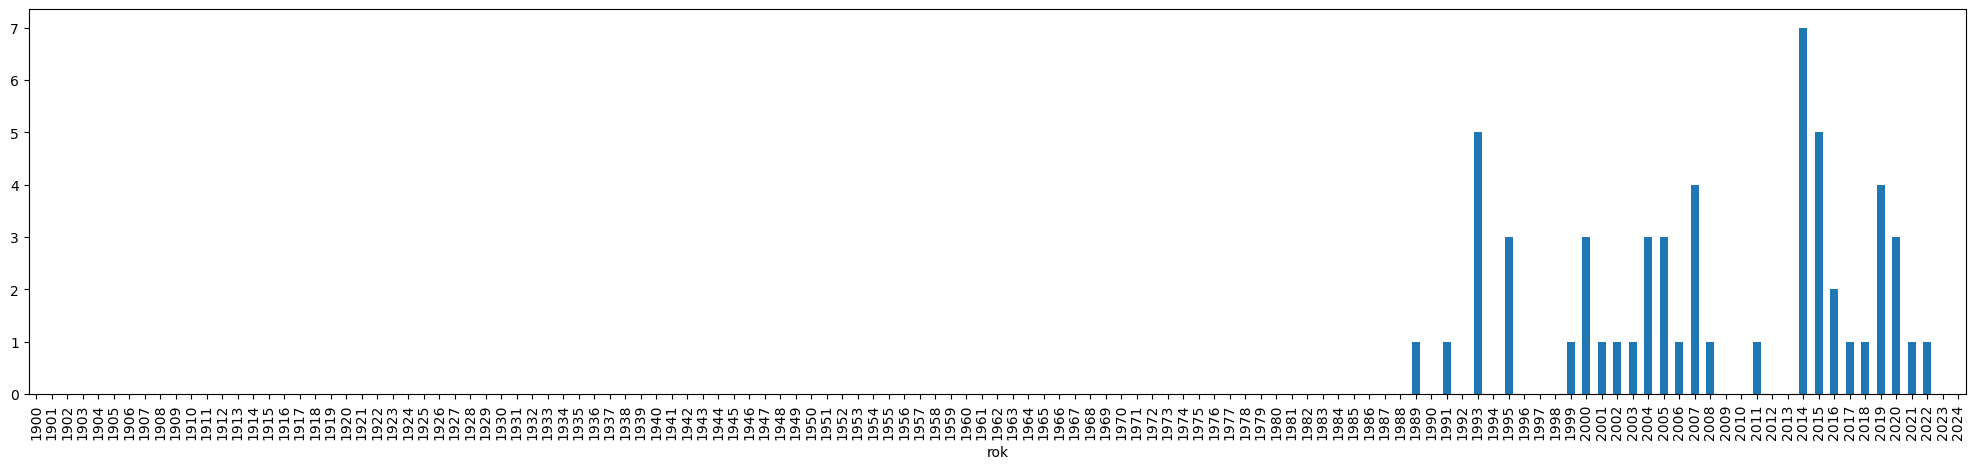

In [252]:
r(df2[df2.apply(lambda row: any("HIV" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

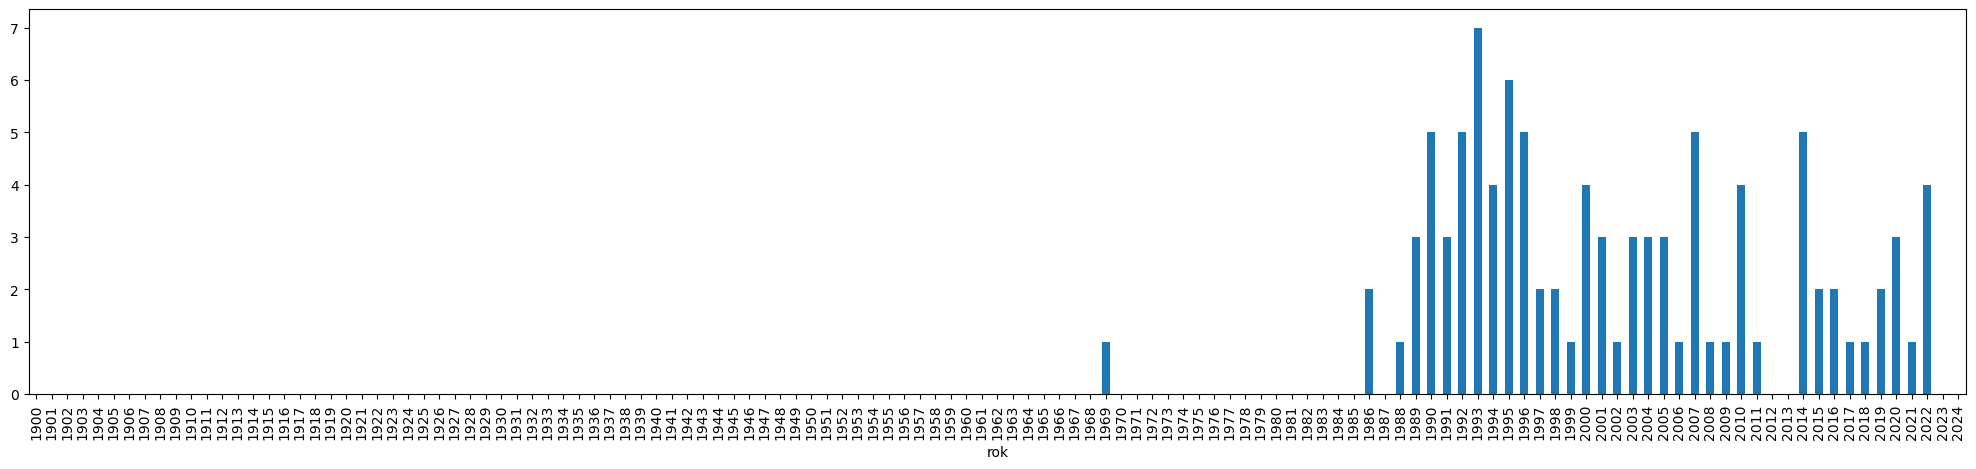

In [250]:
r(df2[df2.apply(lambda row: any("AIDS" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

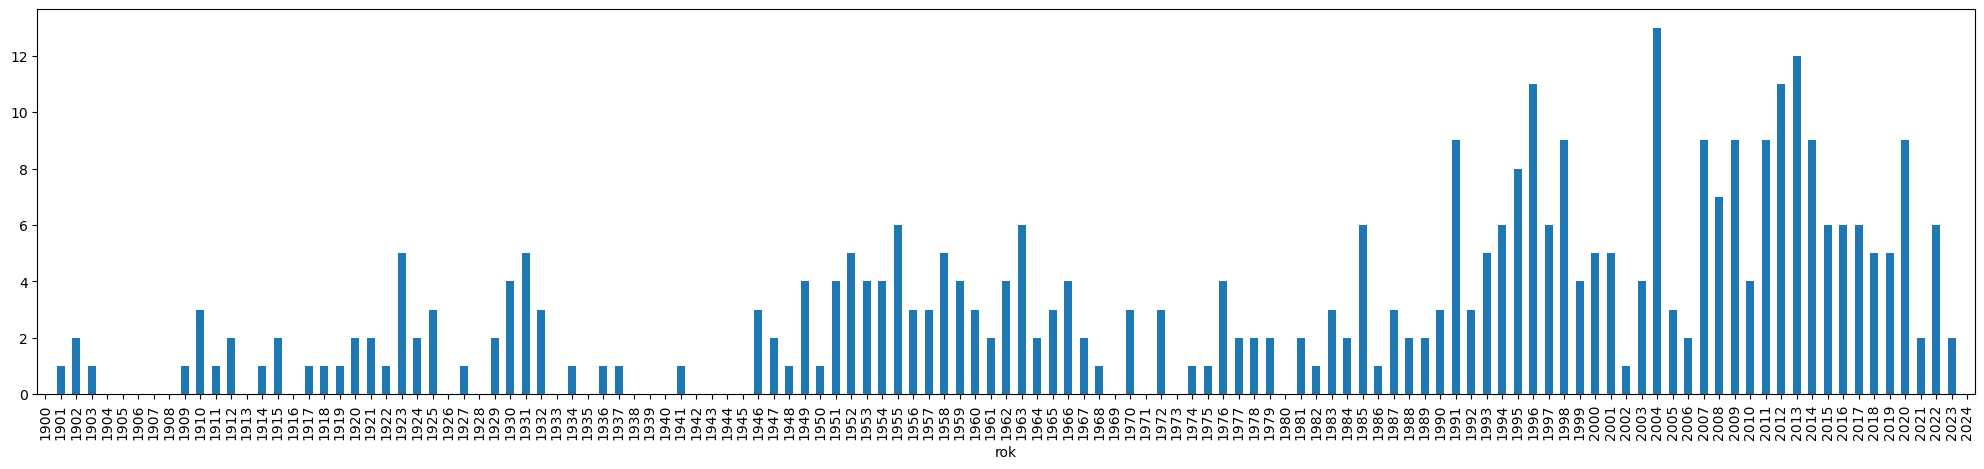

In [280]:
r(df2[df2.apply(lambda row: any("konop" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

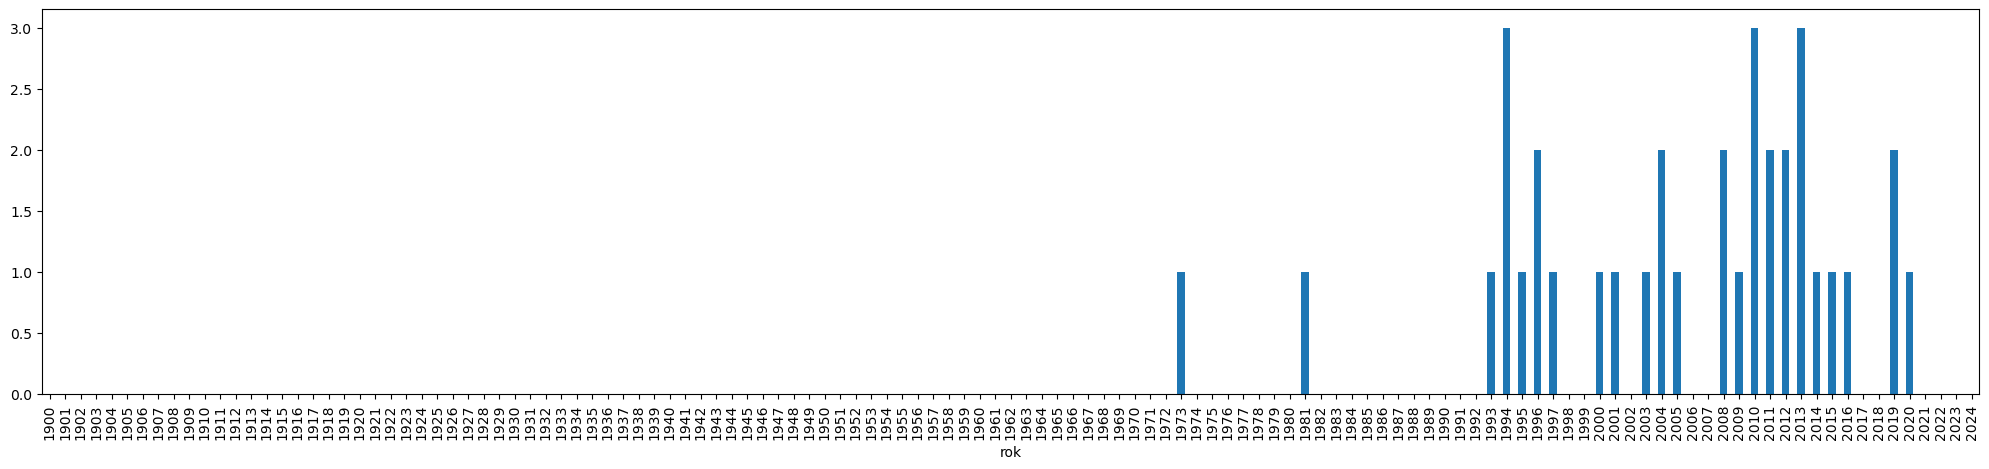

In [281]:
r(df2[df2.apply(lambda row: any("marihuan" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

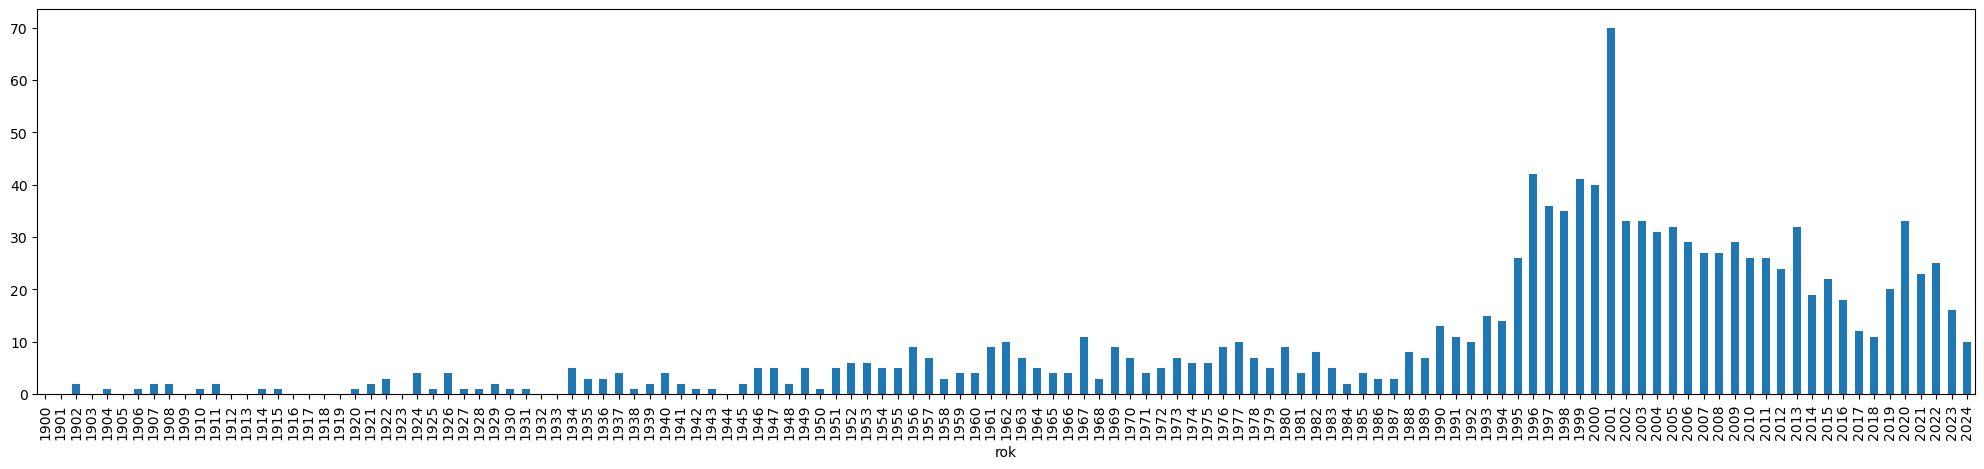

In [283]:
r(df2[df2.apply(lambda row: any("drog" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

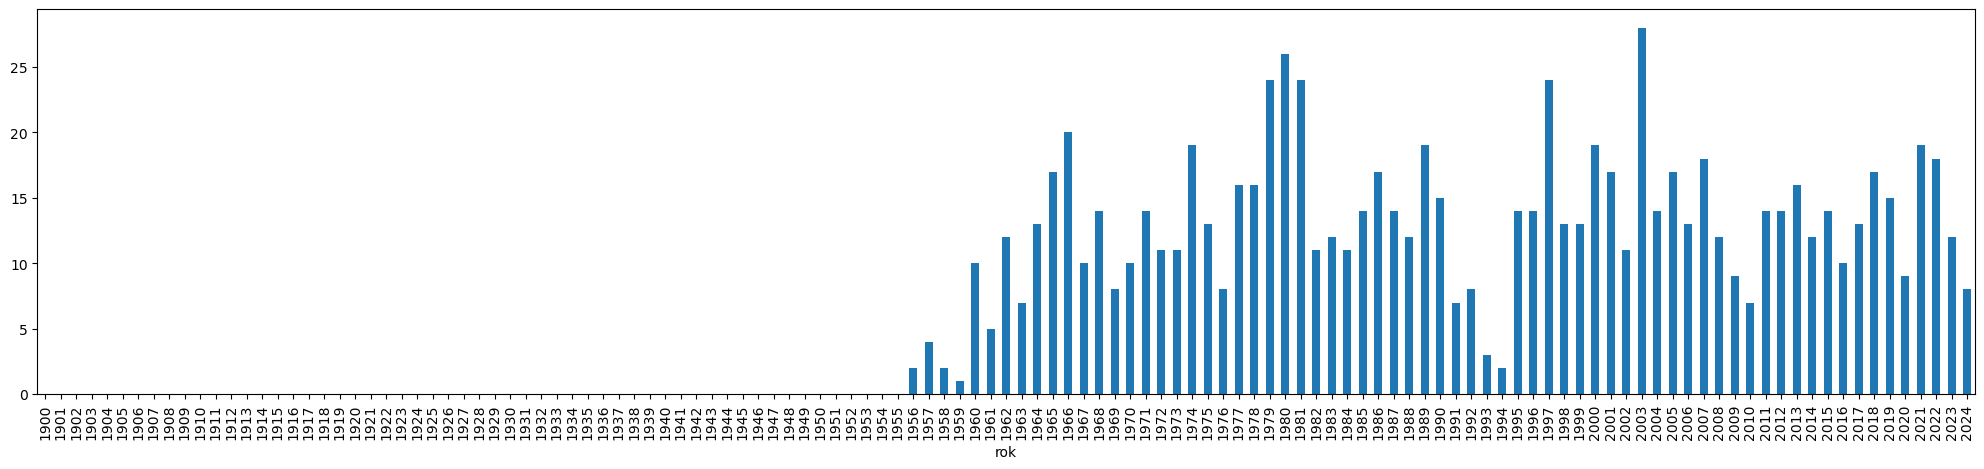

In [282]:
r(df2[df2.apply(lambda row: any("kyberneti" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

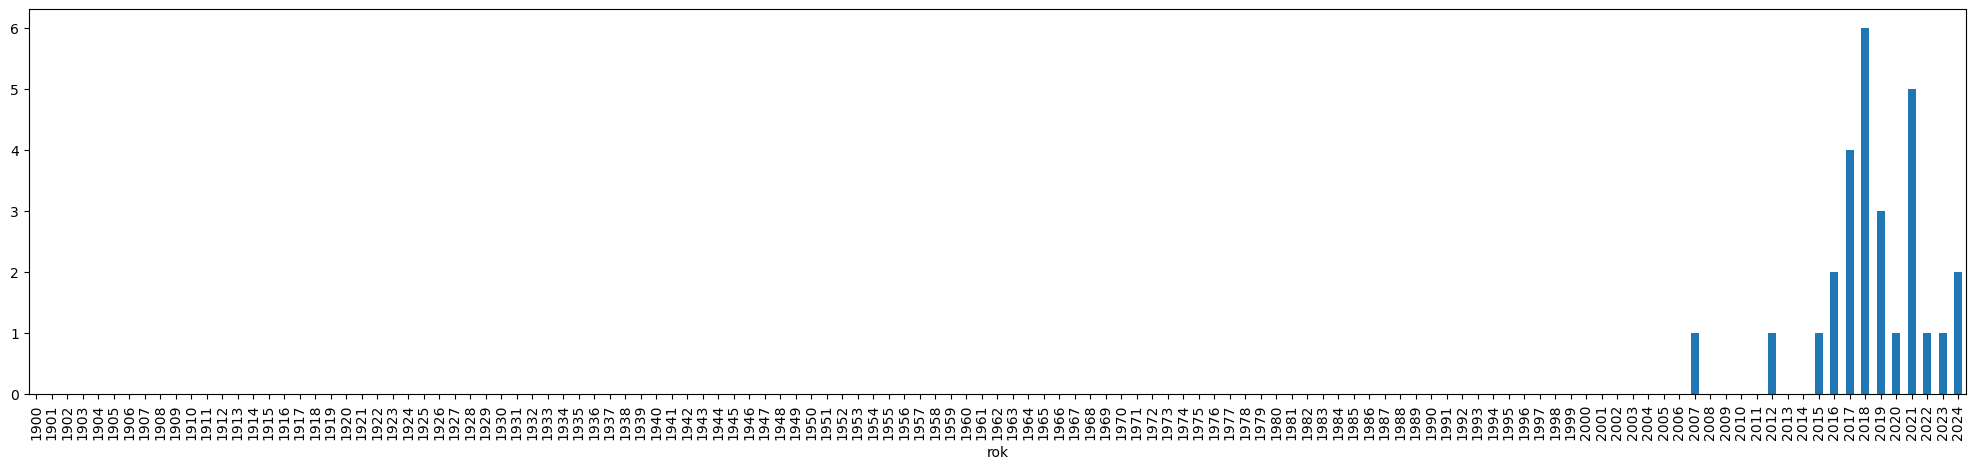

In [348]:
r(df2[df2.apply(lambda row: any("youtube" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

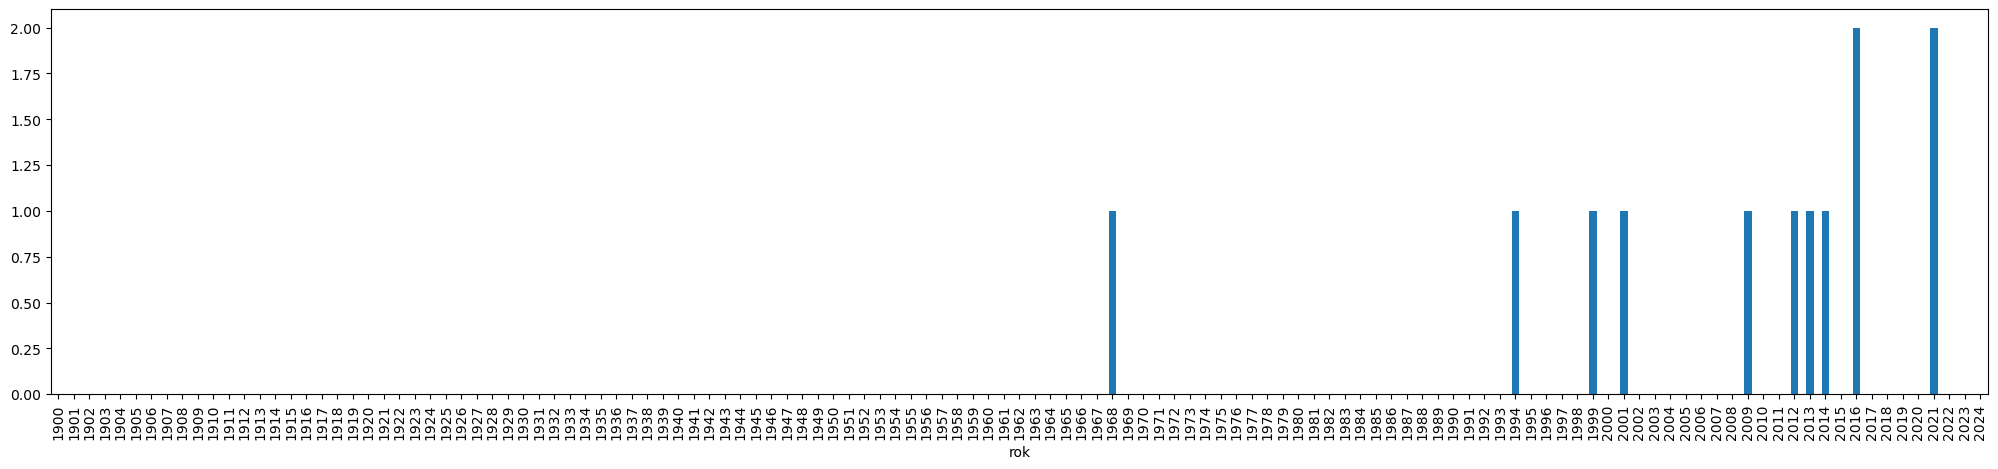

In [373]:
r(df2[df2.apply(lambda row: any("sadomaso" in str(value).lower() for value in row), axis=1)])

In [382]:
df2[df2.apply(lambda row: any("sadomaso" in str(value).lower() for value in row), axis=1)].head(2)

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
bk196802996,1968,None,['Lež romantismu a pravda románu /'],['René Girard ; z francouzského originálu ... ...,['Studie francouzského esejisty vychází z romá...,None,None,None,"['Román - stol. 19.-20., 1. pol. - rozbory kri..."
np9539153,1994,None,['S kůží na trh aneb Otrokářova zpověď :'],['Jiří Hartmann'],None,['sadomasochismus' 'homosexuálové'],None,['informační publikace'],None


<Axes: xlabel='rok'>

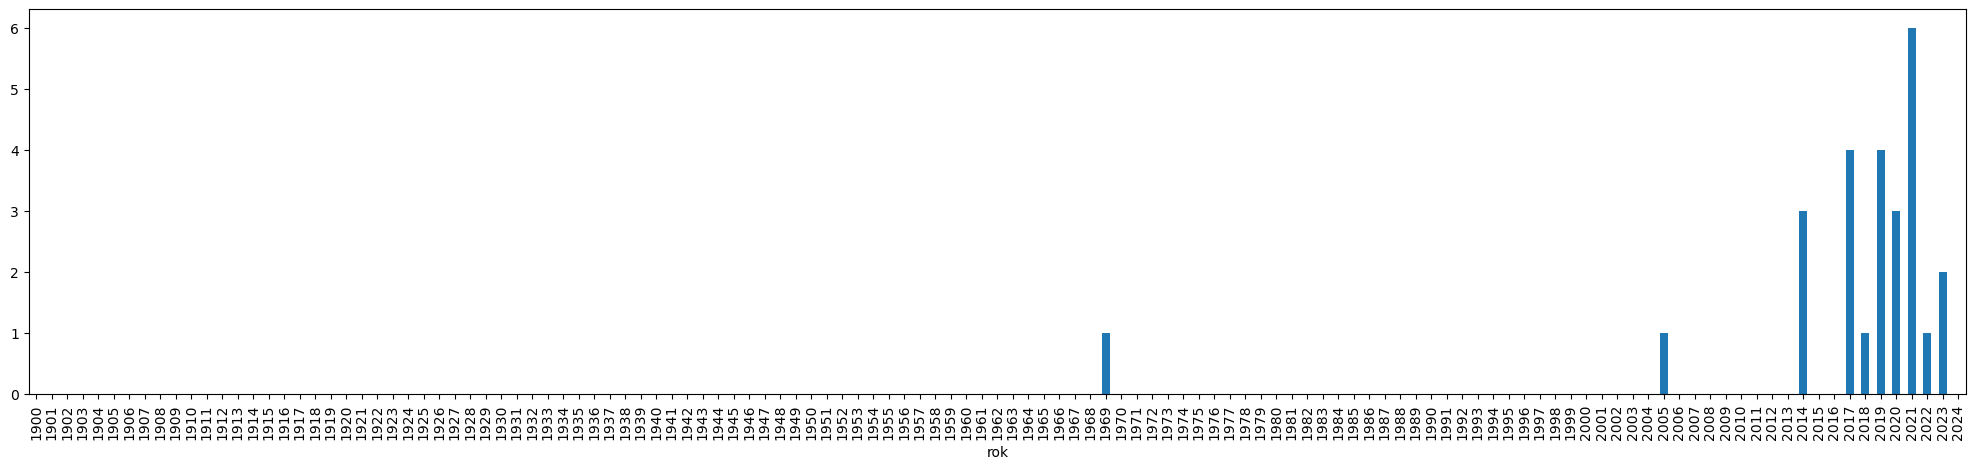

In [393]:
r(df2[df2.apply(lambda row: any("Babiš" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

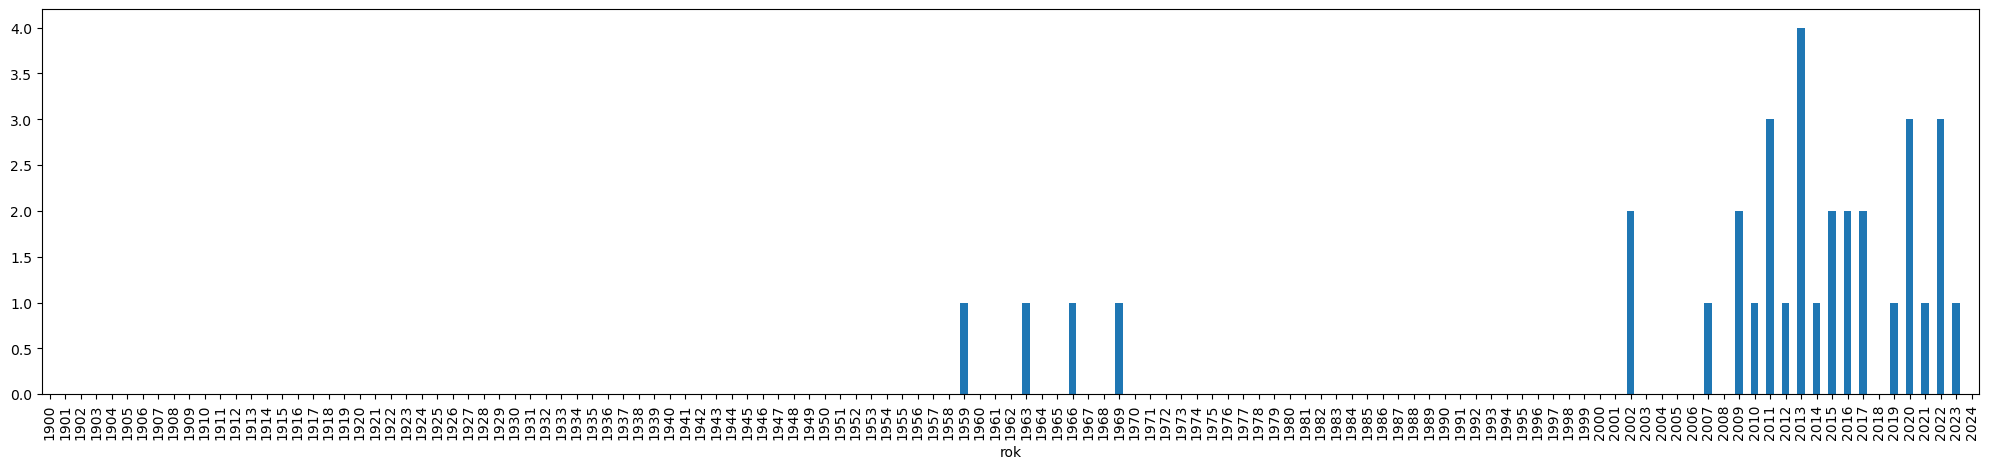

In [390]:
r(df2[df2.apply(lambda row: any("neoliber" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

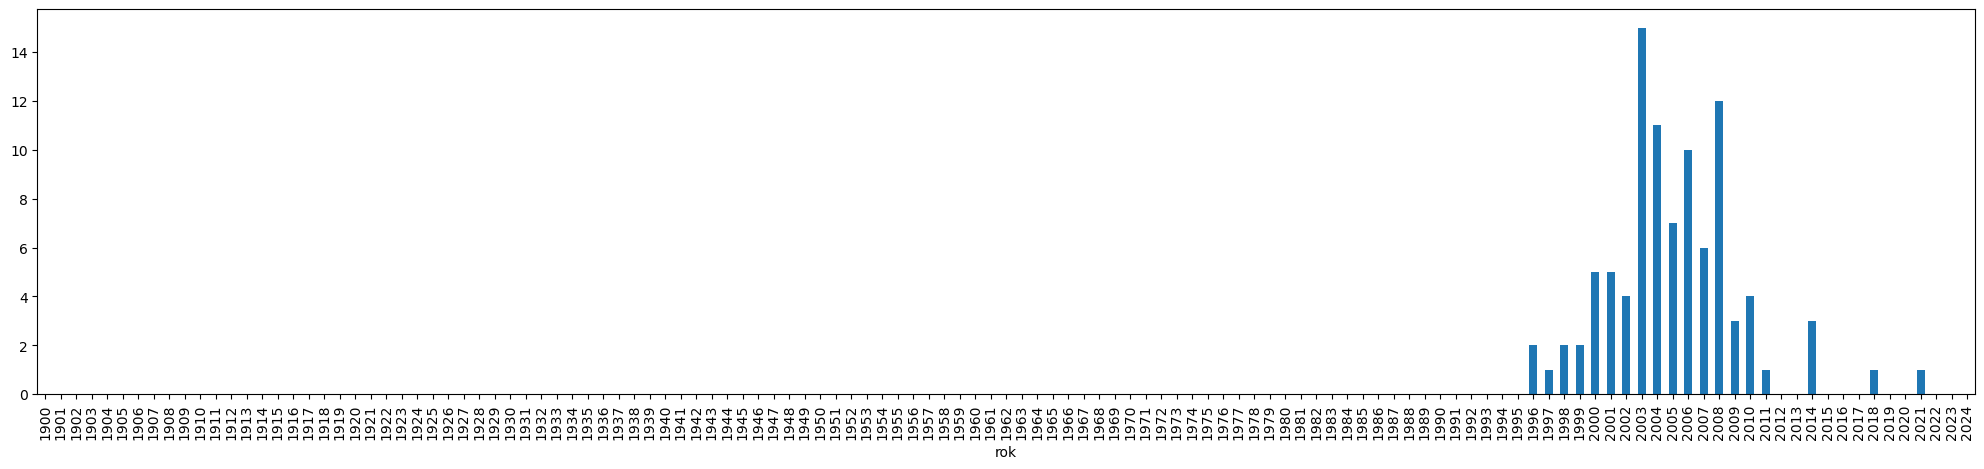

In [396]:
r(df2[df2.apply(lambda row: any("linux" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

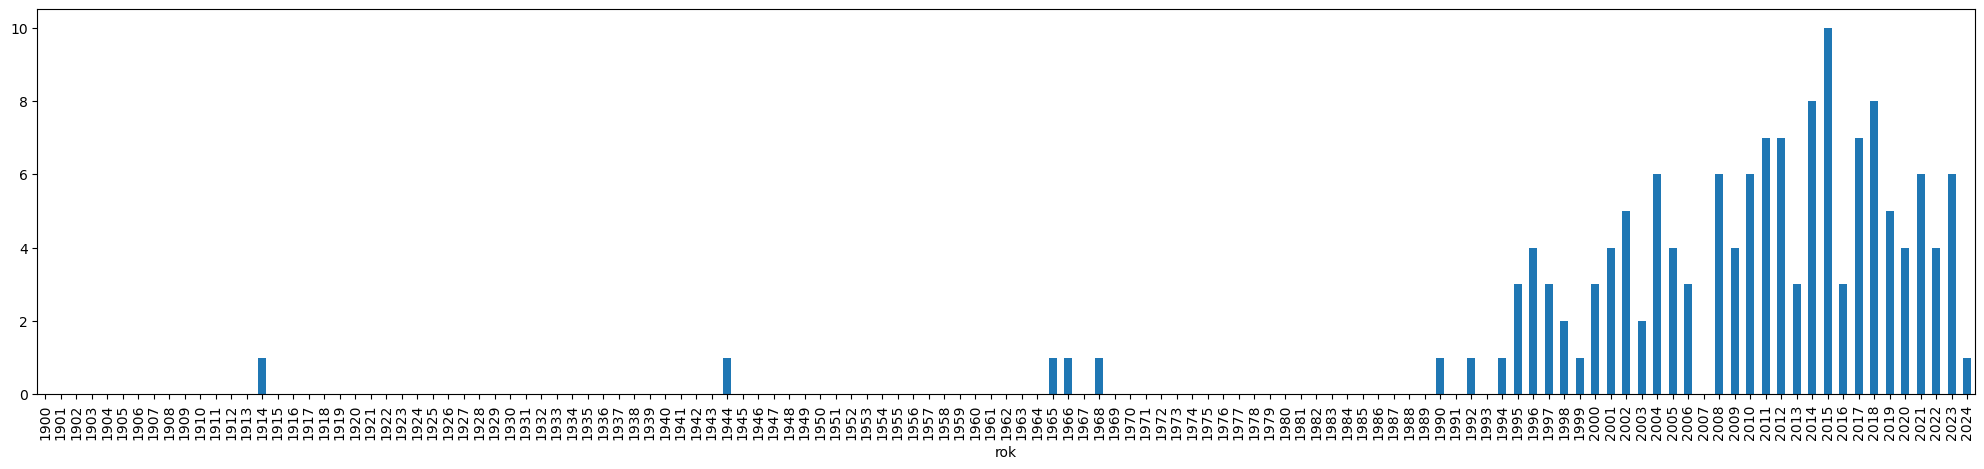

In [405]:
r(df2[df2.apply(lambda row: any("tantr" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

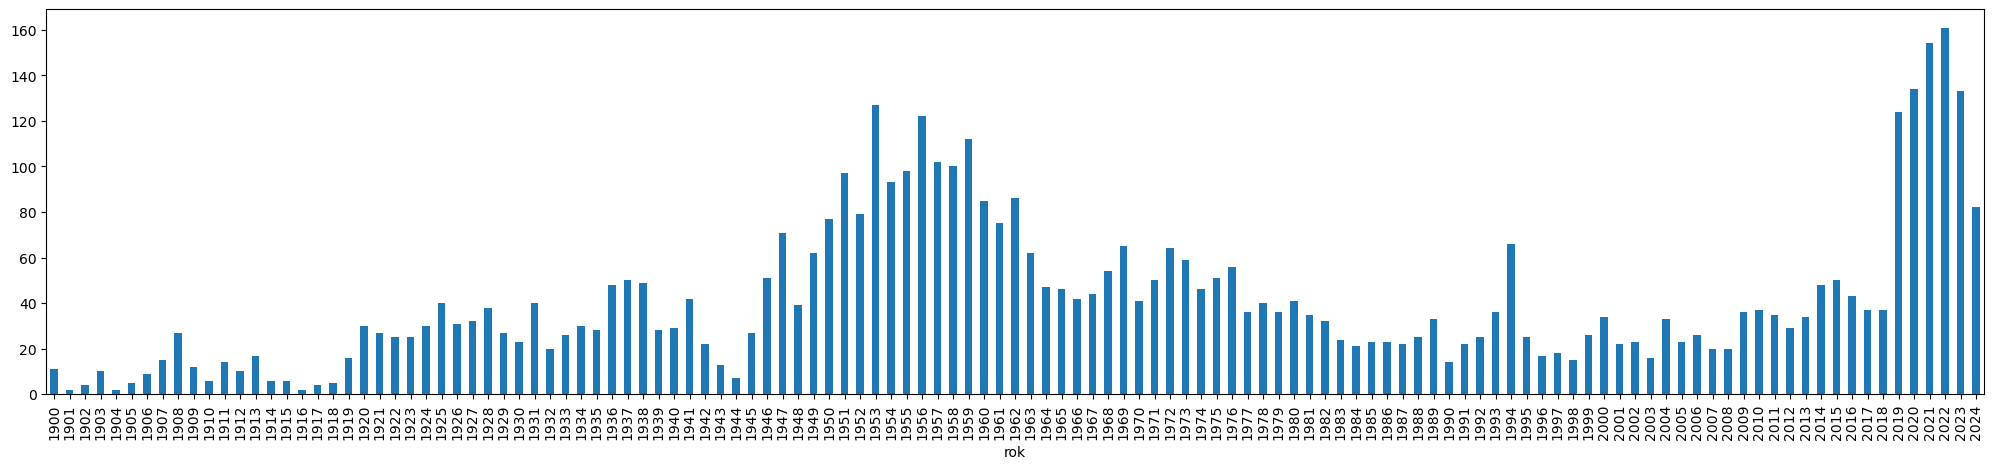

In [412]:
r(df2[df2.apply(lambda row: any("družst" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

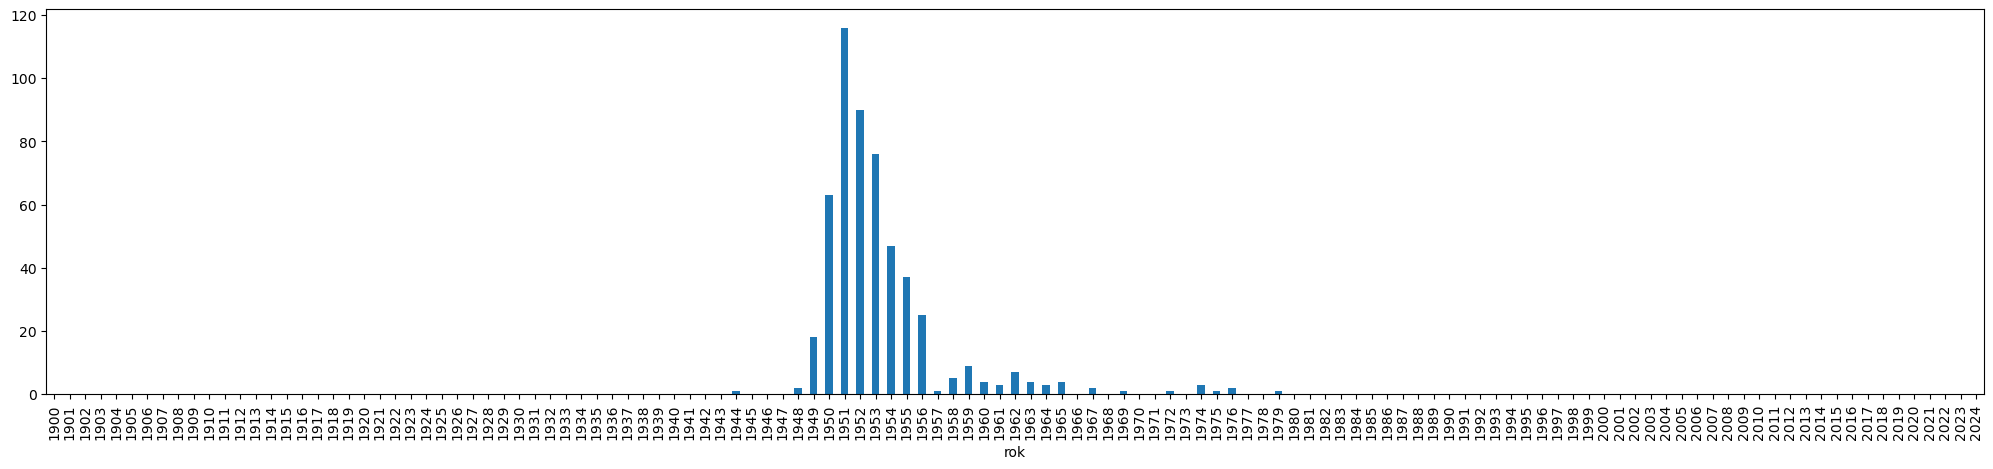

In [411]:
r(df2[df2.apply(lambda row: any("kolchoz" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

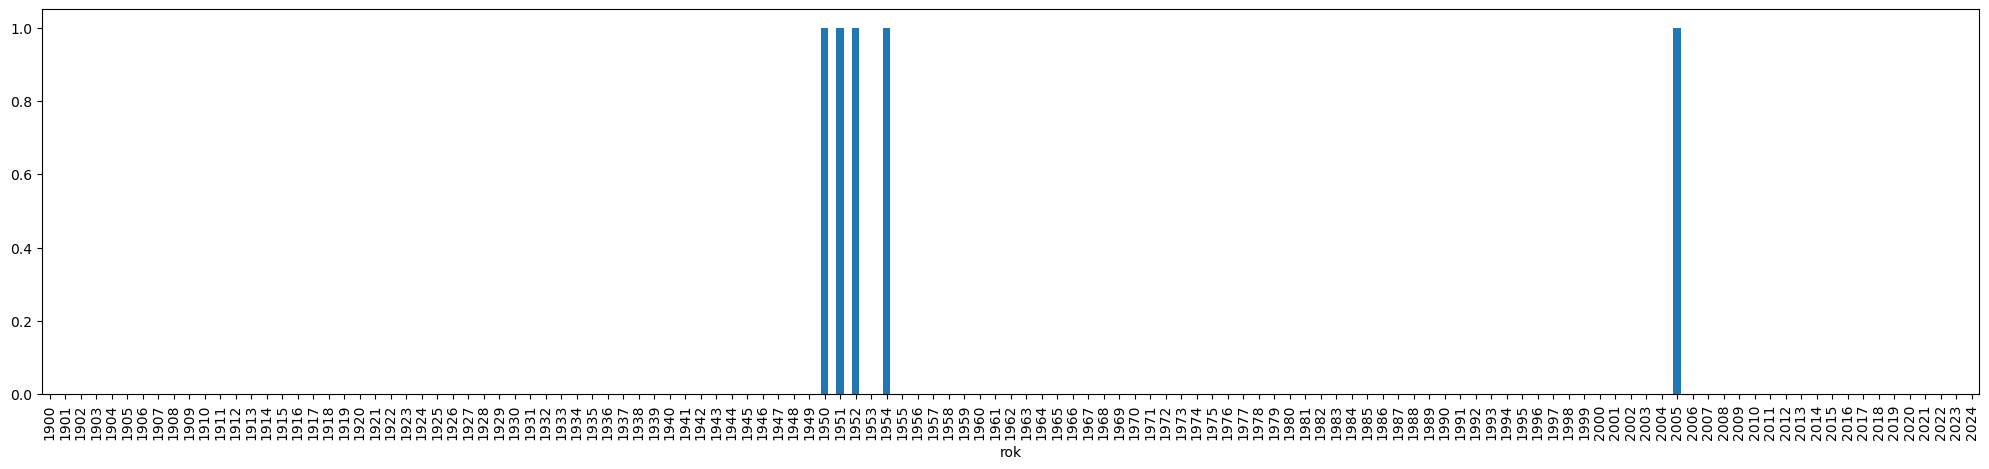

In [410]:
r(df2[df2.apply(lambda row: any("gorodk" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

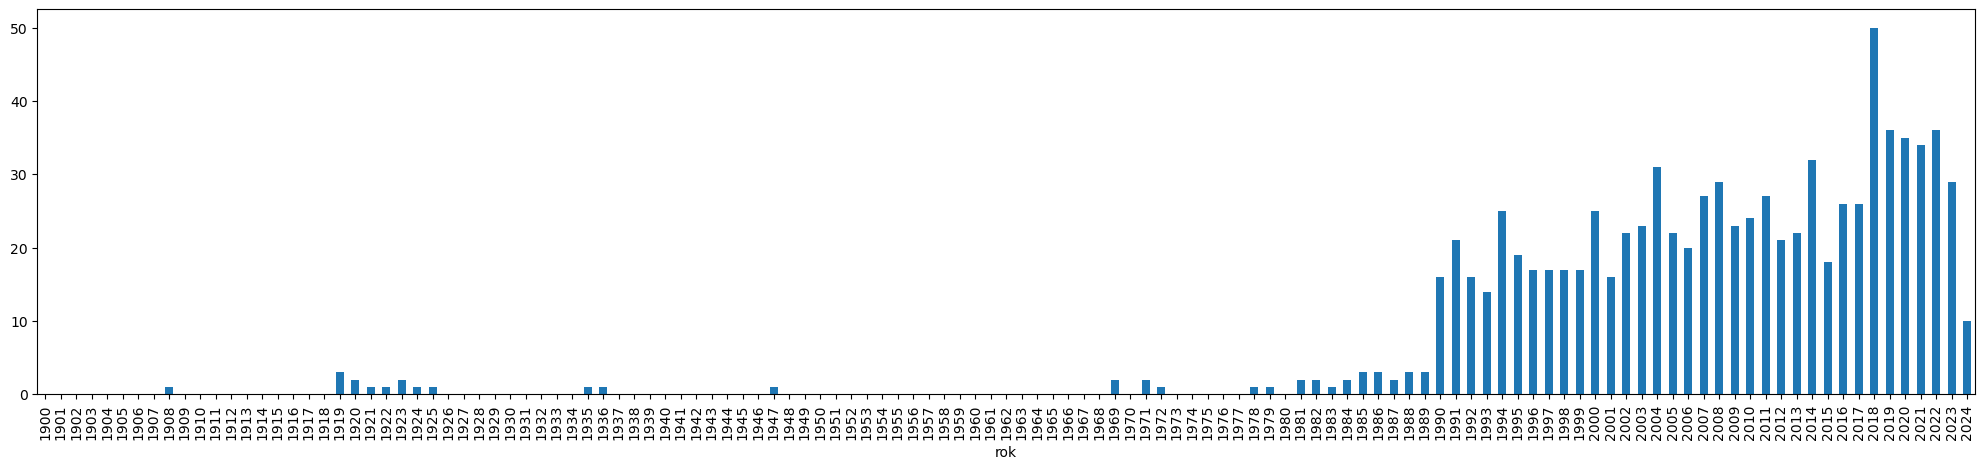

In [404]:
r(df2[df2.apply(lambda row: any("jóga" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

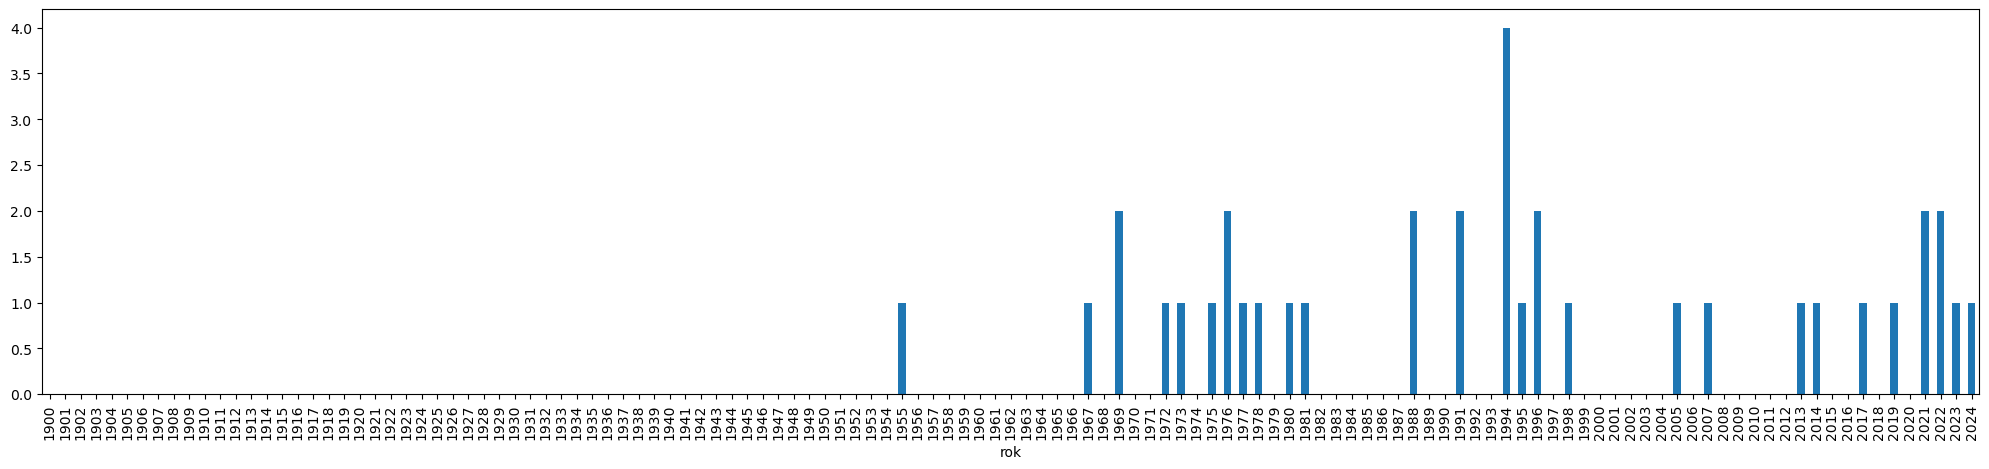

In [435]:
r(df2[df2.apply(lambda row: any("narkom" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

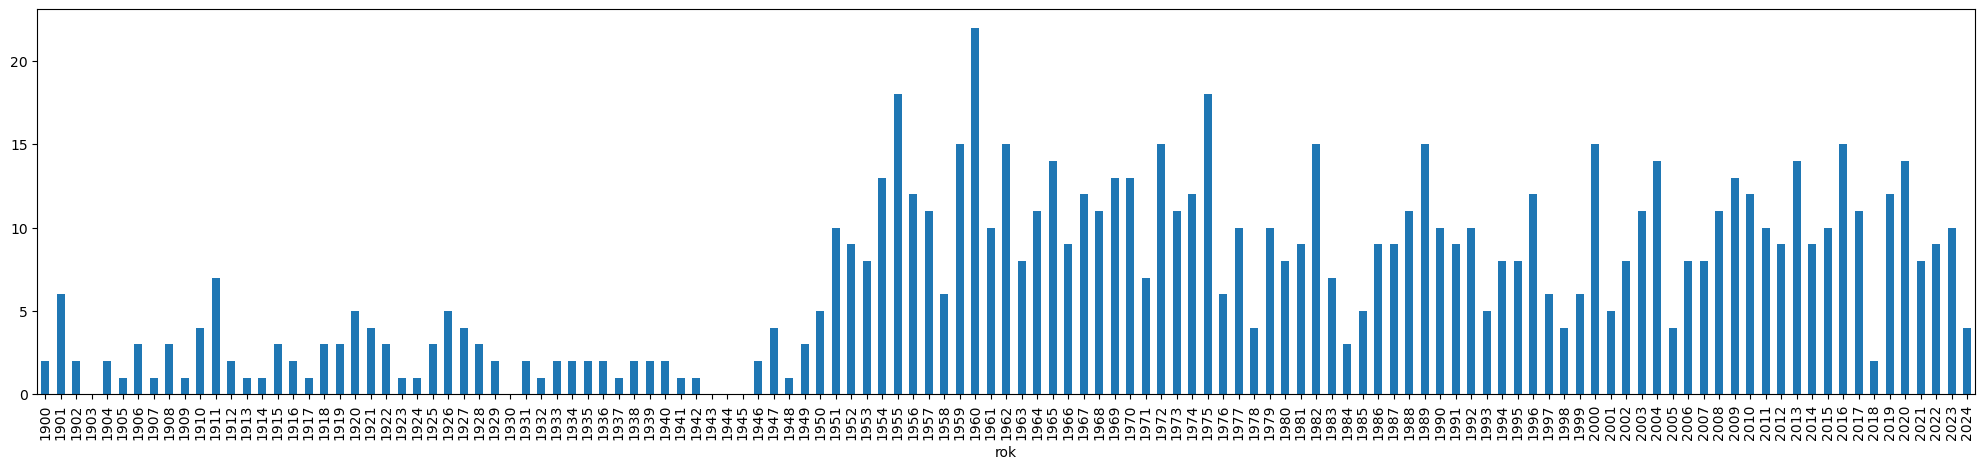

In [433]:
r(df2[df2.apply(lambda row: any("rozvod" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

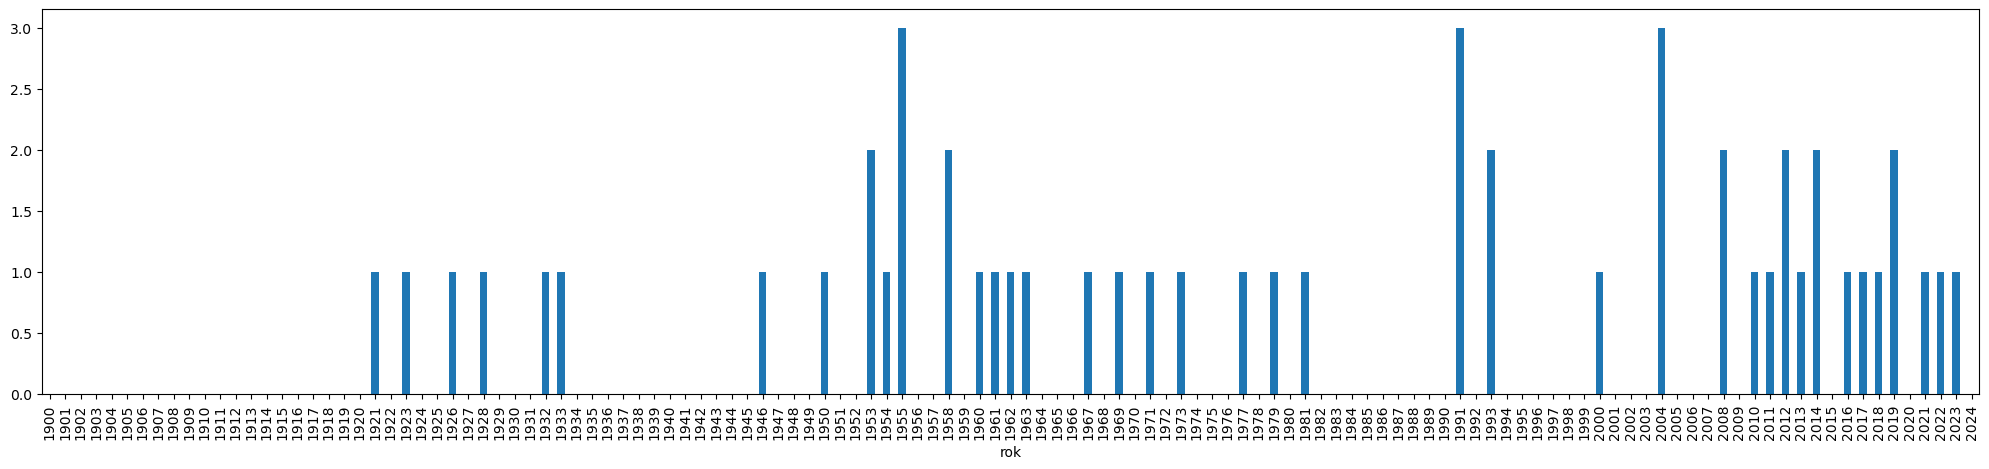

In [431]:
r(df2[df2.apply(lambda row: any("potrat" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

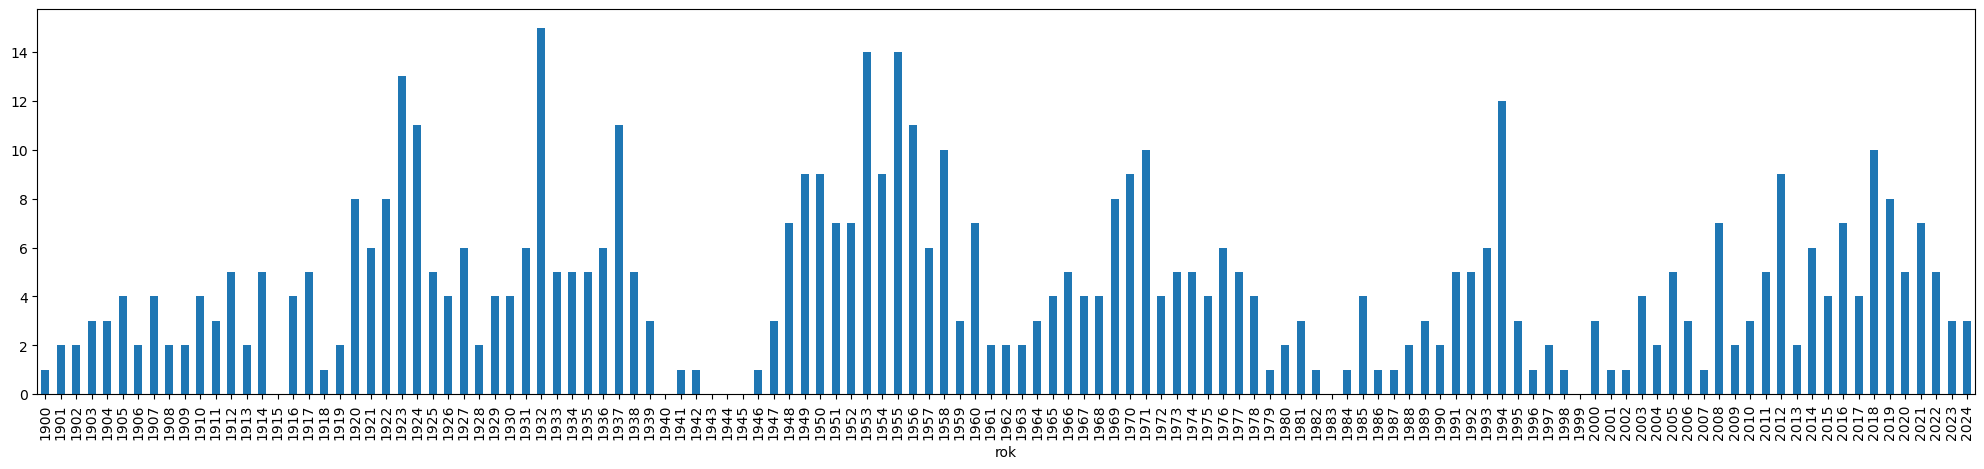

In [430]:
r(df2[df2.apply(lambda row: any("pohlavní" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

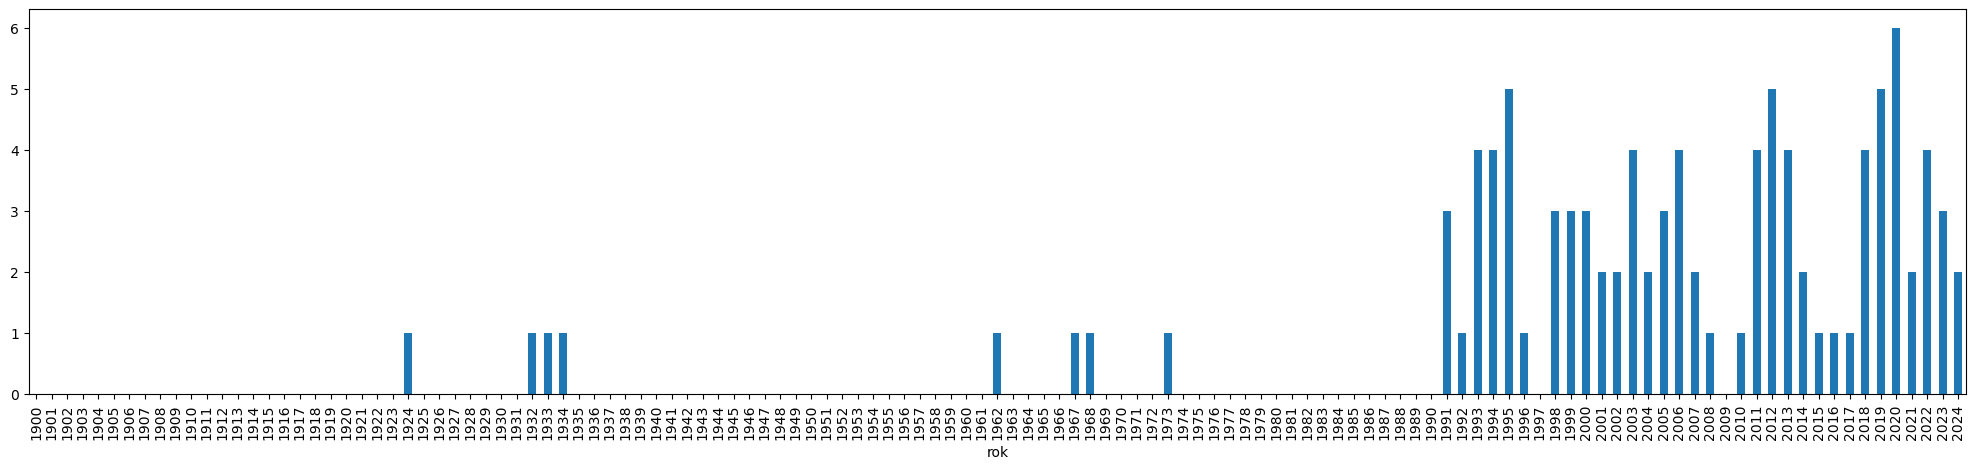

In [427]:
r(df2[df2.apply(lambda row: any("homosex" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

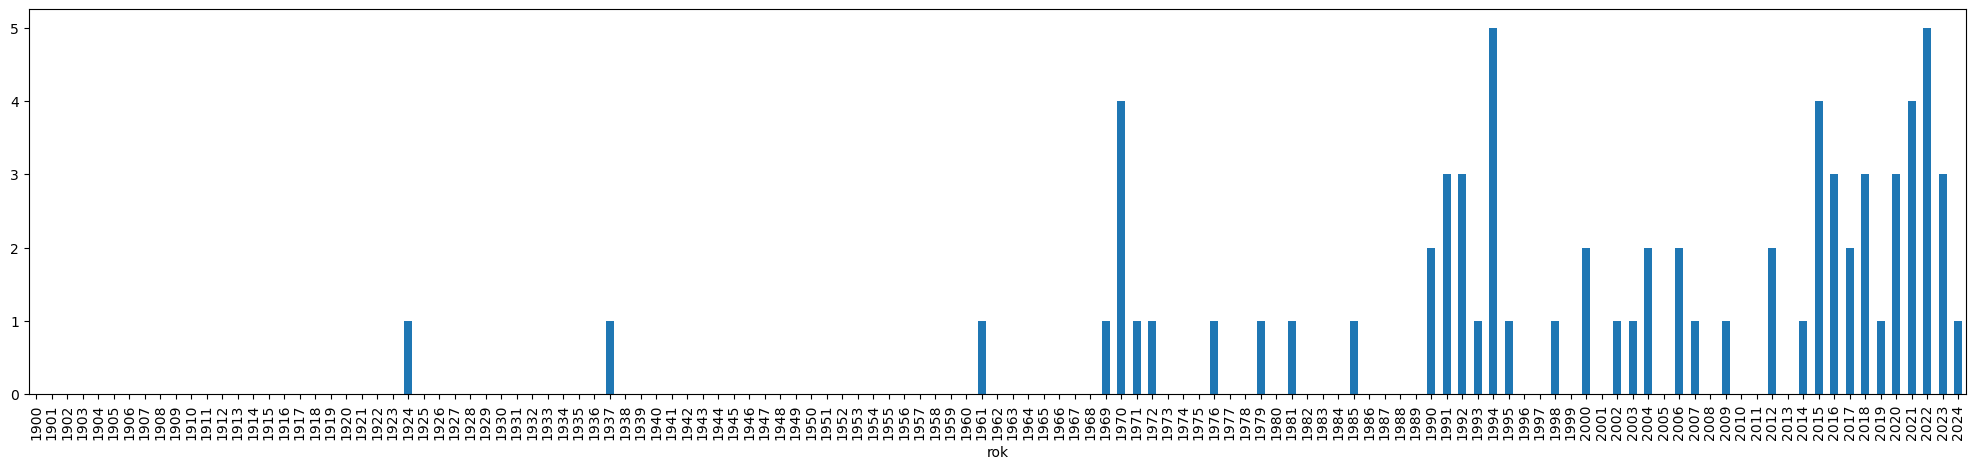

In [426]:
r(df2[df2.apply(lambda row: any("bezmas" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

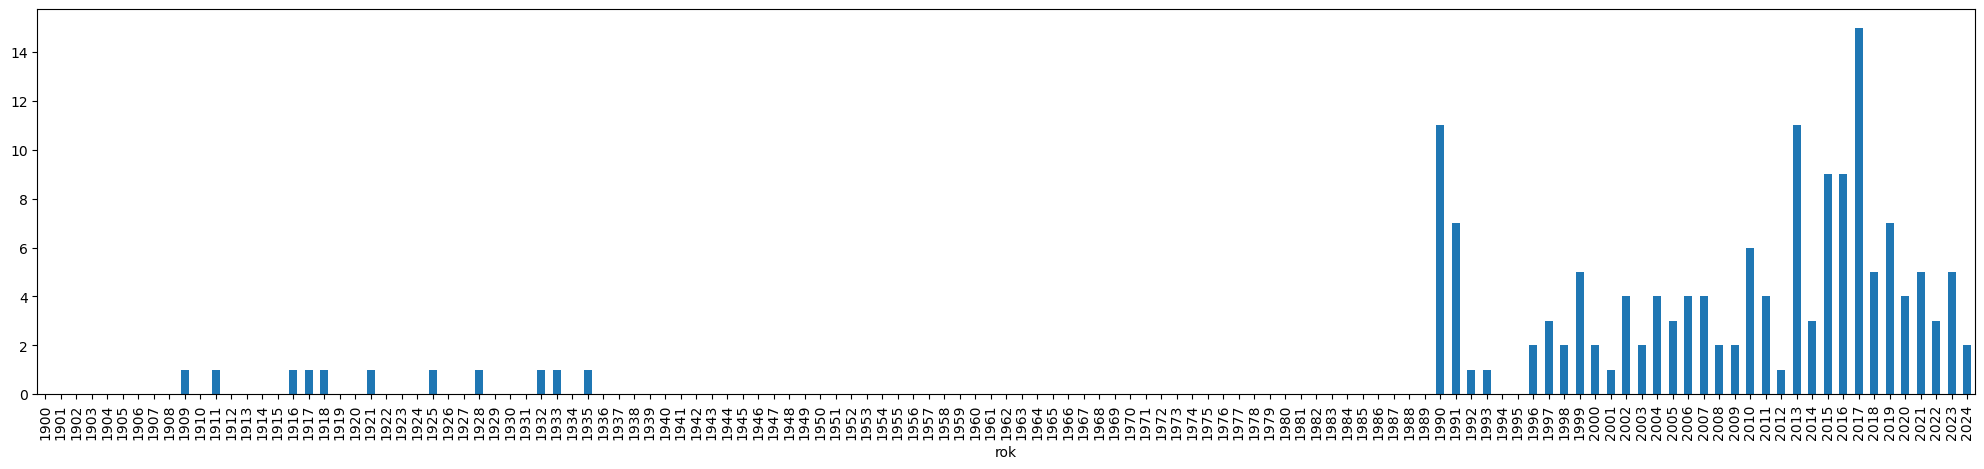

In [424]:
r(df2[df2.apply(lambda row: any("vegetar" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

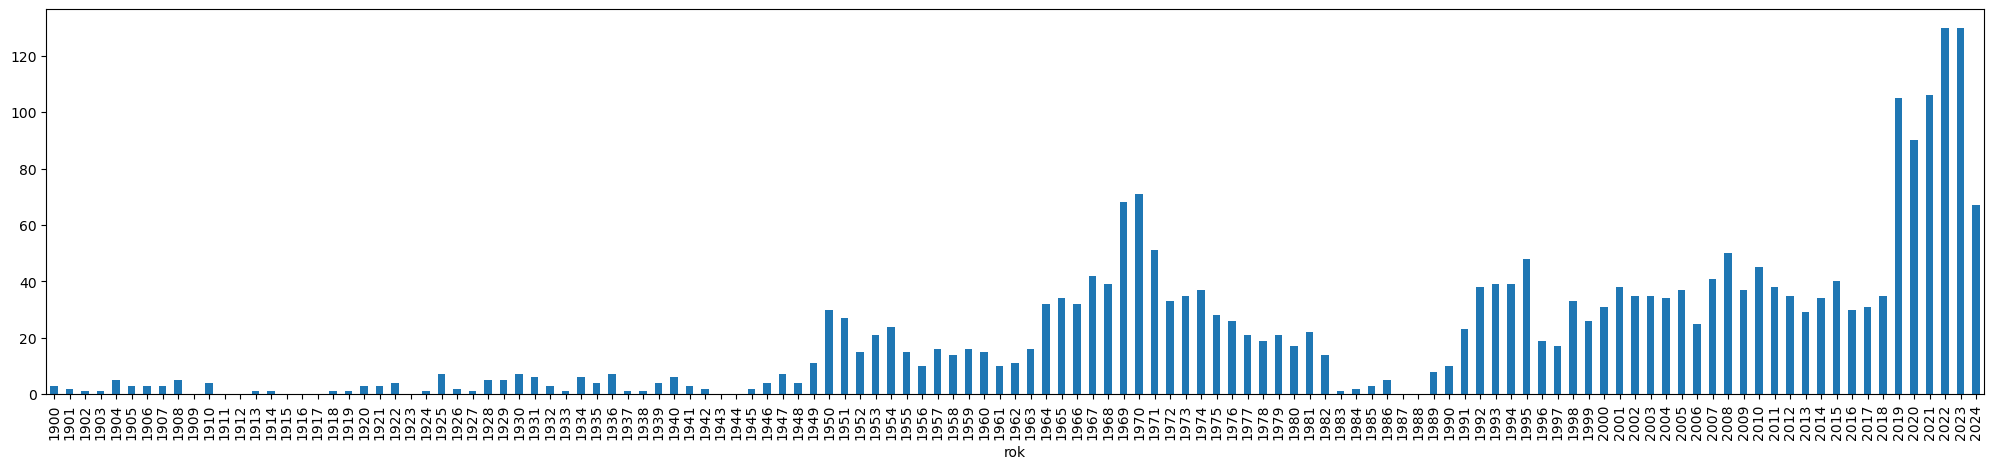

In [415]:
r(df2[df2.apply(lambda row: any("vražd" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

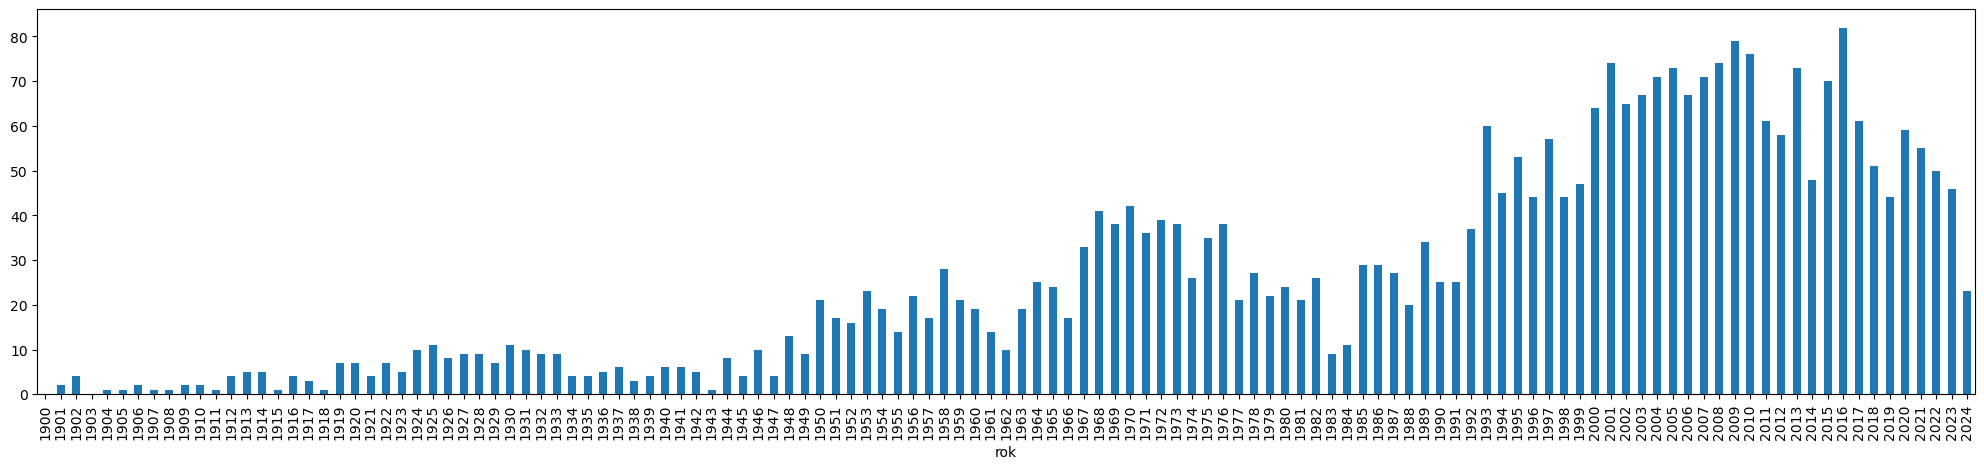

In [421]:
r(df2[df2.apply(lambda row: any("milen" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

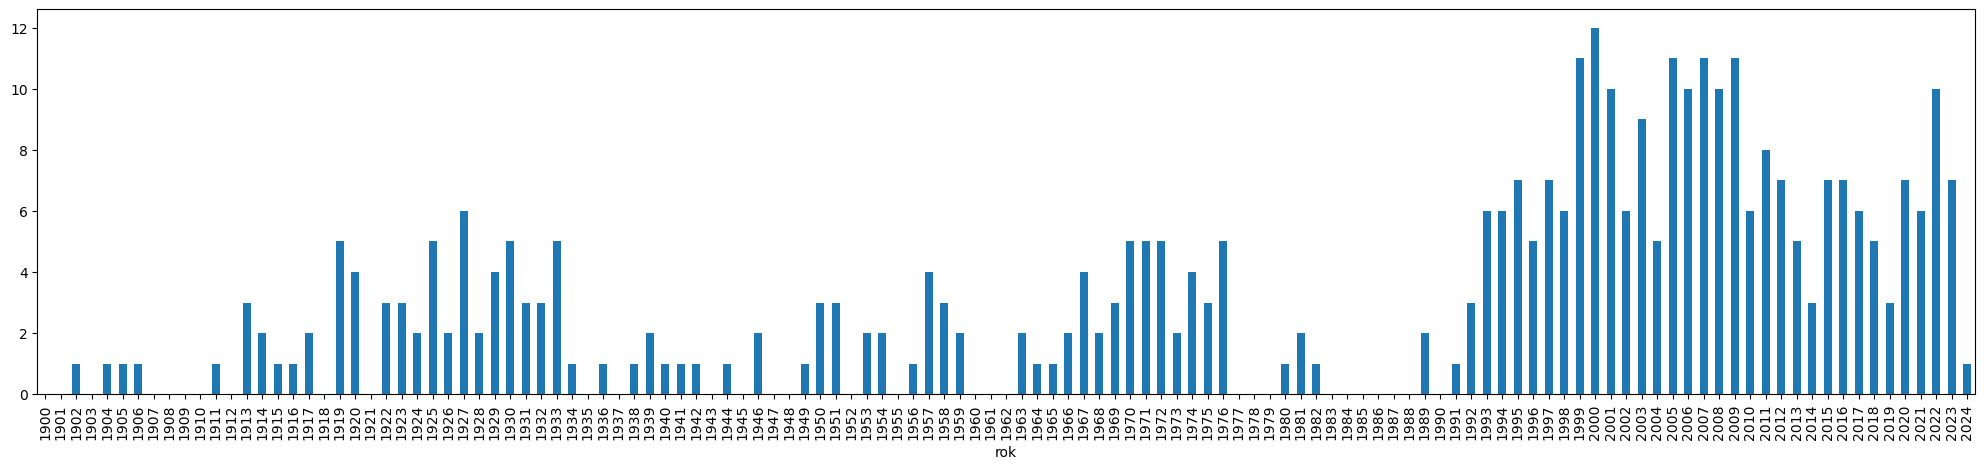

In [414]:
r(df2[df2.apply(lambda row: any("milenk" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

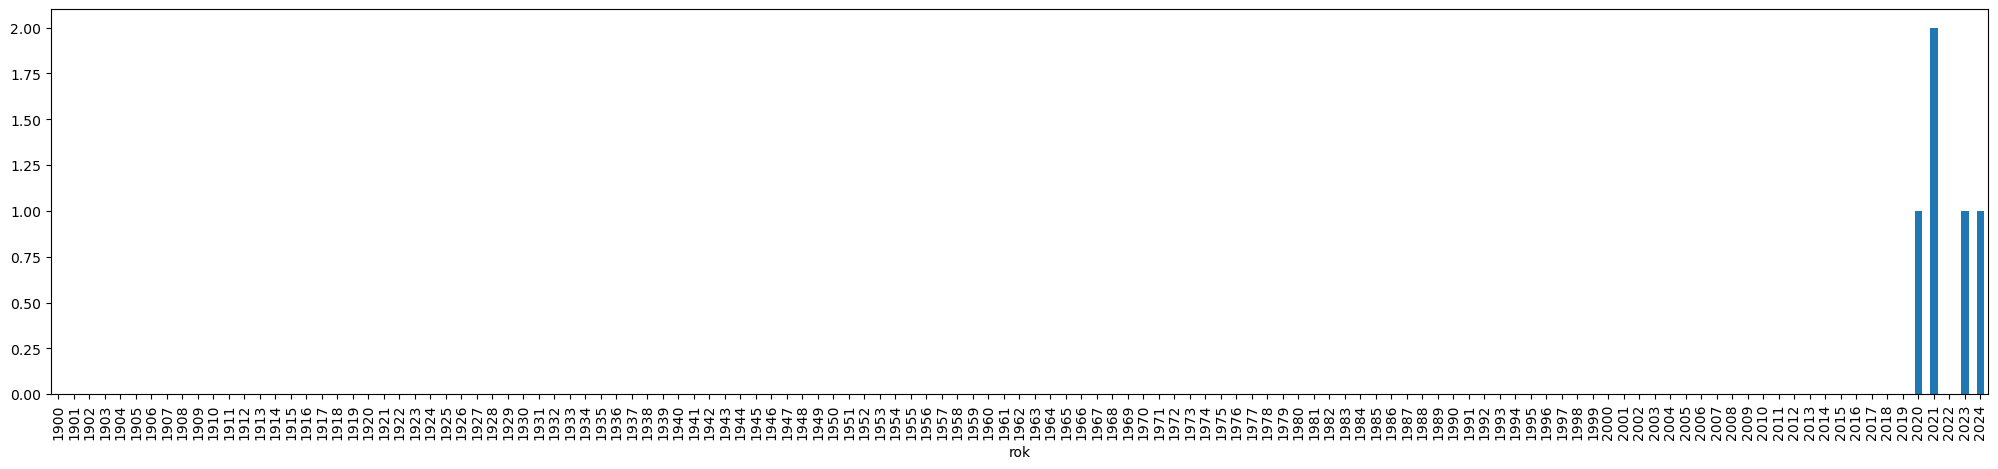

In [417]:
r(df2[df2.apply(lambda row: any("cyberpunk" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

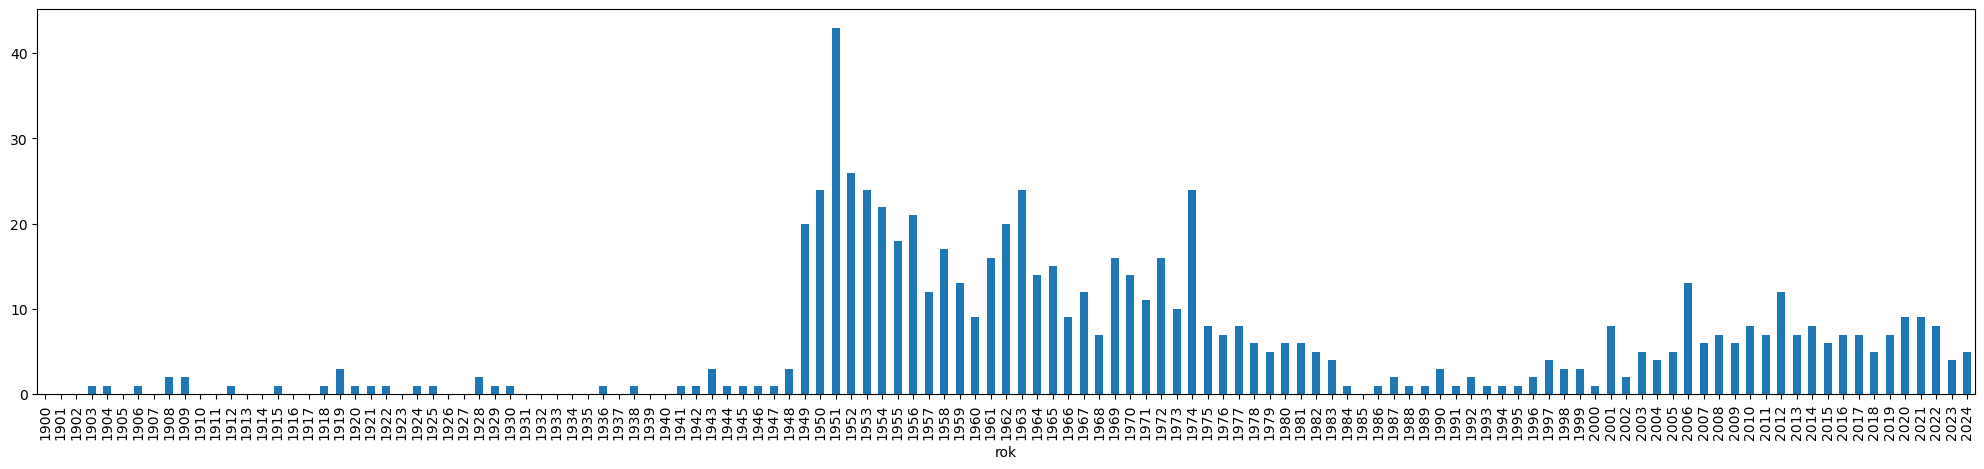

In [402]:
r(df2[df2.apply(lambda row: any("bohatstv" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

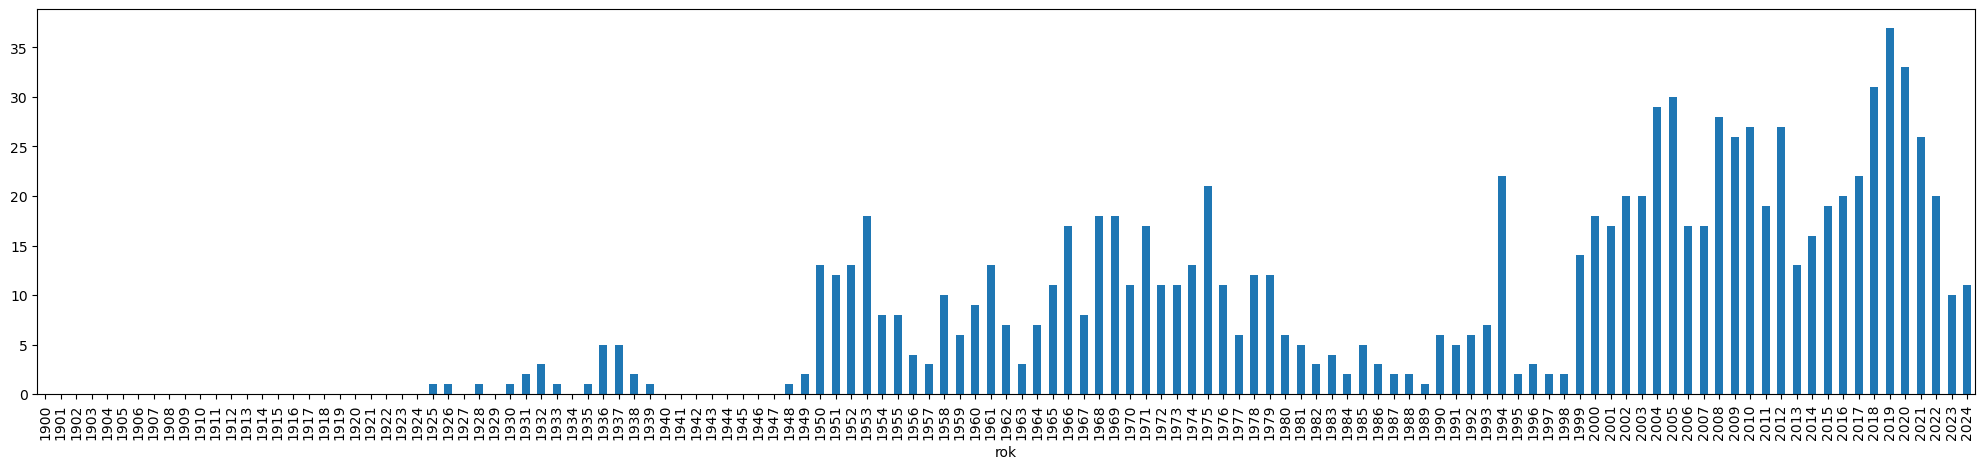

In [400]:
r(df2[df2.apply(lambda row: any("špion" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

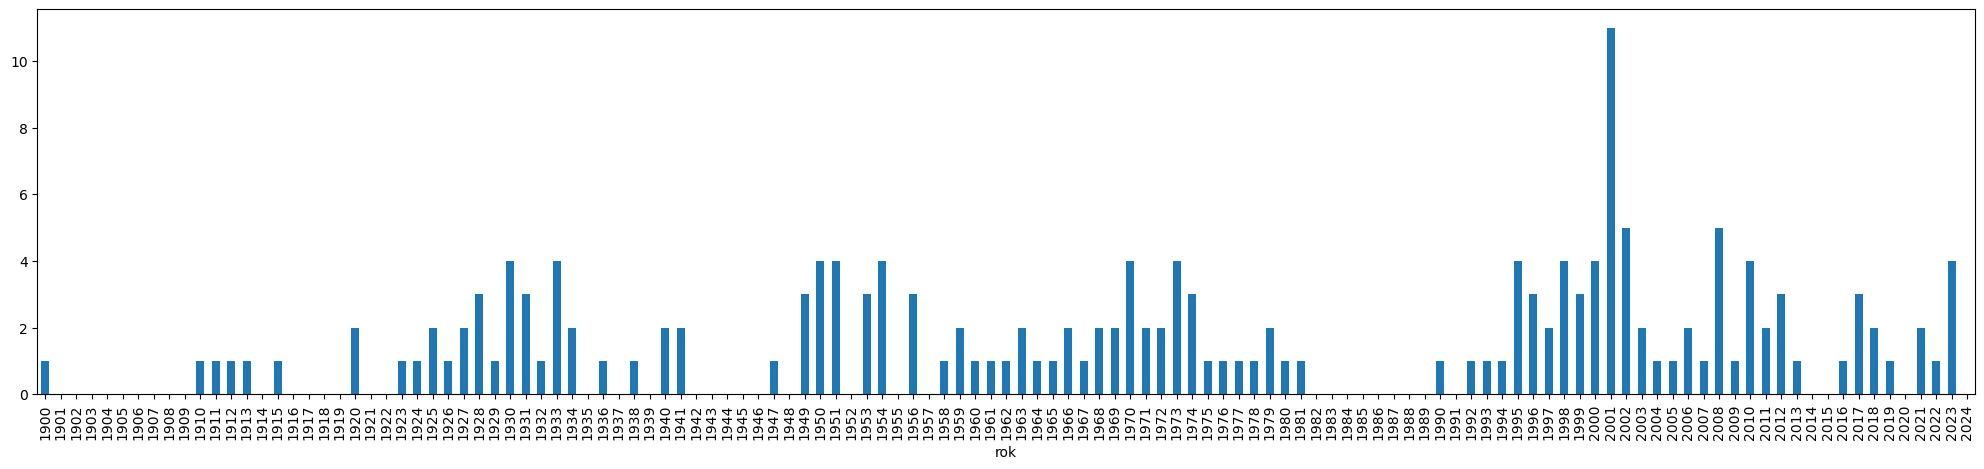

In [399]:
r(df2[df2.apply(lambda row: any("milionář" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

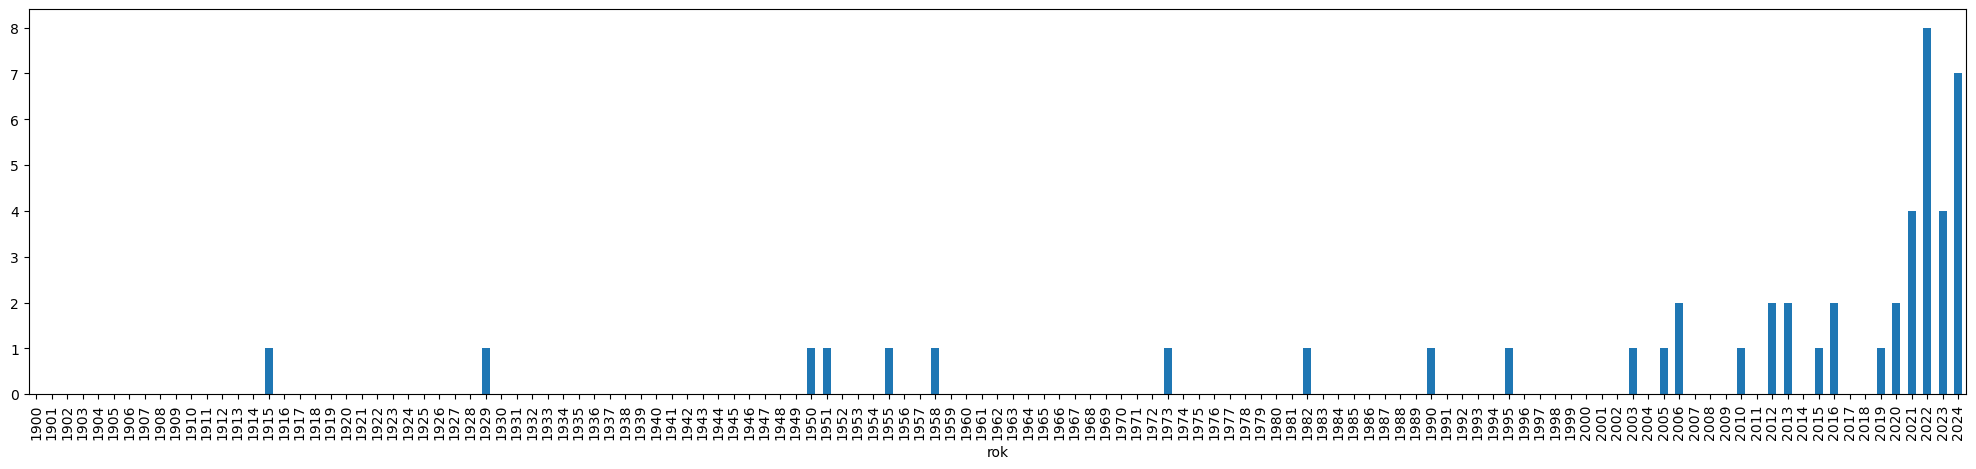

In [398]:
r(df2[df2.apply(lambda row: any("miliardář" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

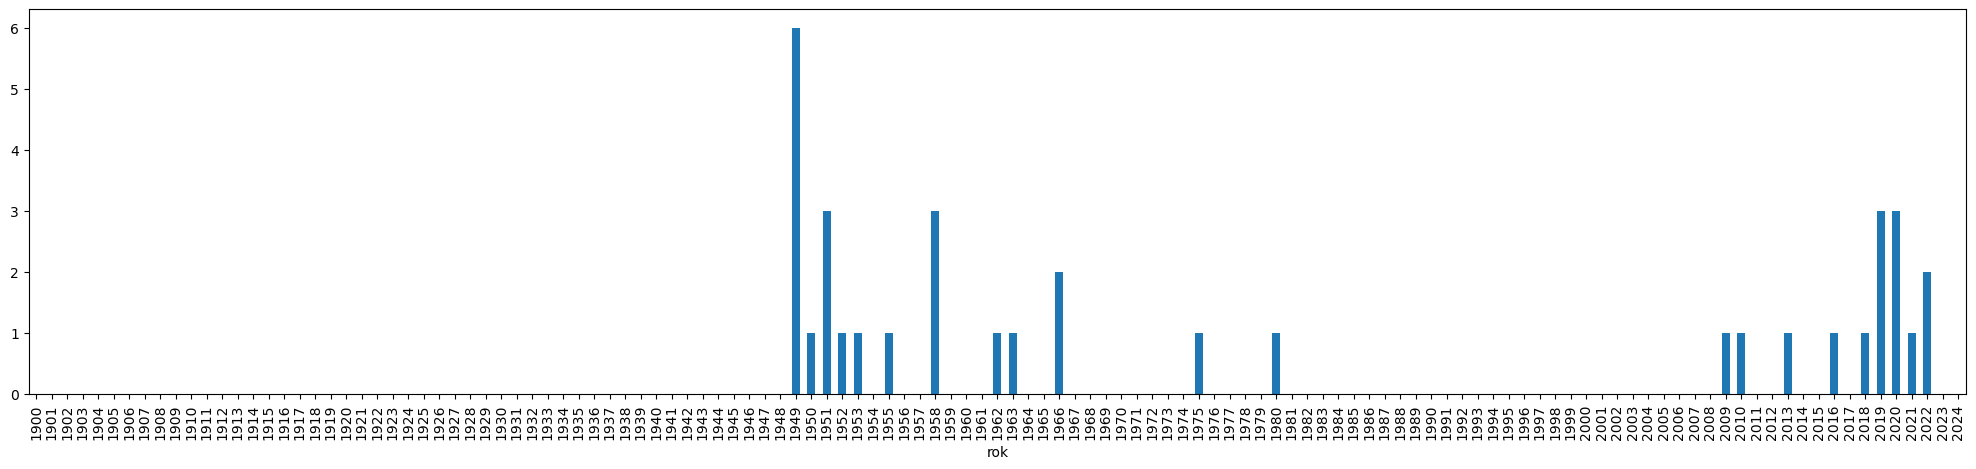

In [389]:
r(df2[df2.apply(lambda row: any("oligarch" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

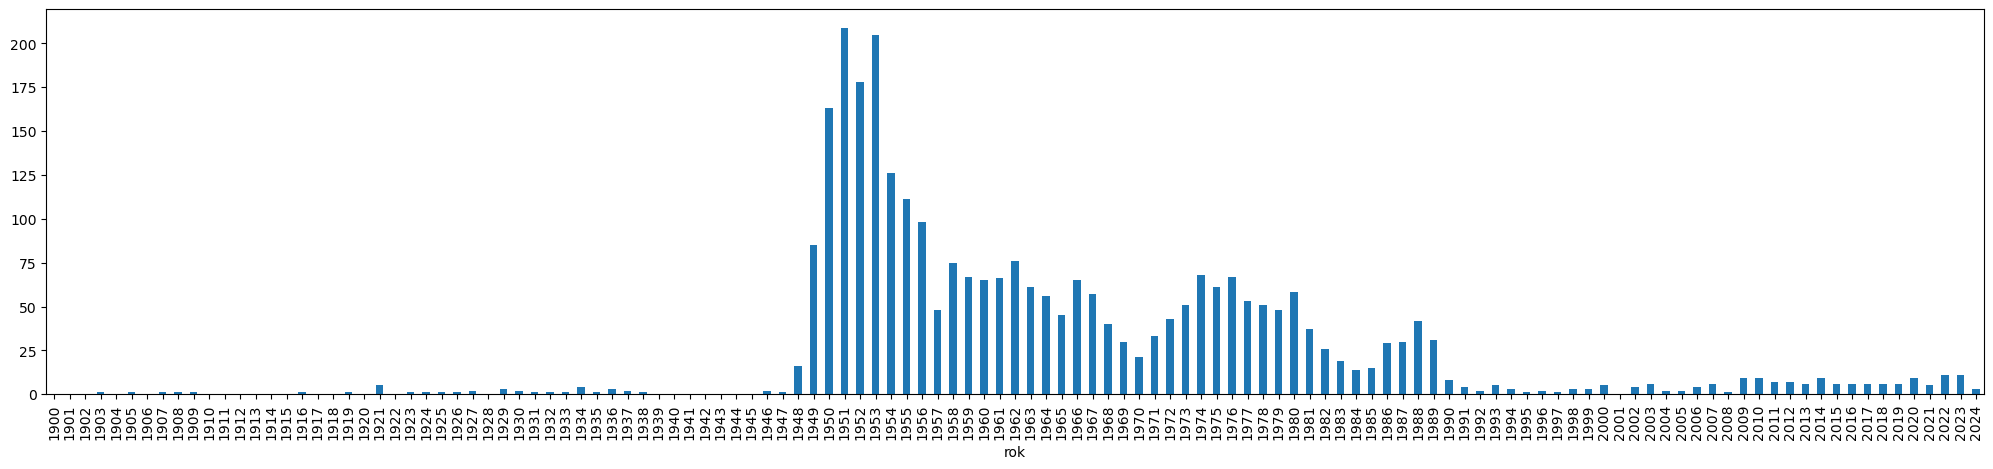

In [387]:
r(df2[df2.apply(lambda row: any("kapitalis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

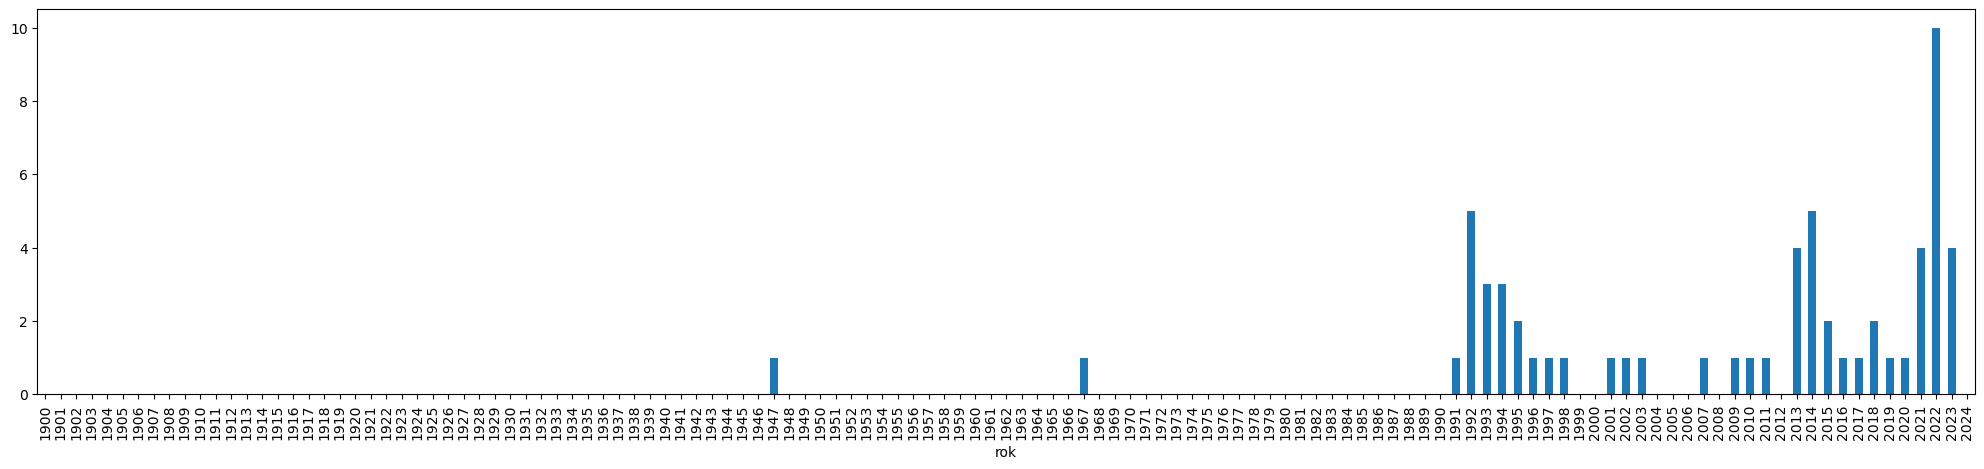

In [386]:
r(df2[df2.apply(lambda row: any("mickey" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

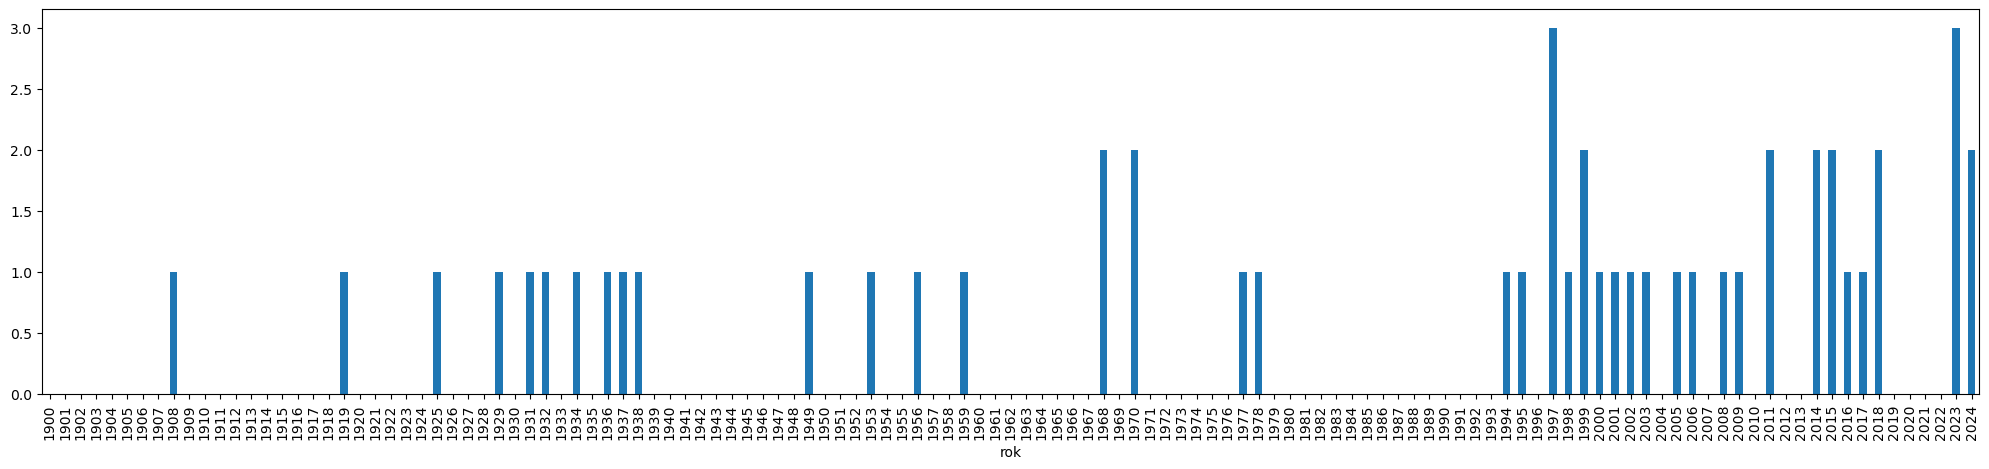

In [384]:
r(df2[df2.apply(lambda row: any("zásnub" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

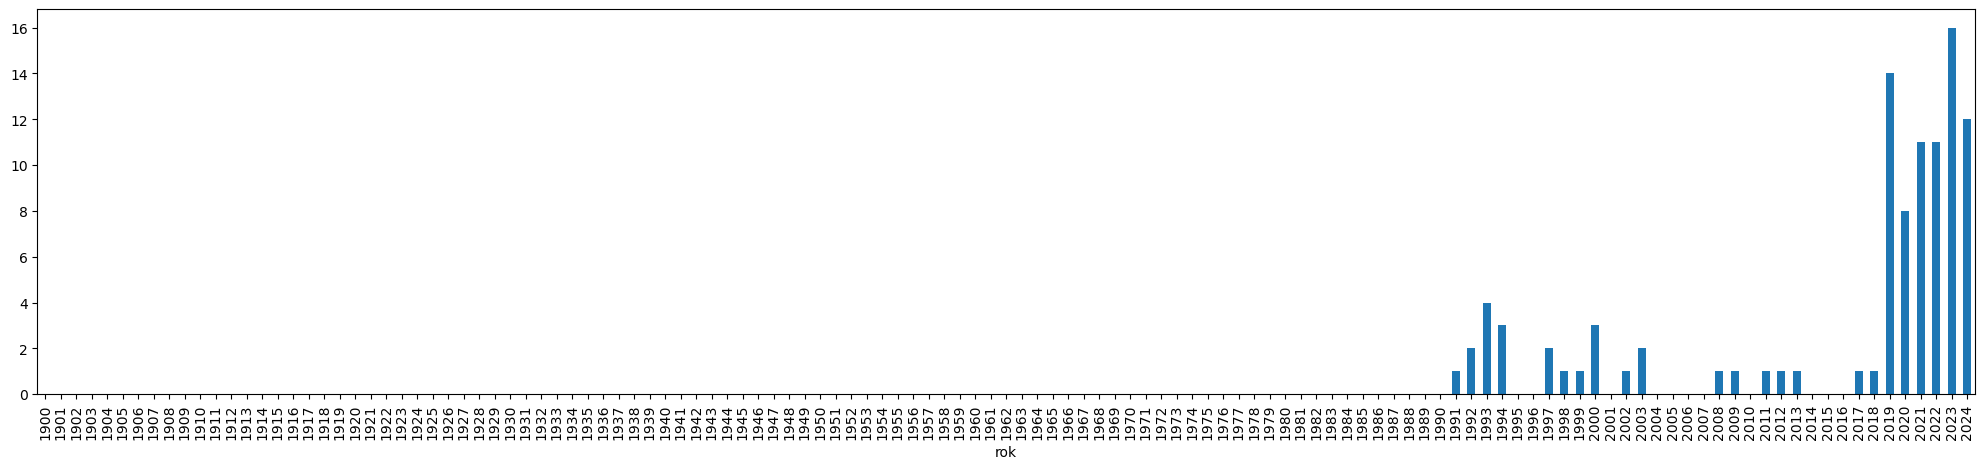

In [371]:
r(df2[df2.apply(lambda row: any("paranormáln" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

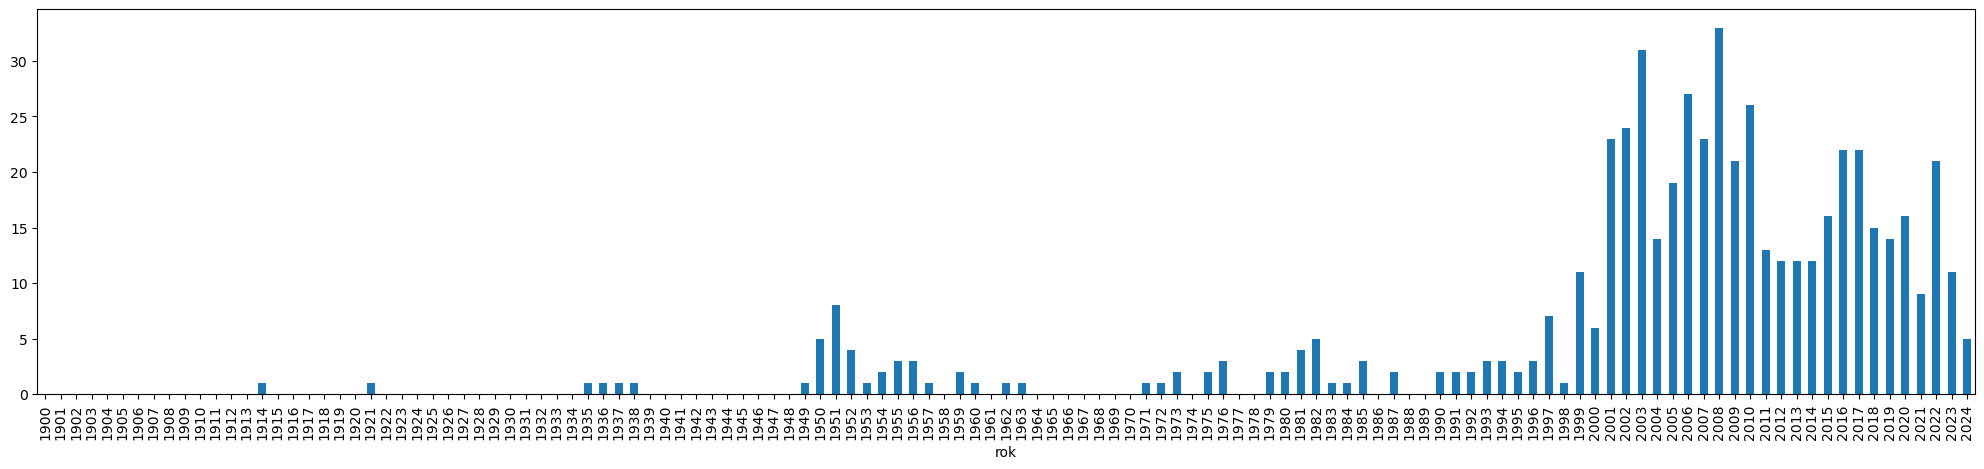

In [376]:
r(df2[df2.apply(lambda row: any("teroris" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

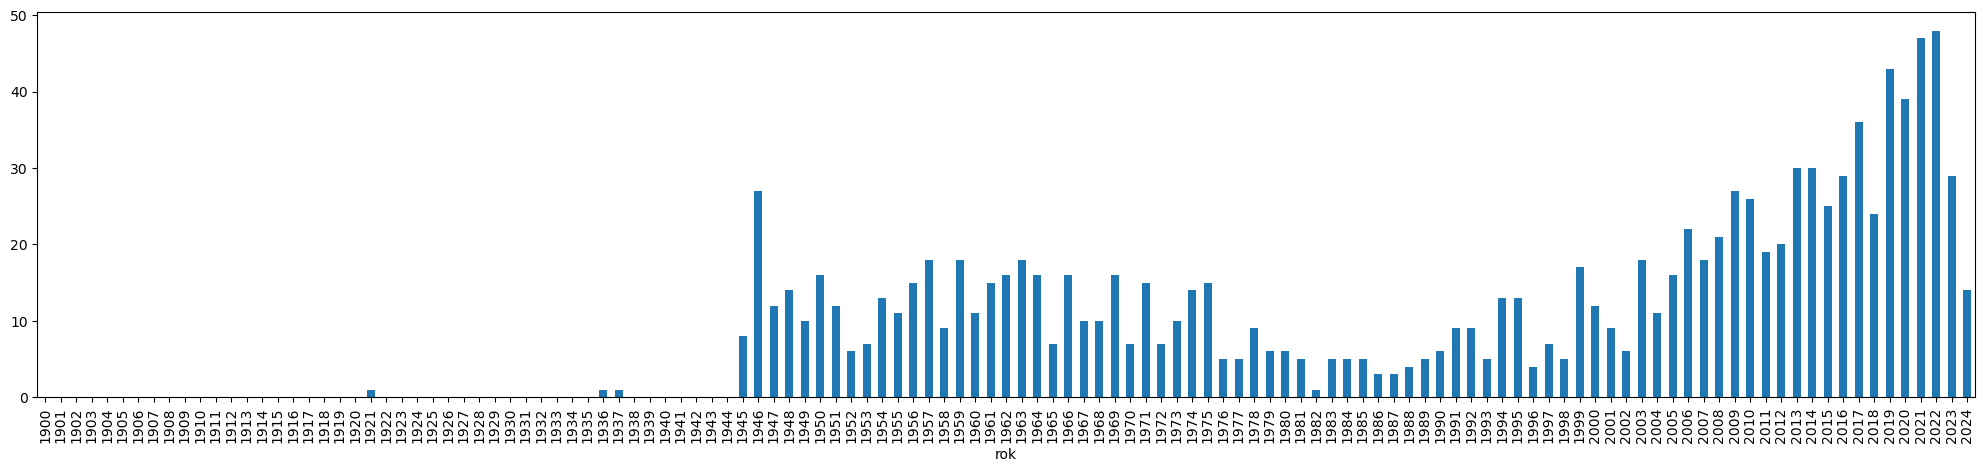

In [374]:
r(df2[df2.apply(lambda row: any("koncentrační" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

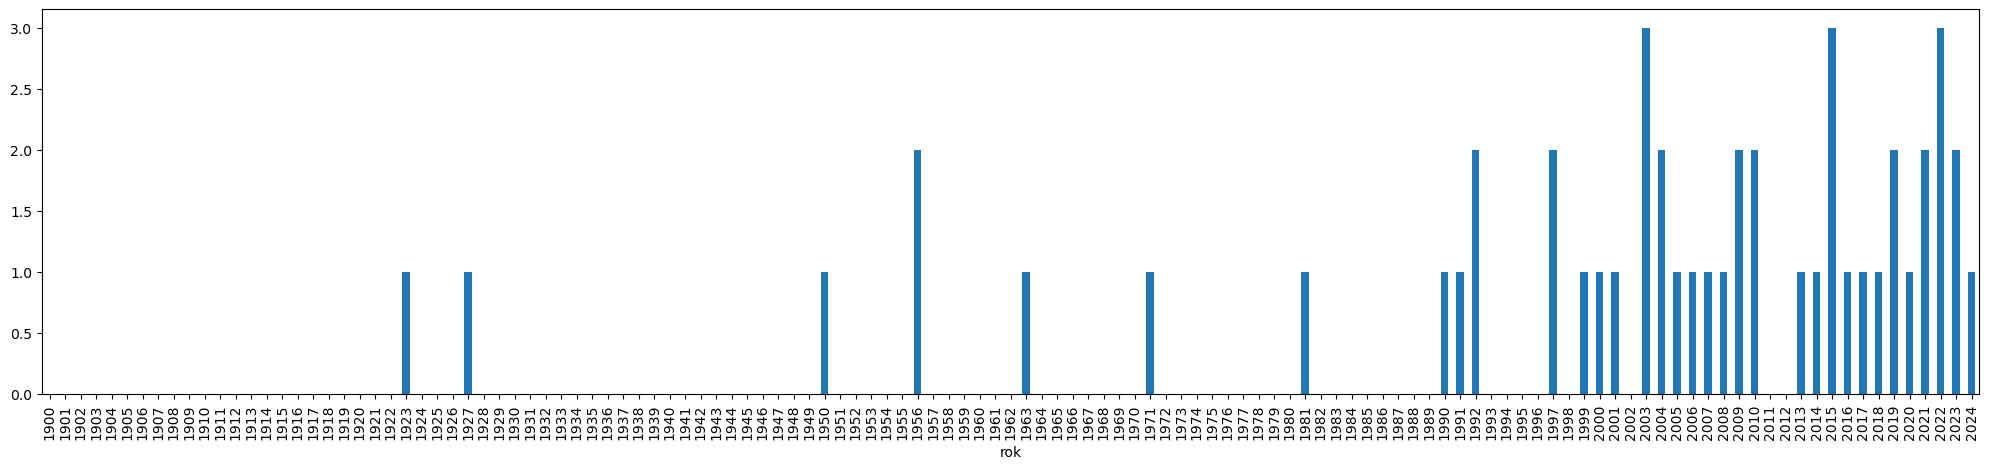

In [378]:
r(df2[df2.apply(lambda row: any("pornog" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

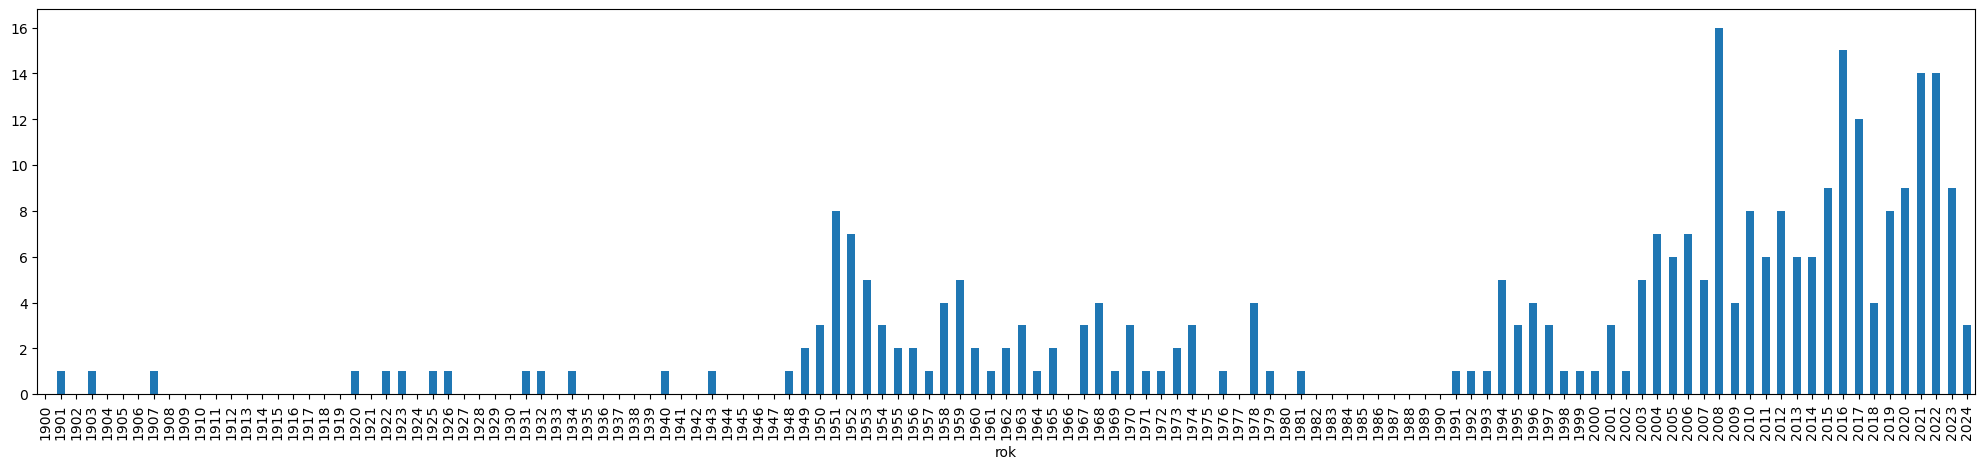

In [370]:
r(df2[df2.apply(lambda row: any("uprchlí" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

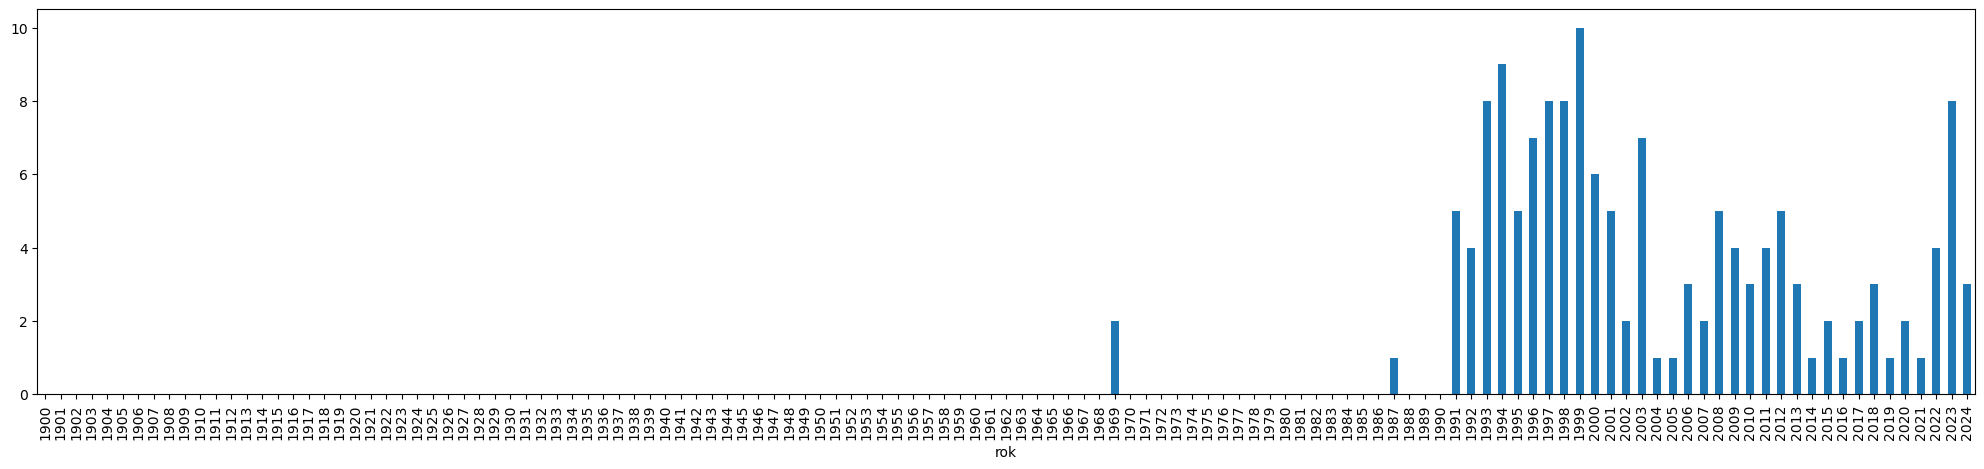

In [364]:
r(df2[df2.apply(lambda row: any("UFO" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

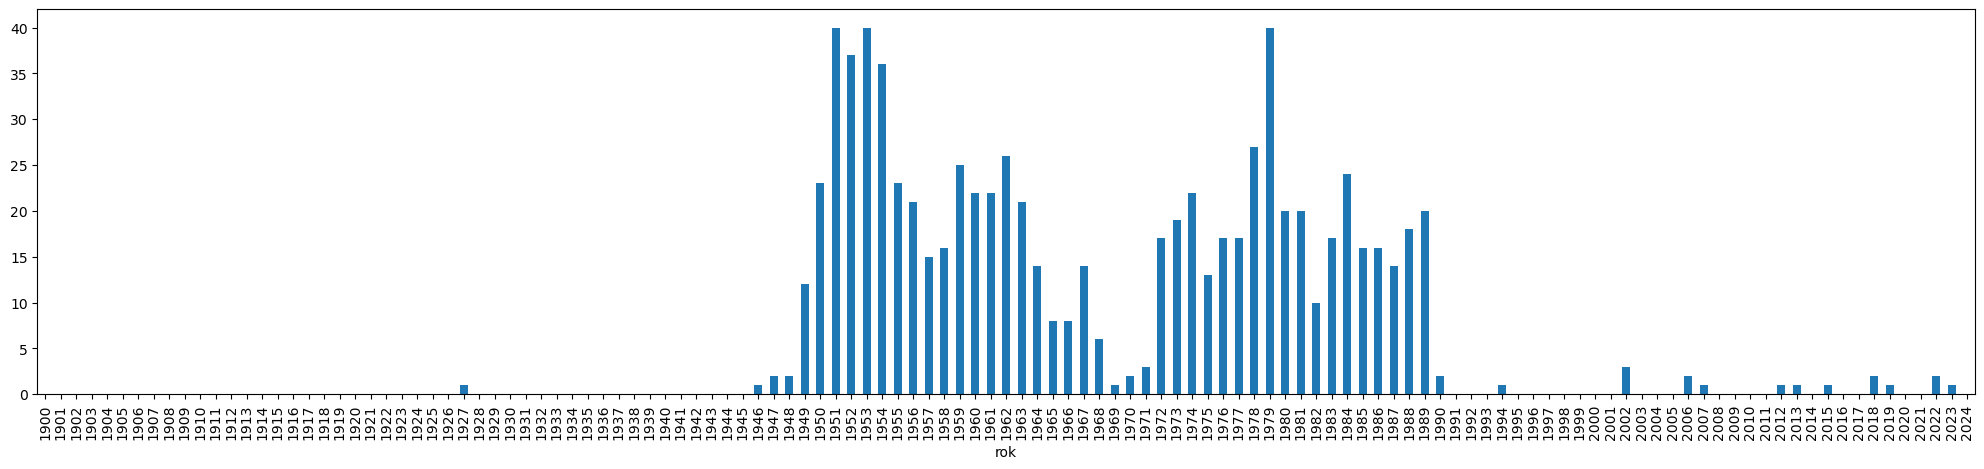

In [363]:
r(df2[df2.apply(lambda row: any("pionýr" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

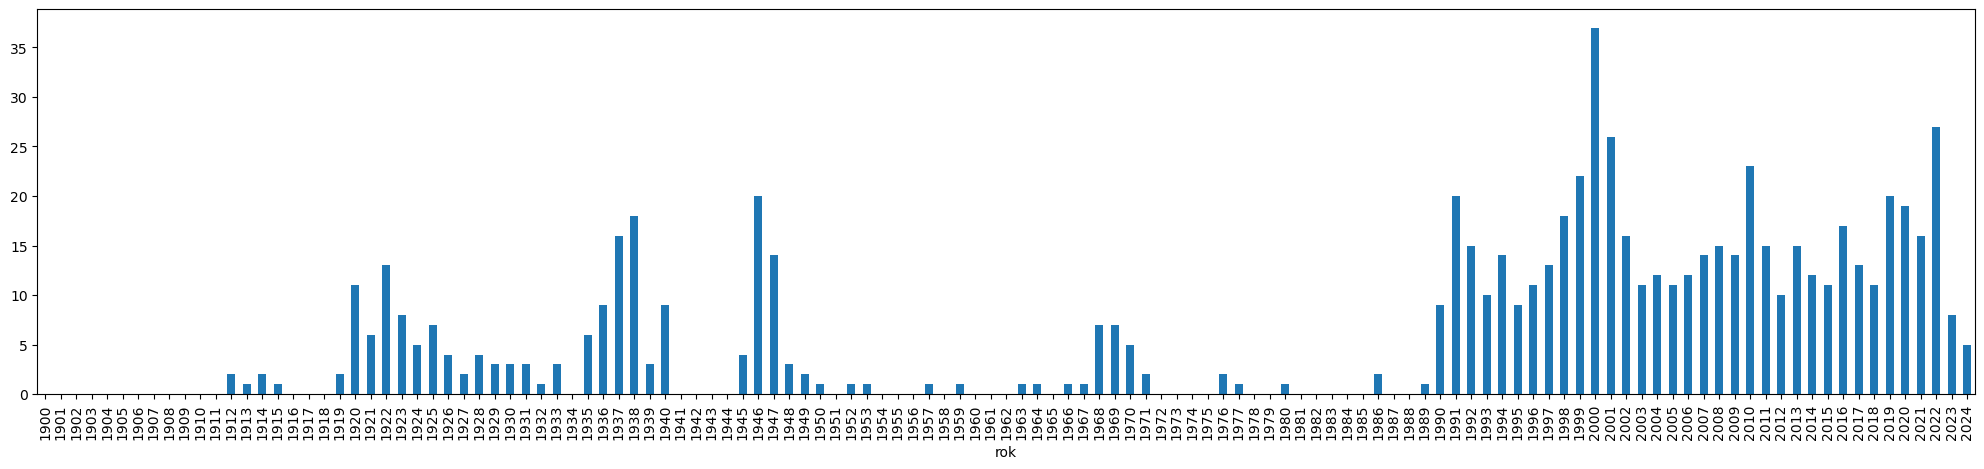

In [361]:
r(df2[df2.apply(lambda row: any("skaut" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

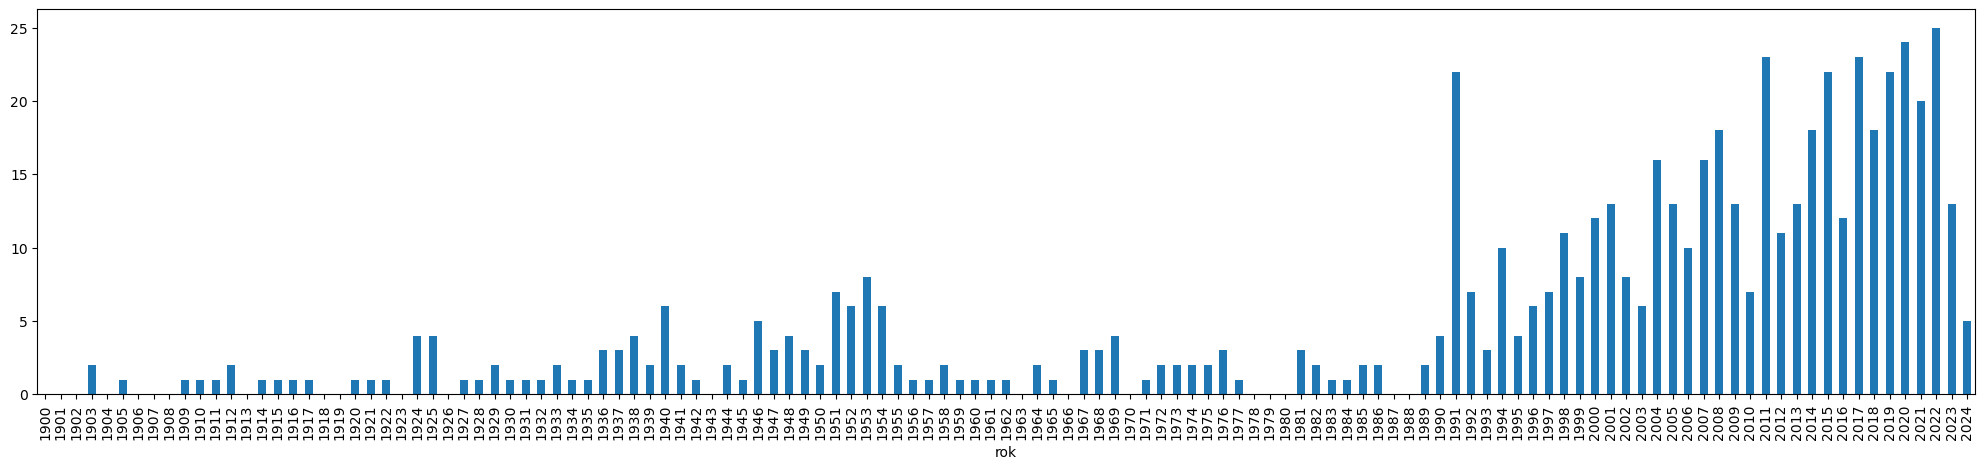

In [359]:
r(df2[df2.apply(lambda row: any("bylin" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

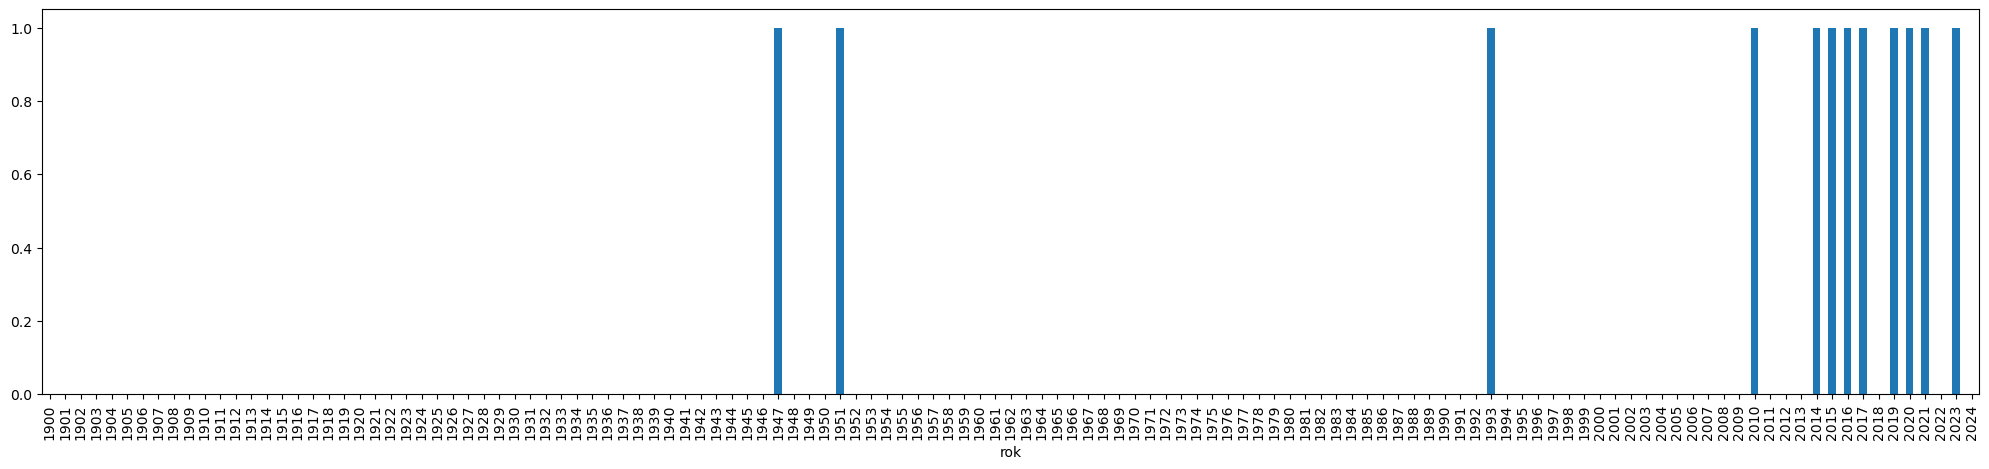

In [357]:
r(df2[df2.apply(lambda row: any("konspirac" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

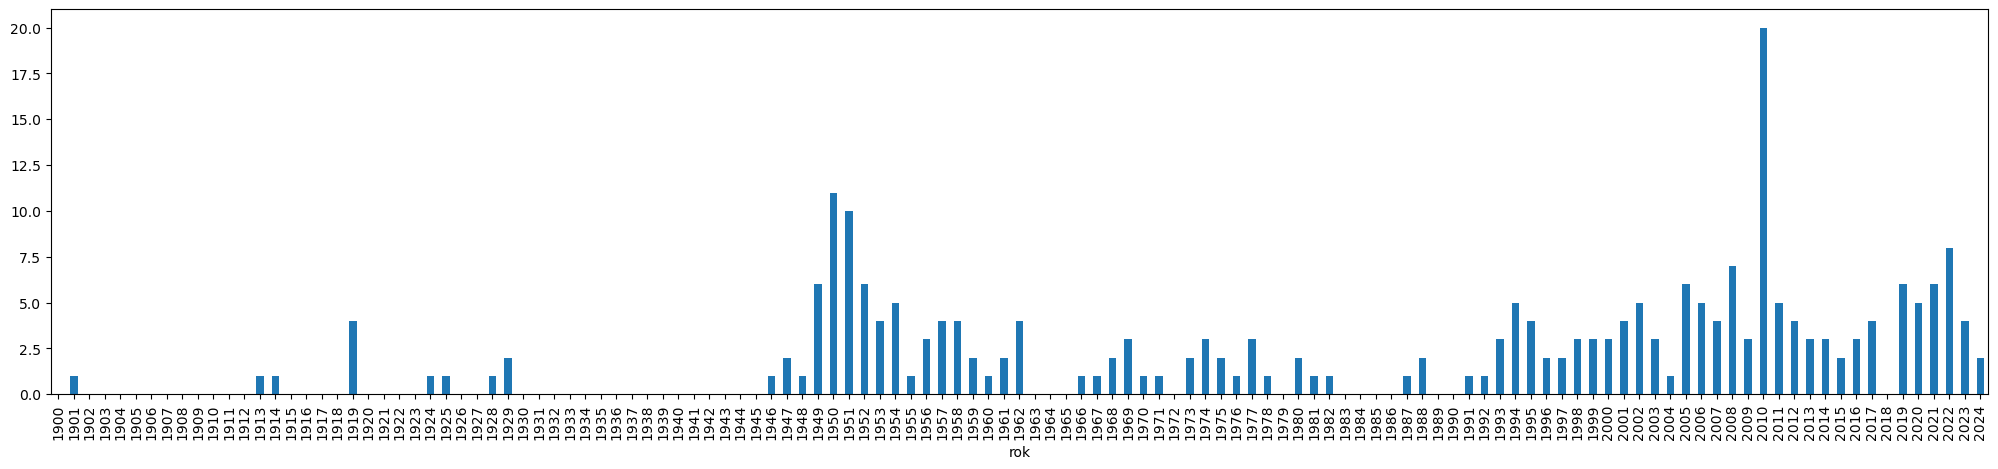

In [356]:
r(df2[df2.apply(lambda row: any("spiknutí" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

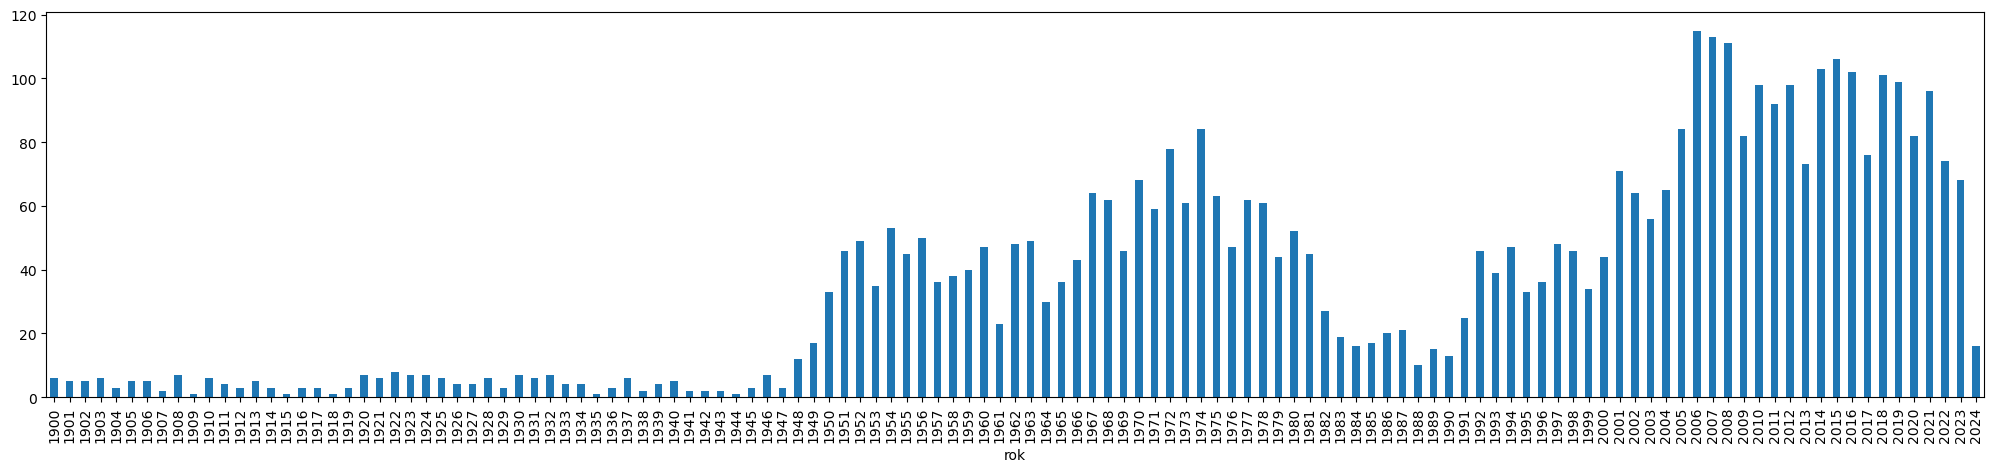

In [355]:
r(df2[df2.apply(lambda row: any("přírodní" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

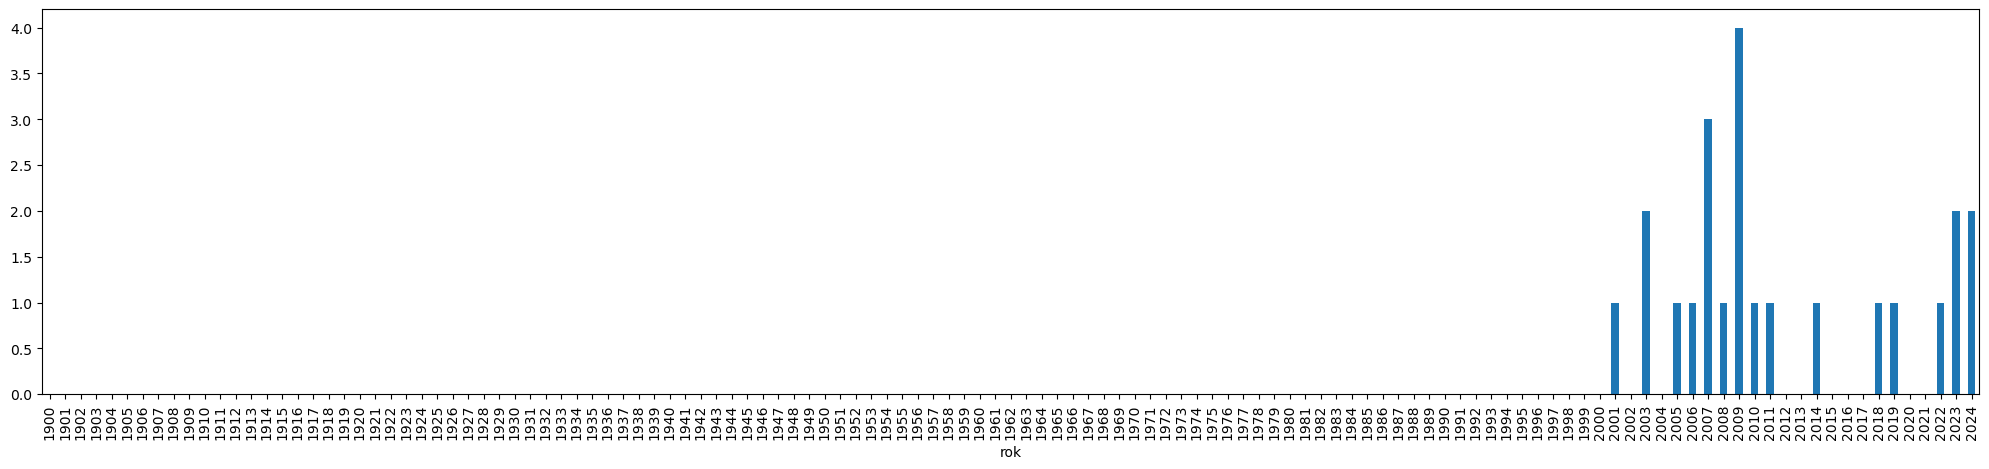

In [353]:
r(df2[df2.apply(lambda row: any("matrix" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

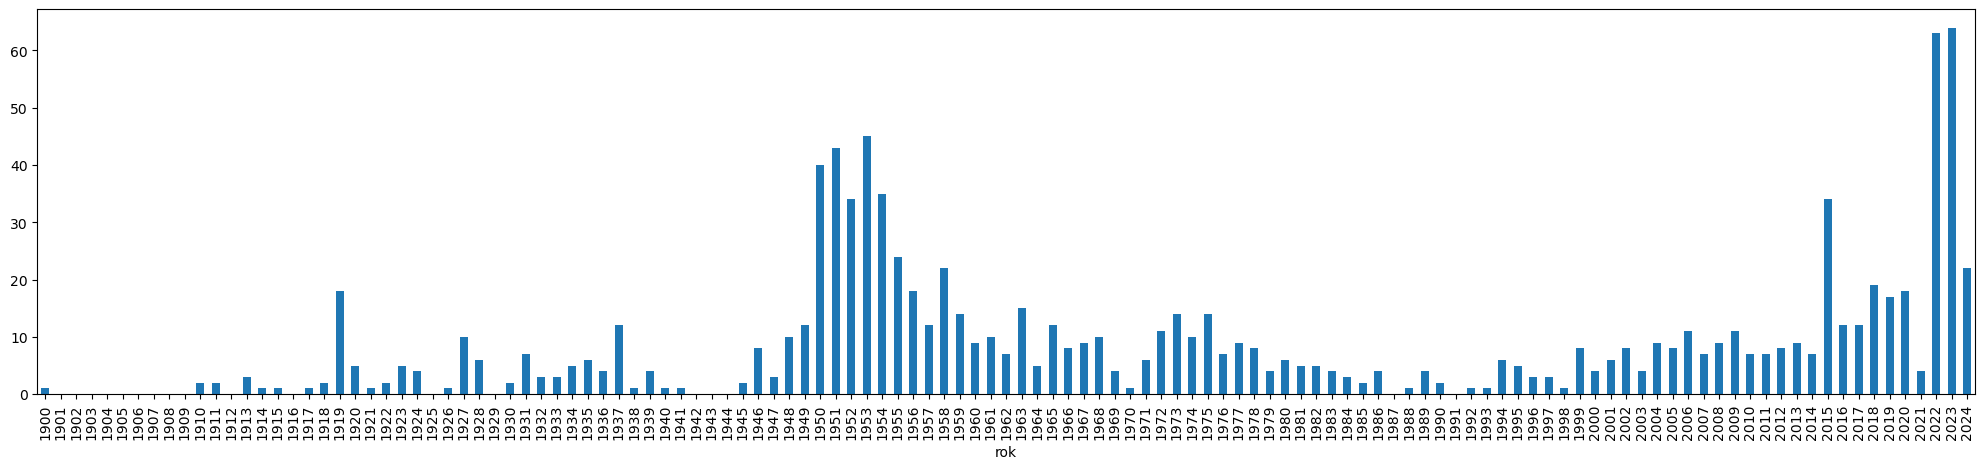

In [351]:
r(df2[df2.apply(lambda row: any("ukrajin" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

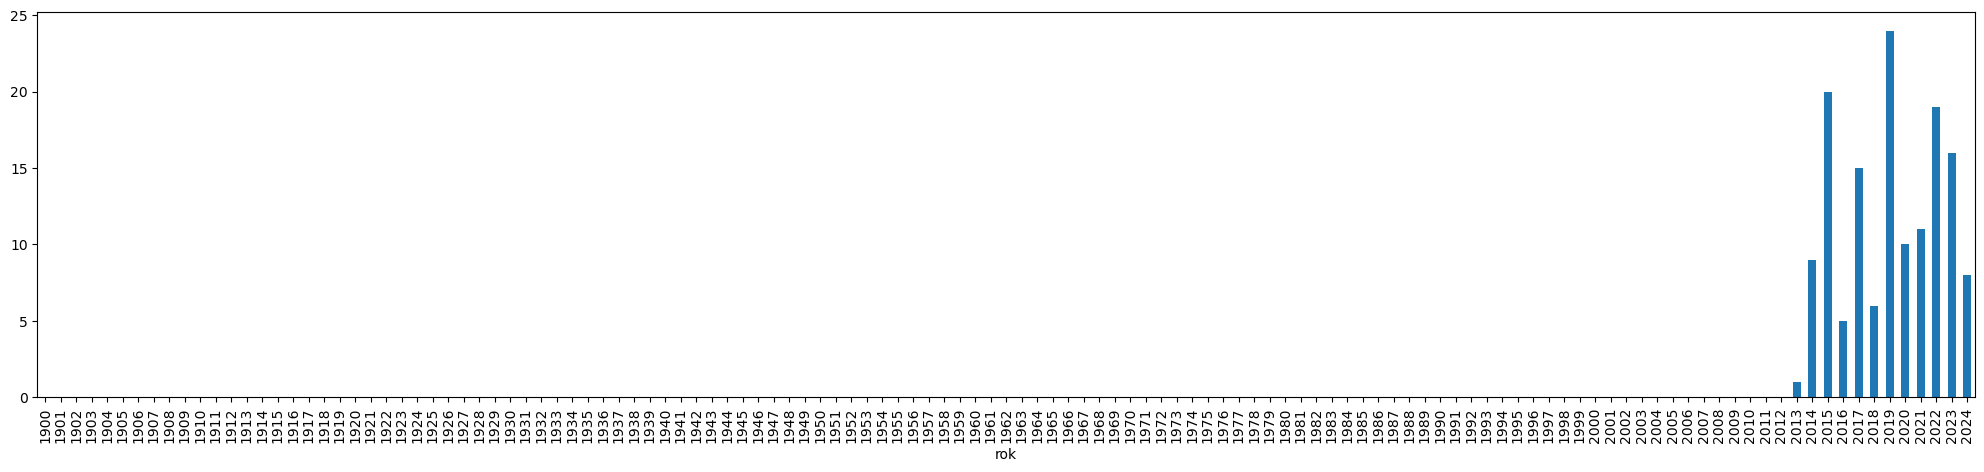

In [347]:
r(df2[df2.apply(lambda row: any("minecraft" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

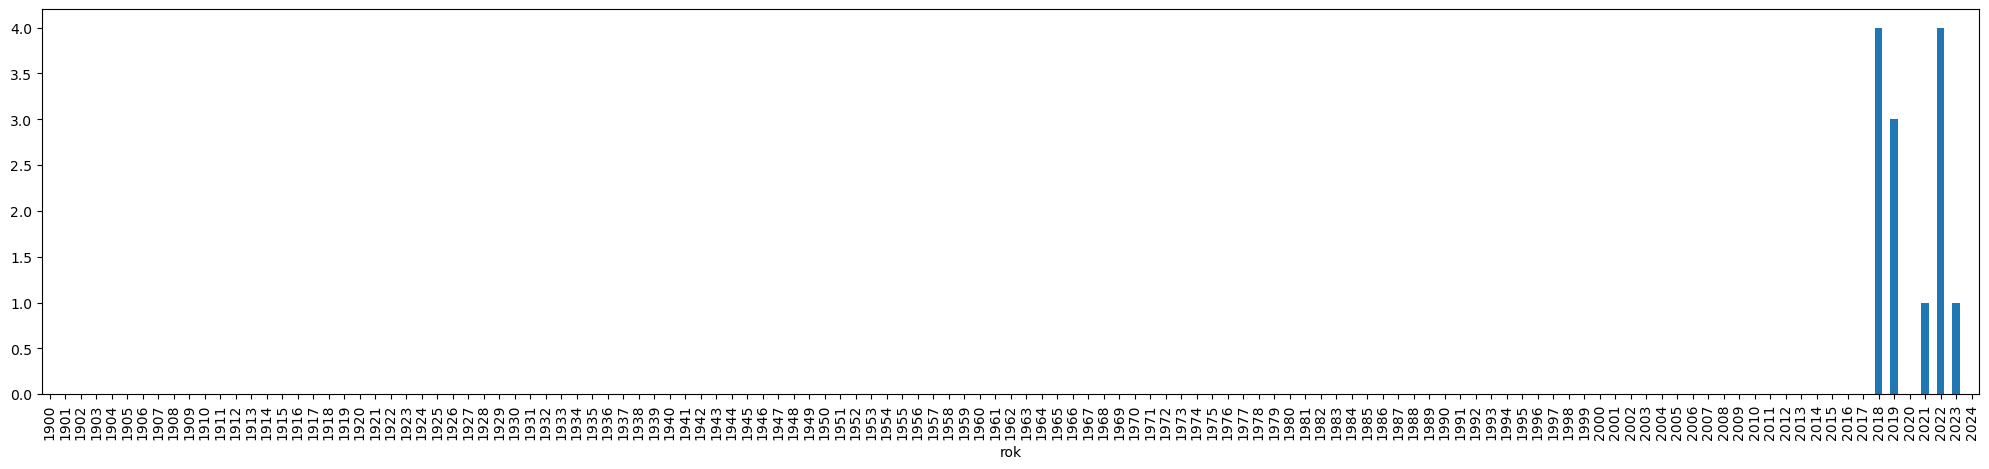

In [346]:
r(df2[df2.apply(lambda row: any("roblox" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

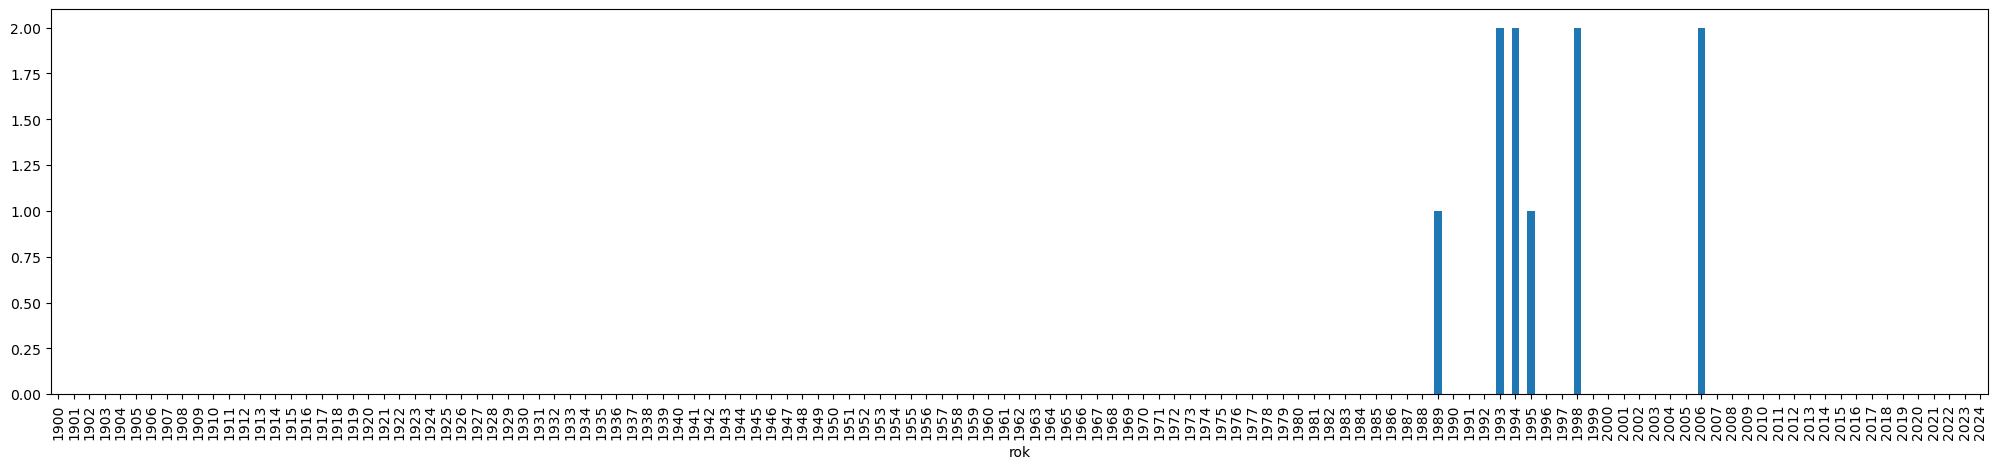

In [341]:
r(df2[df2.apply(lambda row: any("Unix" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

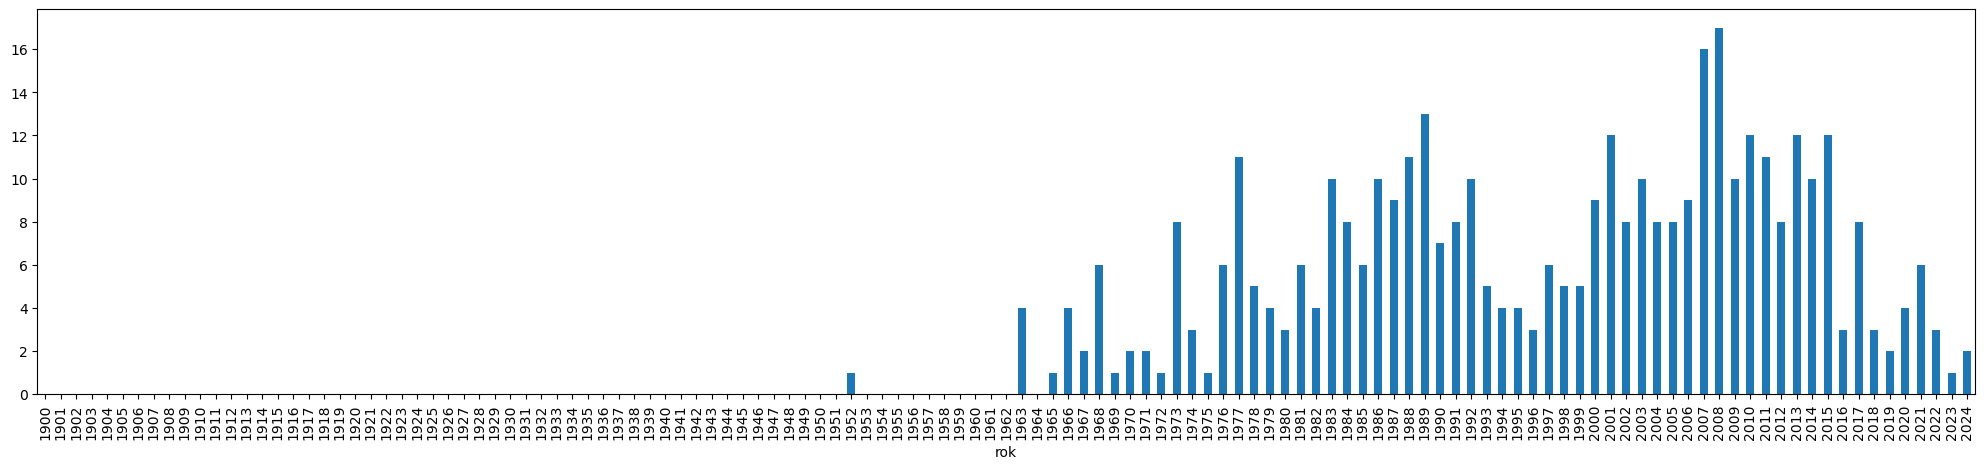

In [284]:
r(df2[df2.apply(lambda row: any("algoritm" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

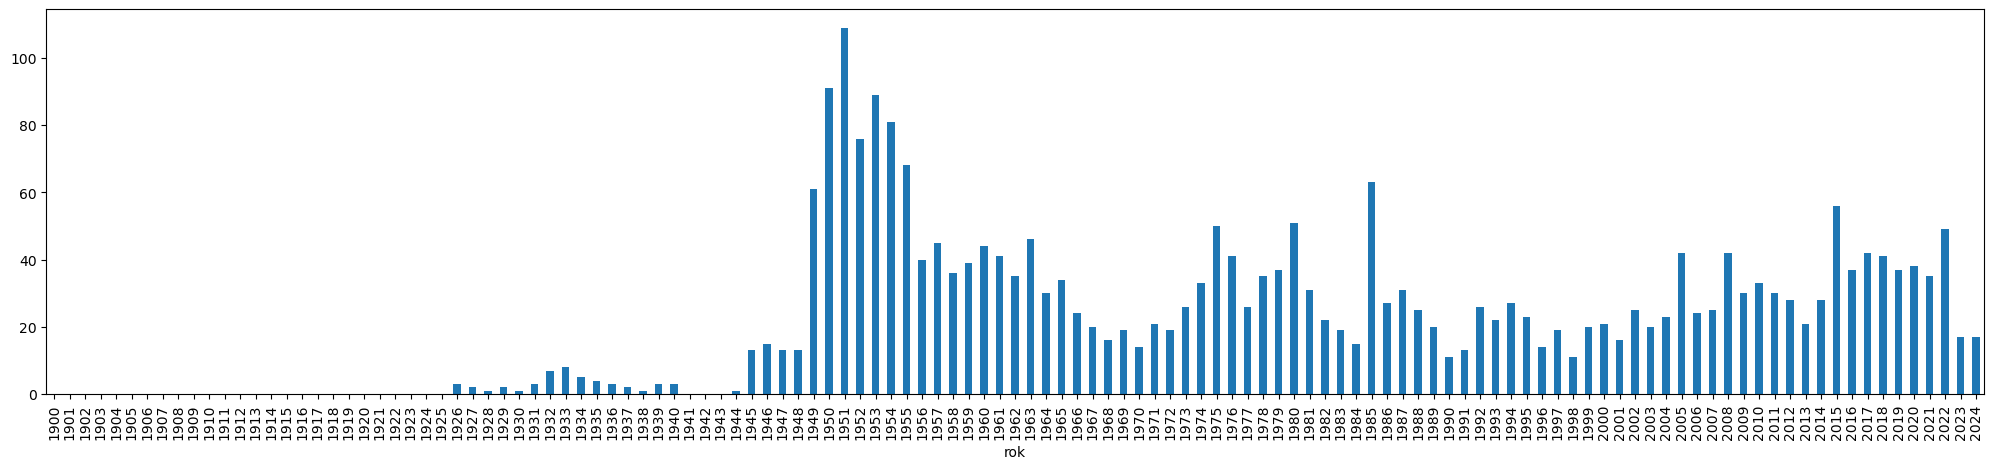

In [271]:
r(df2[df2.apply(lambda row: any("fašis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

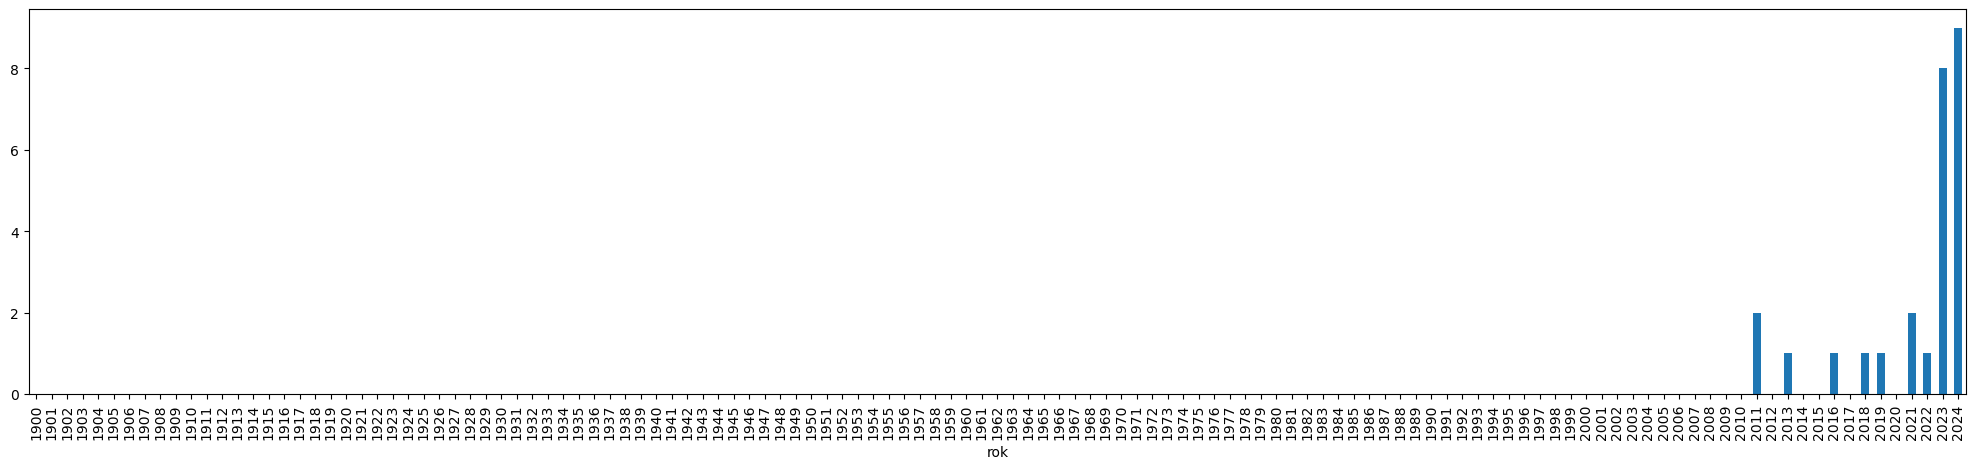

In [336]:
r(df2[df2.apply(lambda row: any("queer" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

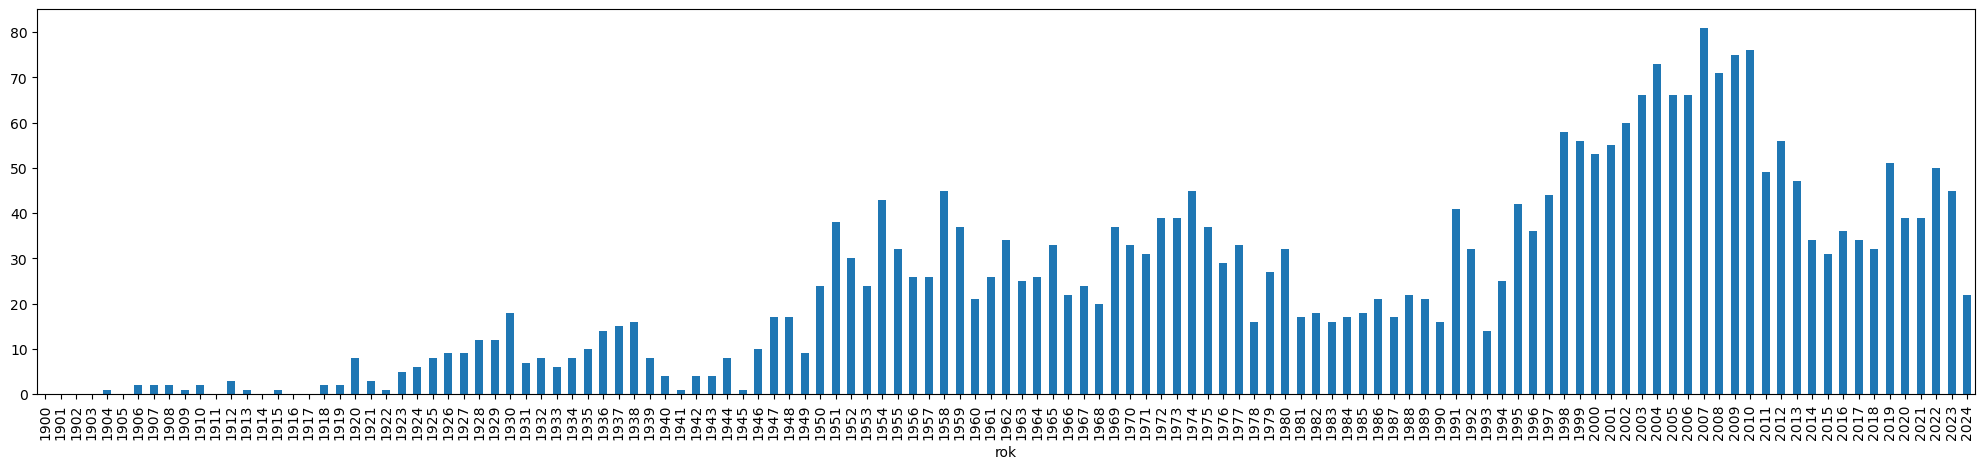

In [338]:
r(df2[df2.apply(lambda row: any("automob" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

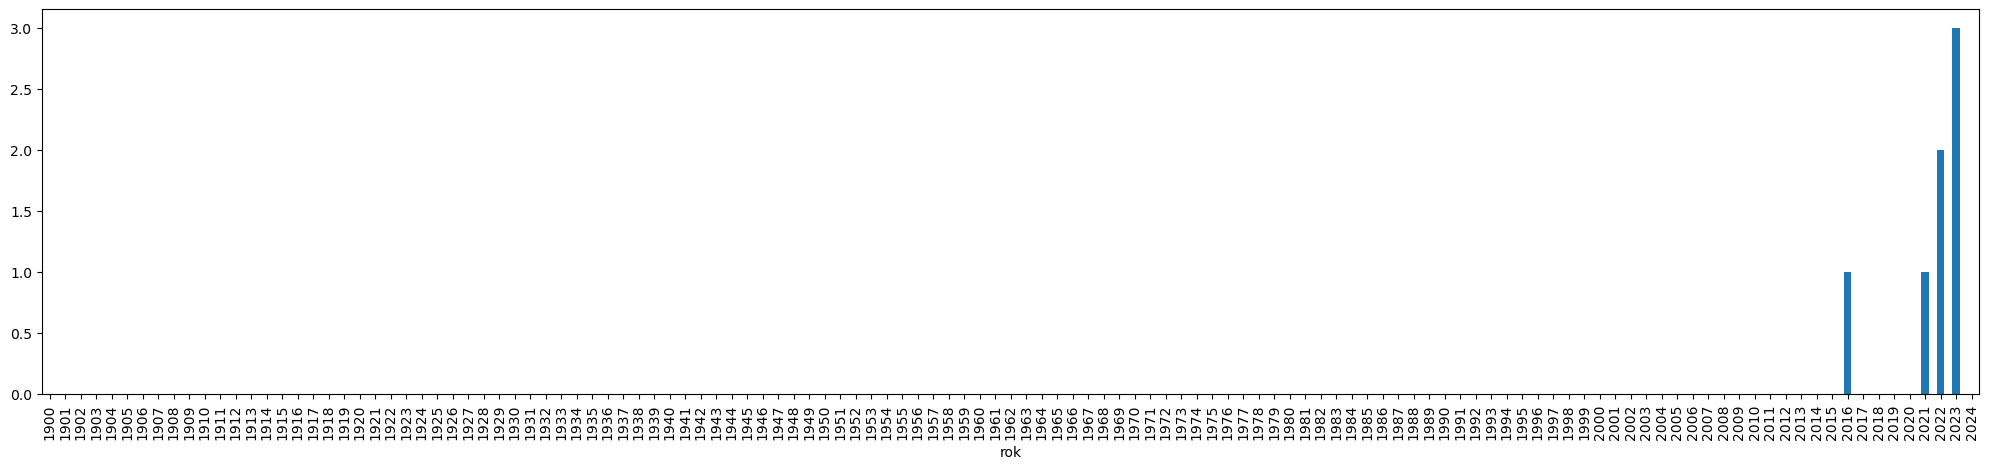

In [335]:
r(df2[df2.apply(lambda row: any("BDSM" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

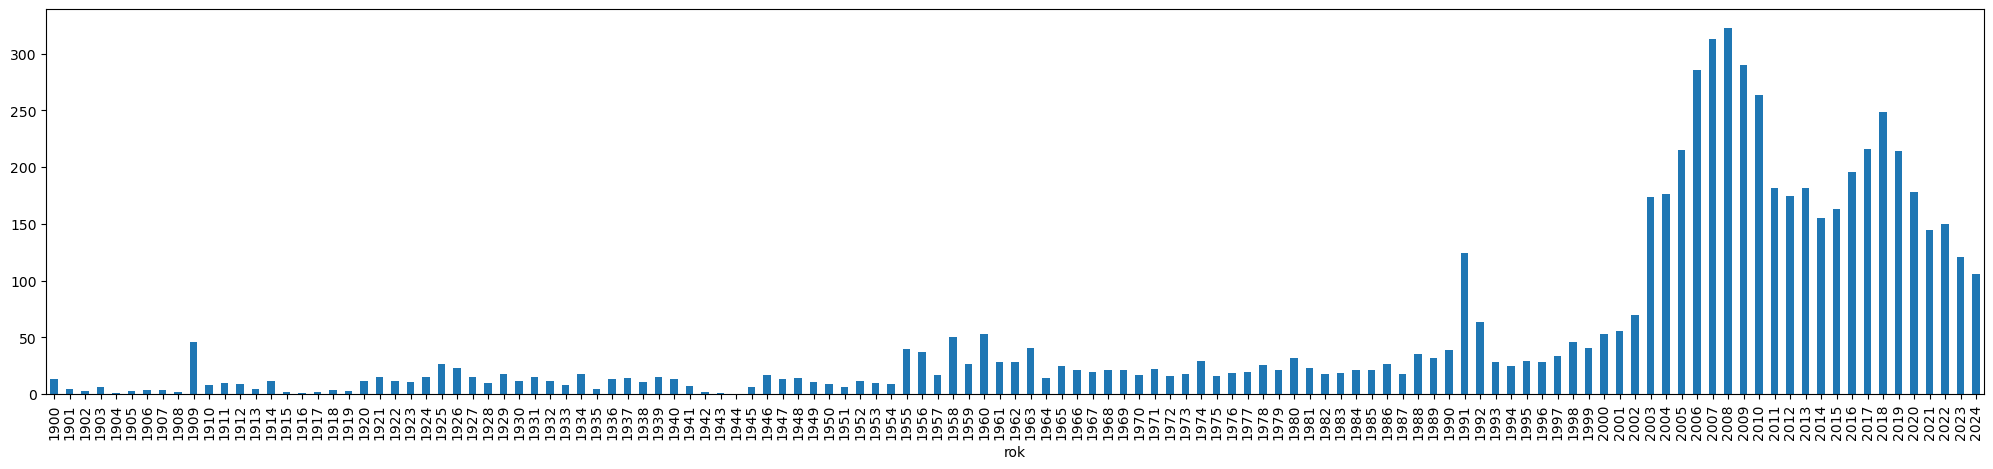

In [334]:
r(df2[df2.apply(lambda row: any("turist" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

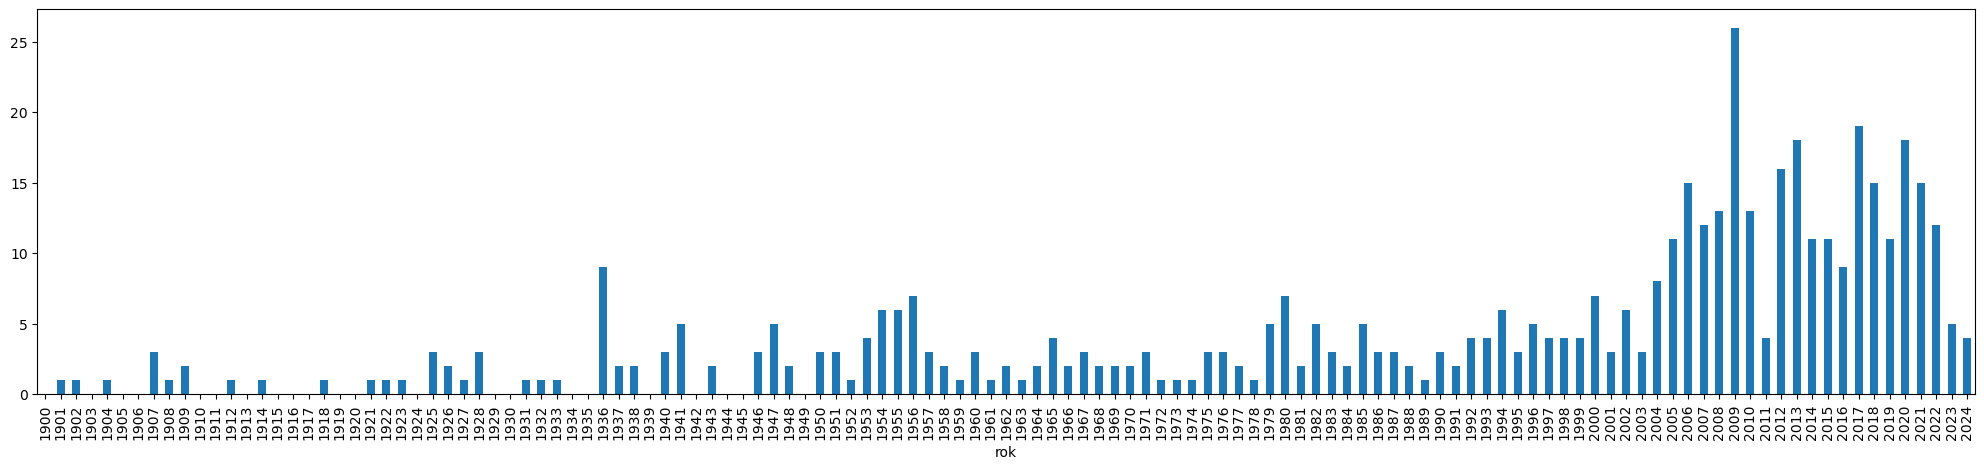

In [331]:
r(df2[df2.apply(lambda row: any("cyklist" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

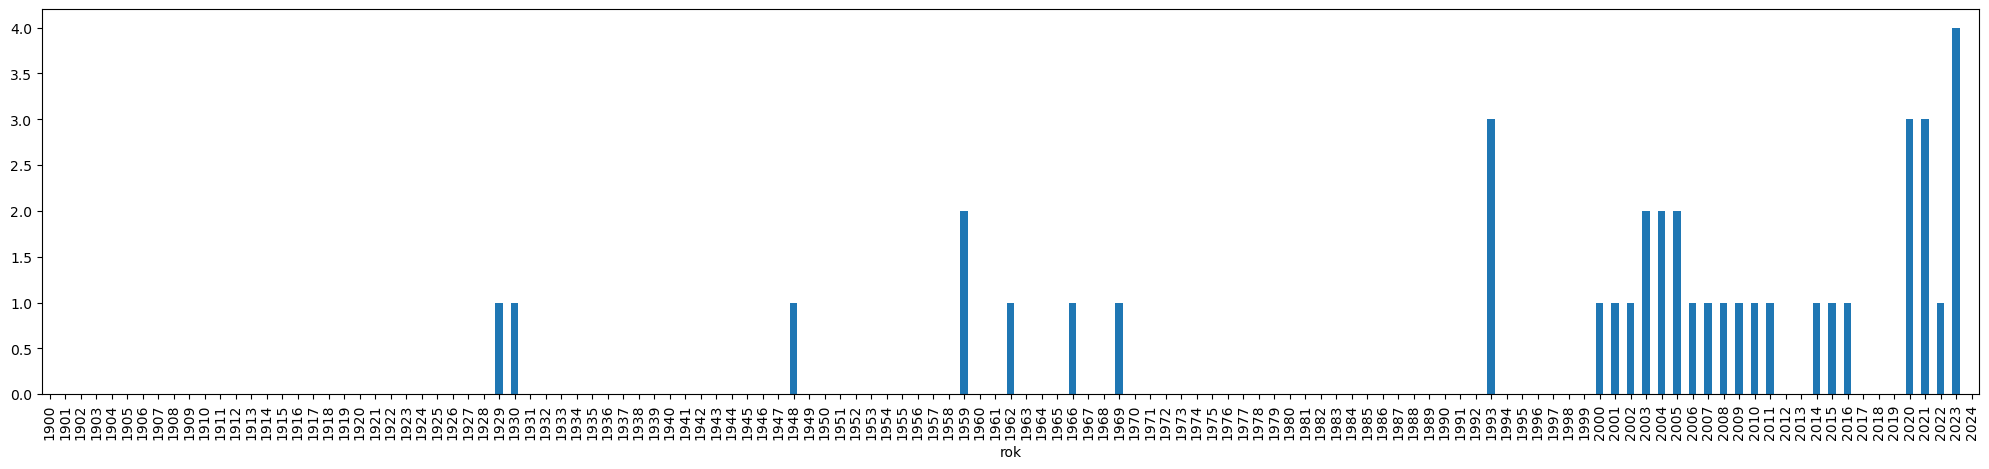

In [324]:
r(df2[df2.apply(lambda row: any("lesbi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

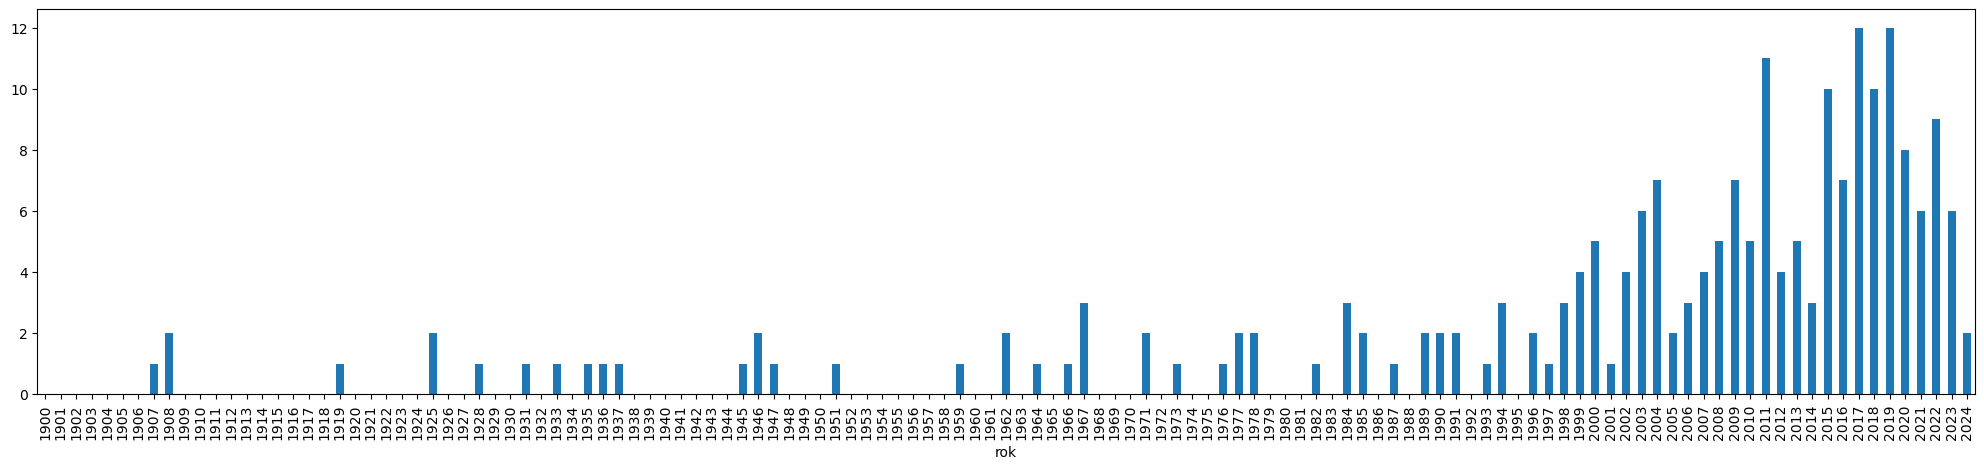

In [323]:
r(df2[df2.apply(lambda row: any("gay" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

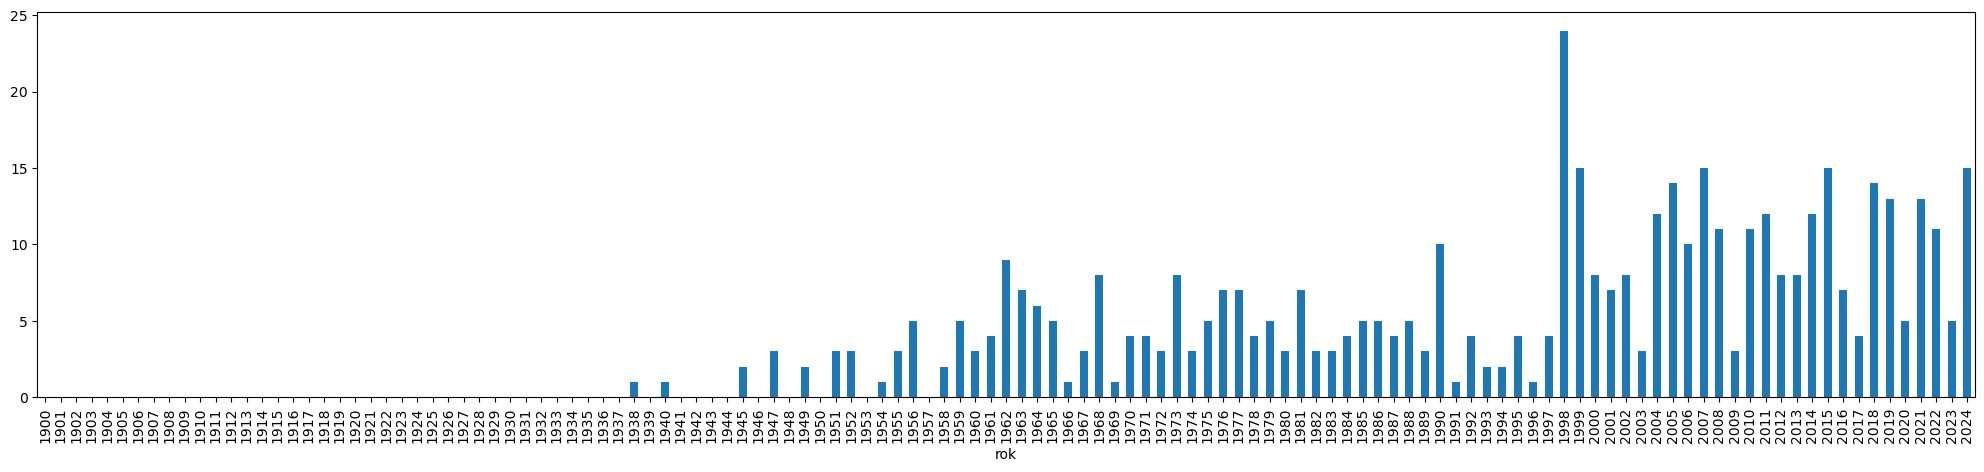

In [321]:
r(df2[df2.apply(lambda row: any("hokej" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

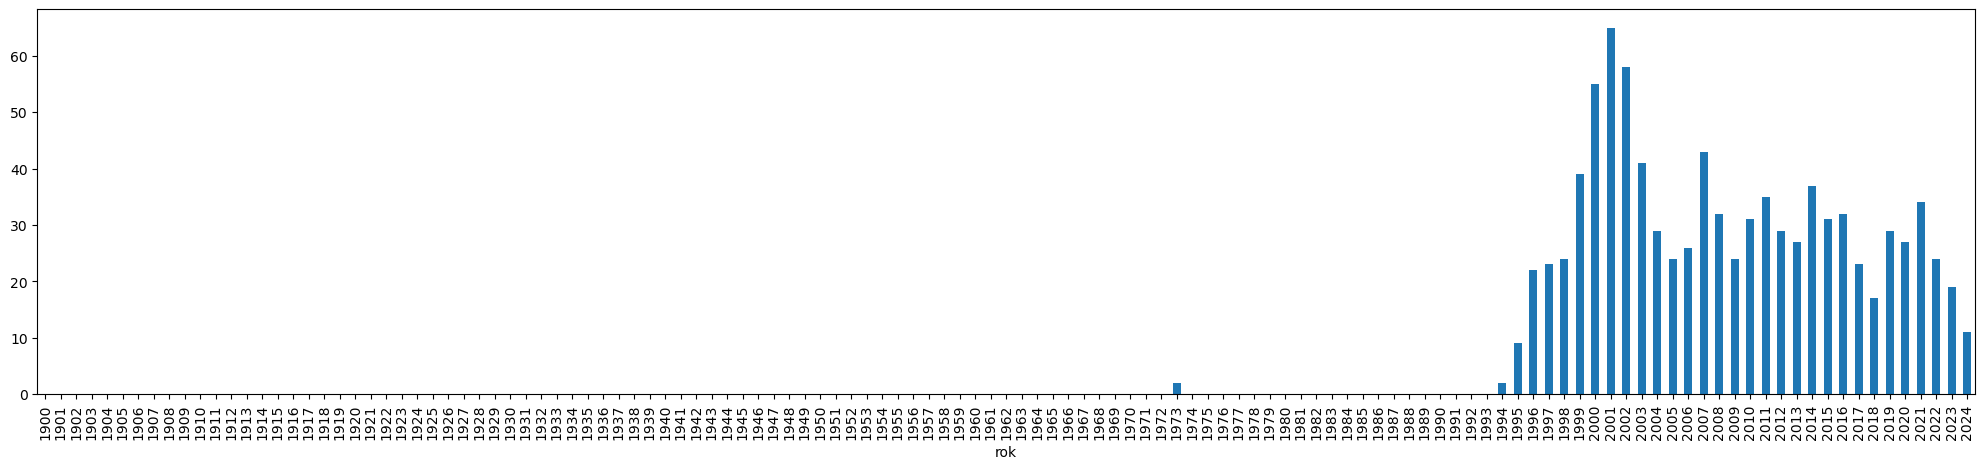

In [320]:
r(df2[df2.apply(lambda row: any("internet" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

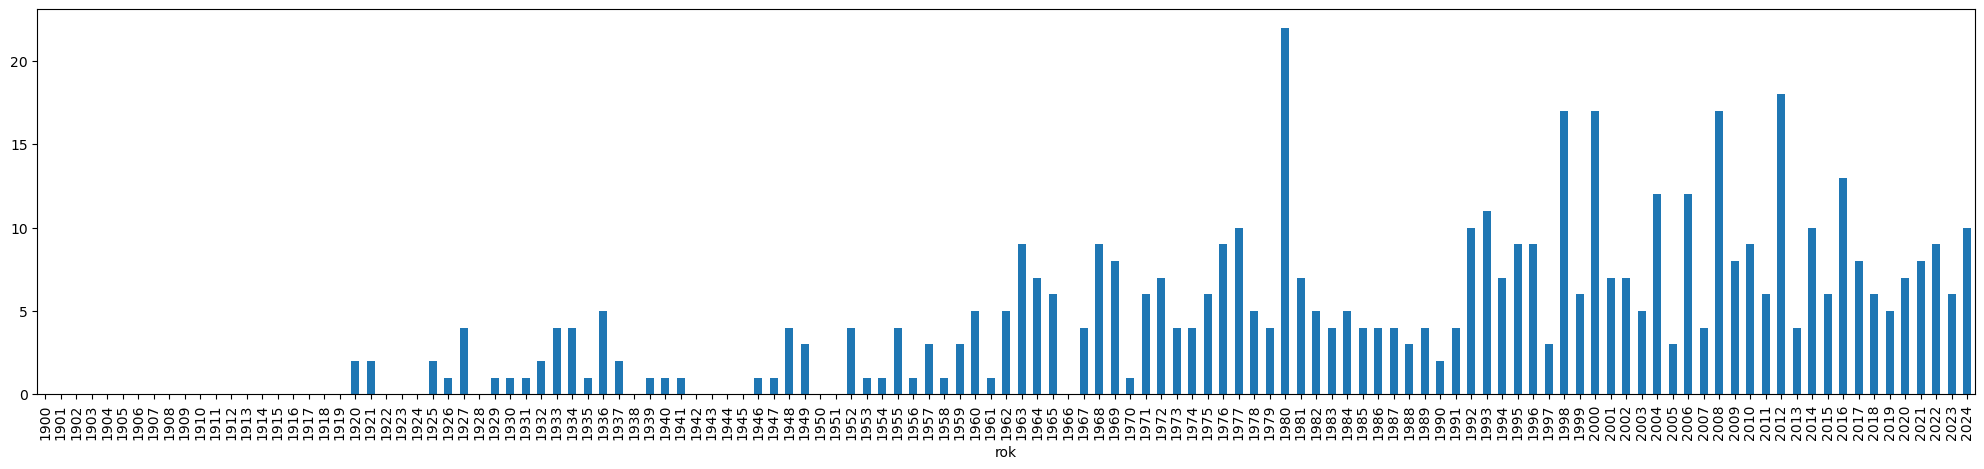

In [326]:
r(df2[df2.apply(lambda row: any("olympi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

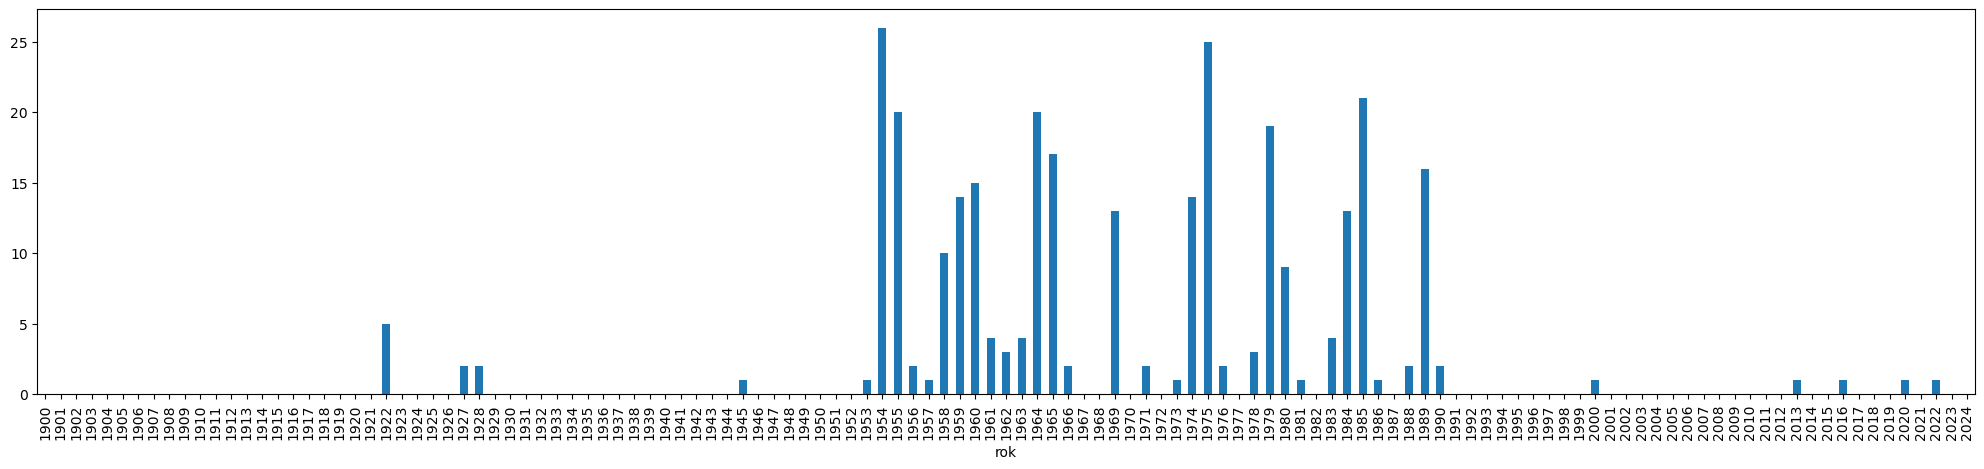

In [318]:
r(df2[df2.apply(lambda row: any("spartaki" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

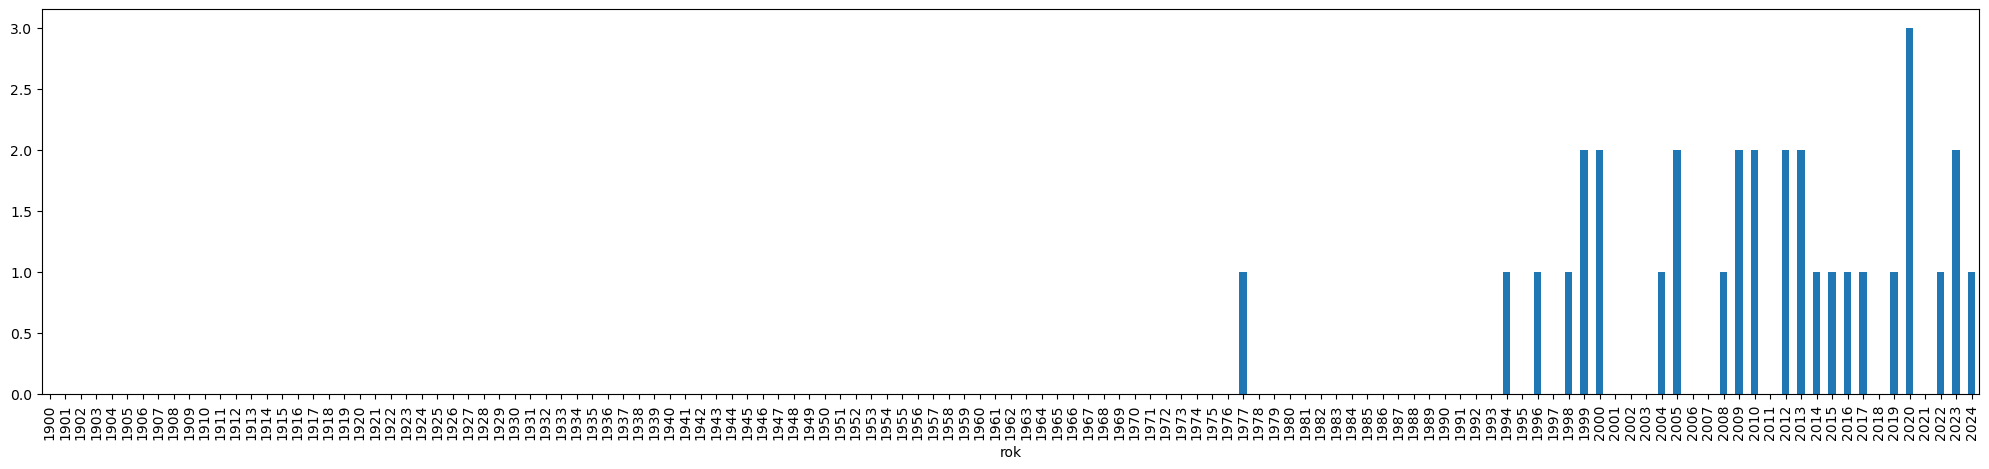

In [317]:
r(df2[df2.apply(lambda row: any("parkinsonov" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

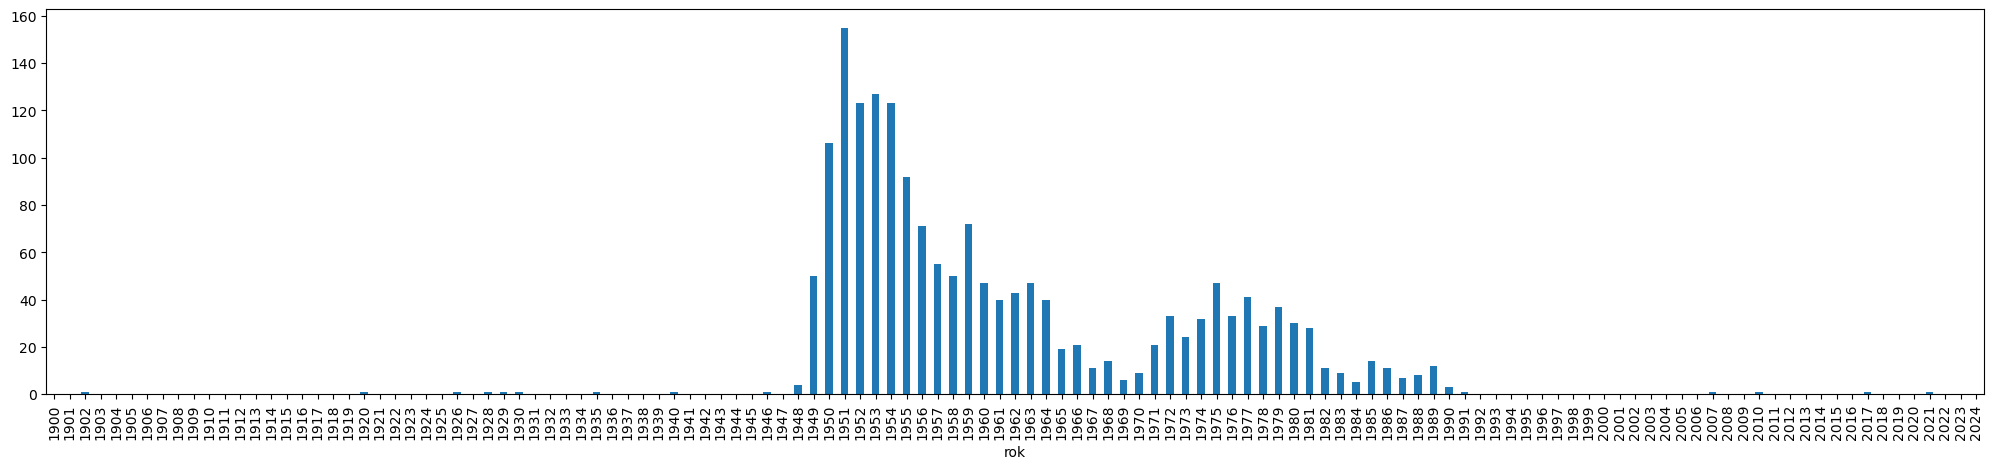

In [314]:
r(df2[df2.apply(lambda row: any("buržoa" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

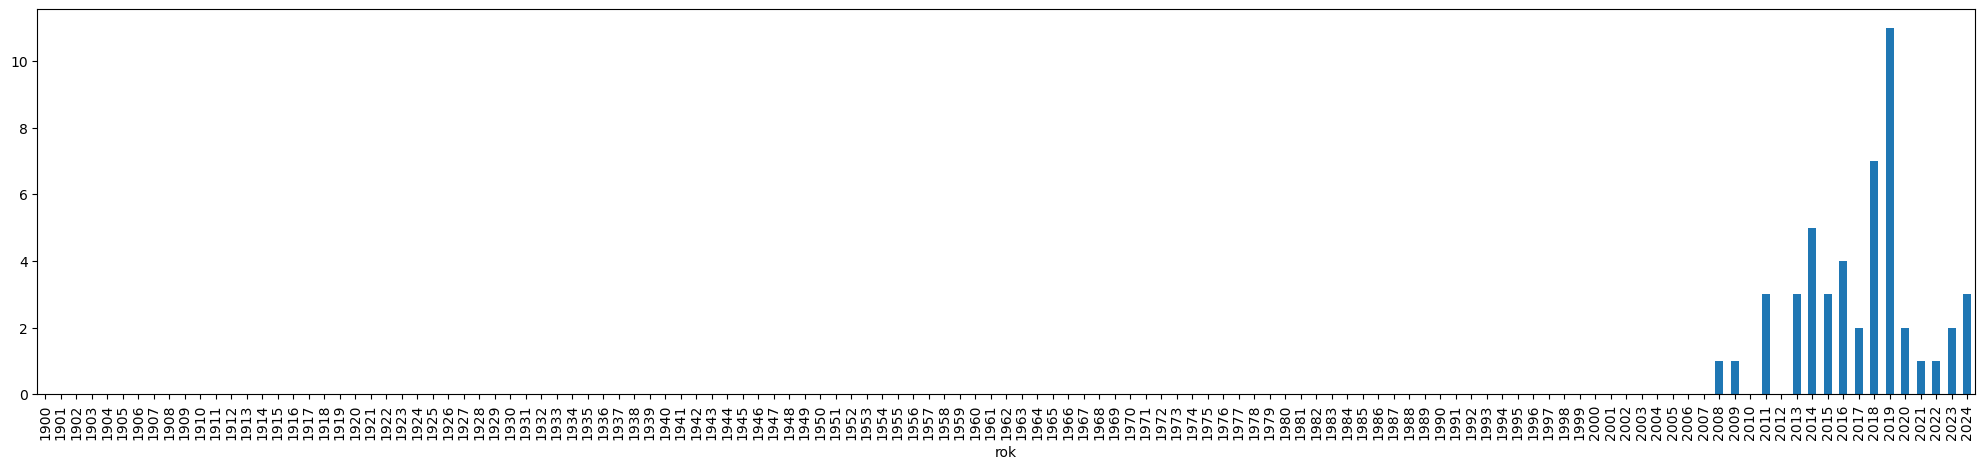

In [311]:
r(df2[df2.apply(lambda row: any("ADHD" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

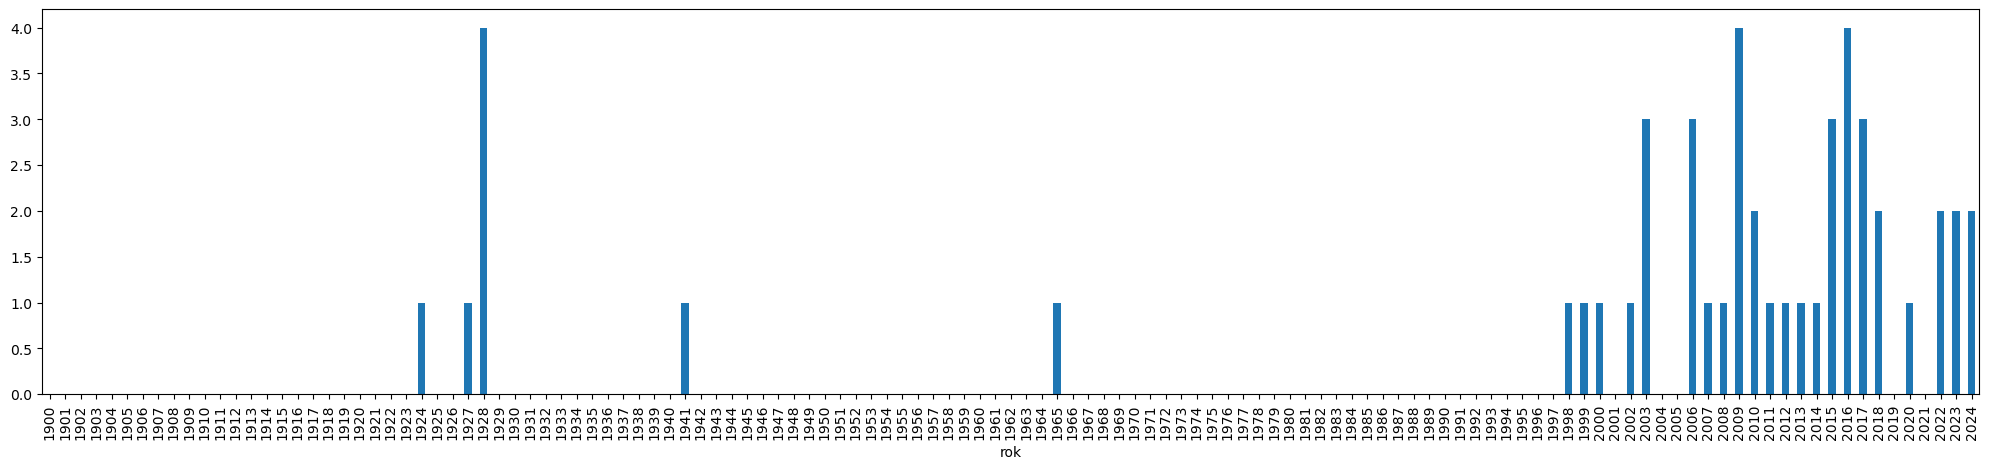

In [310]:
r(df2[df2.apply(lambda row: any("adrenalin" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

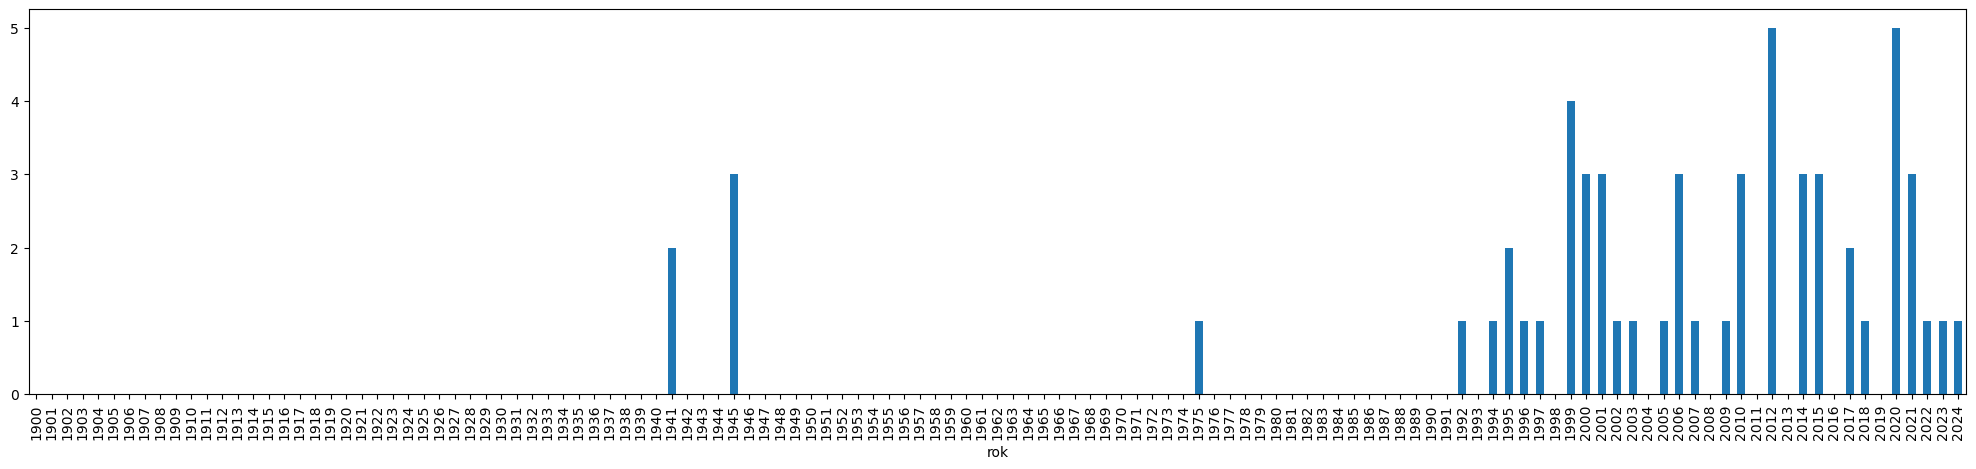

In [309]:
r(df2[df2.apply(lambda row: any("hippi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

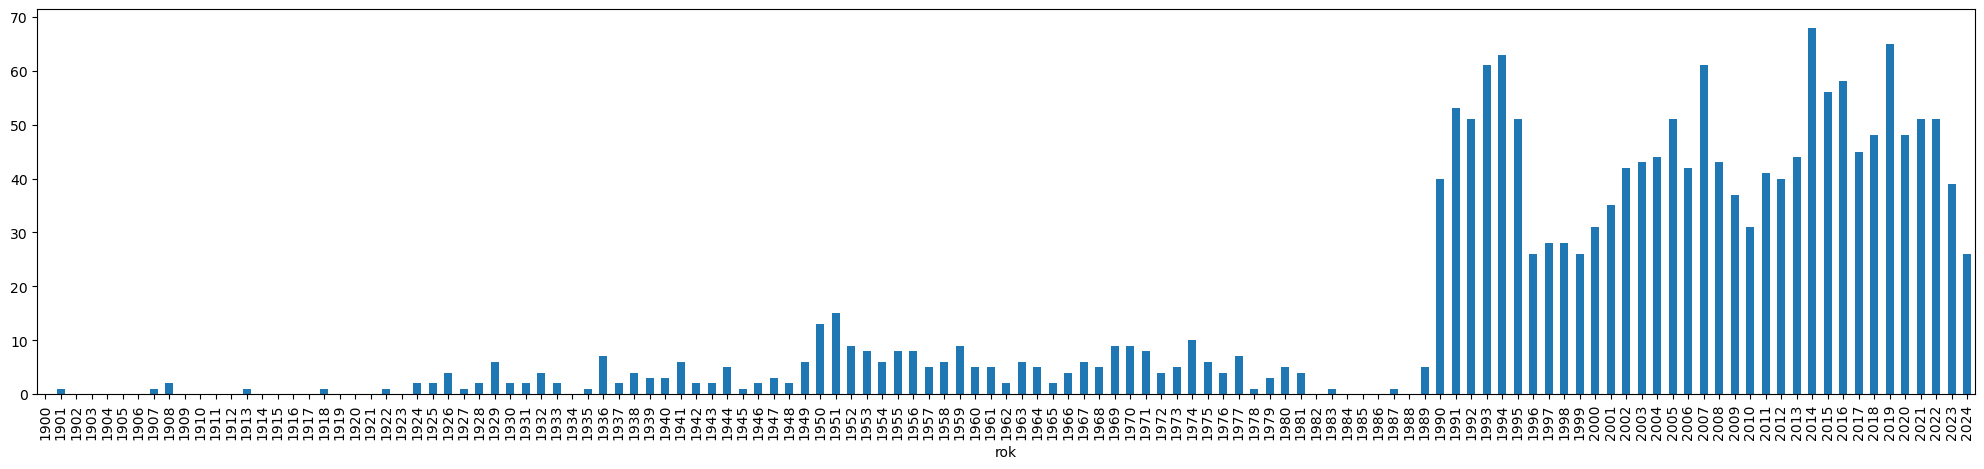

In [308]:
r(df2[df2.apply(lambda row: any("podnika" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

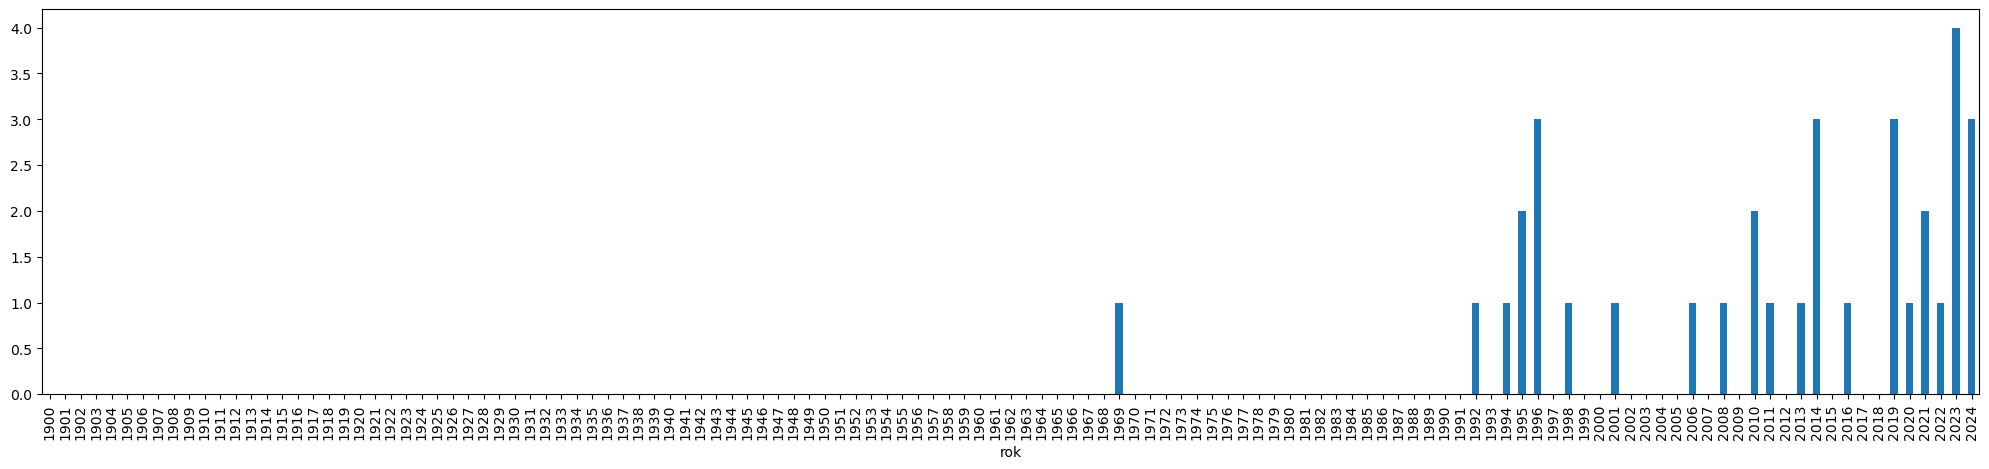

In [304]:
r(df2[df2.apply(lambda row: any("beatn" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

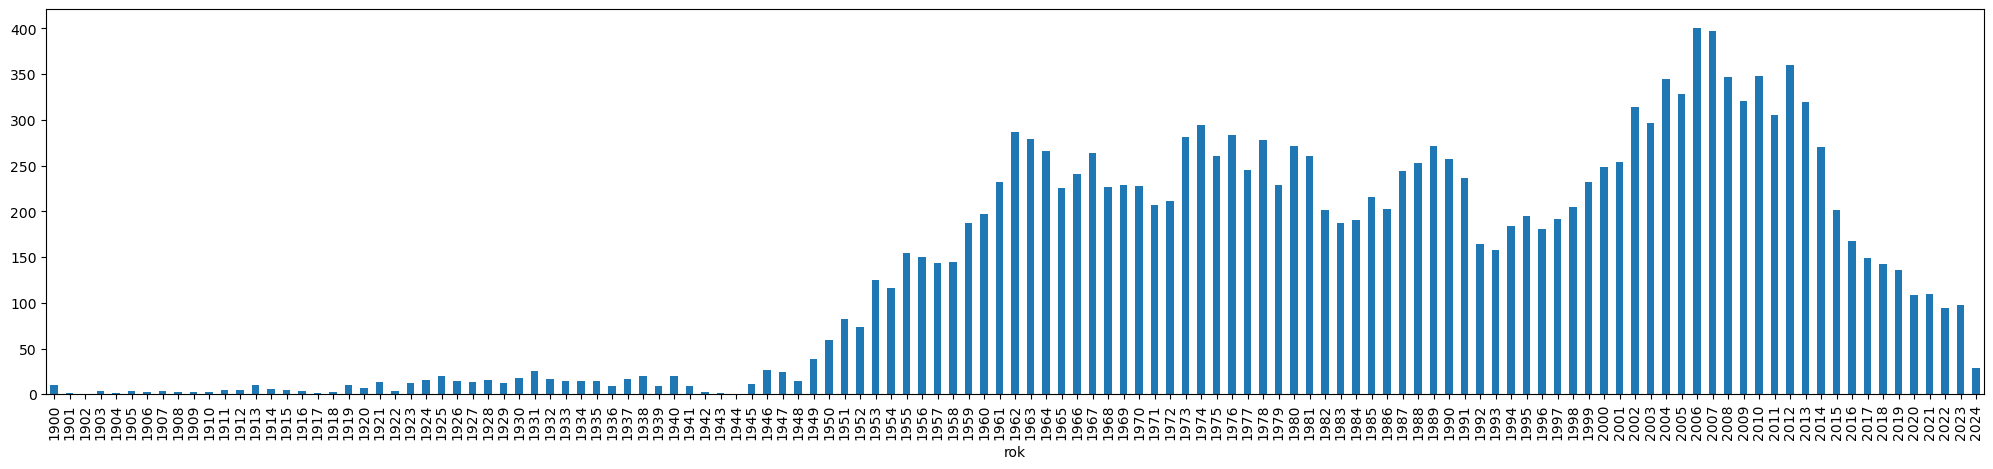

In [302]:
r(df2[df2.apply(lambda row: any("ekonomi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

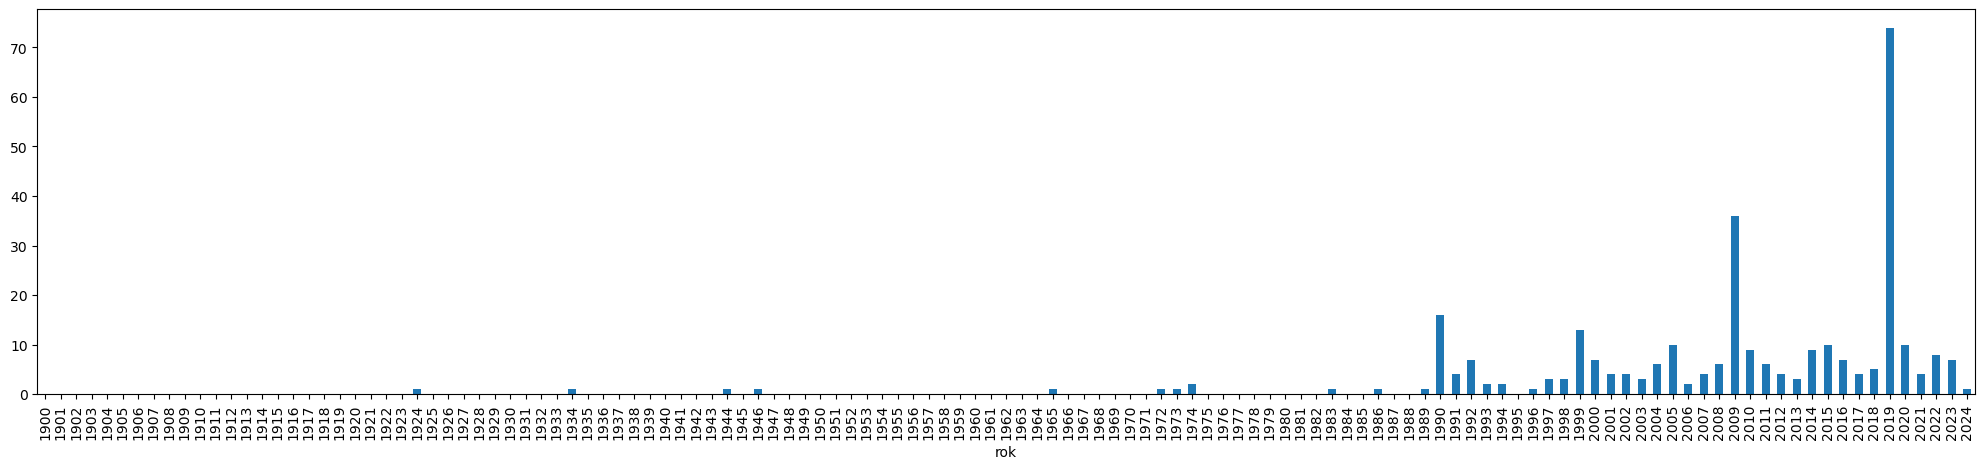

In [301]:
r(df2[df2.apply(lambda row: any("sametov" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

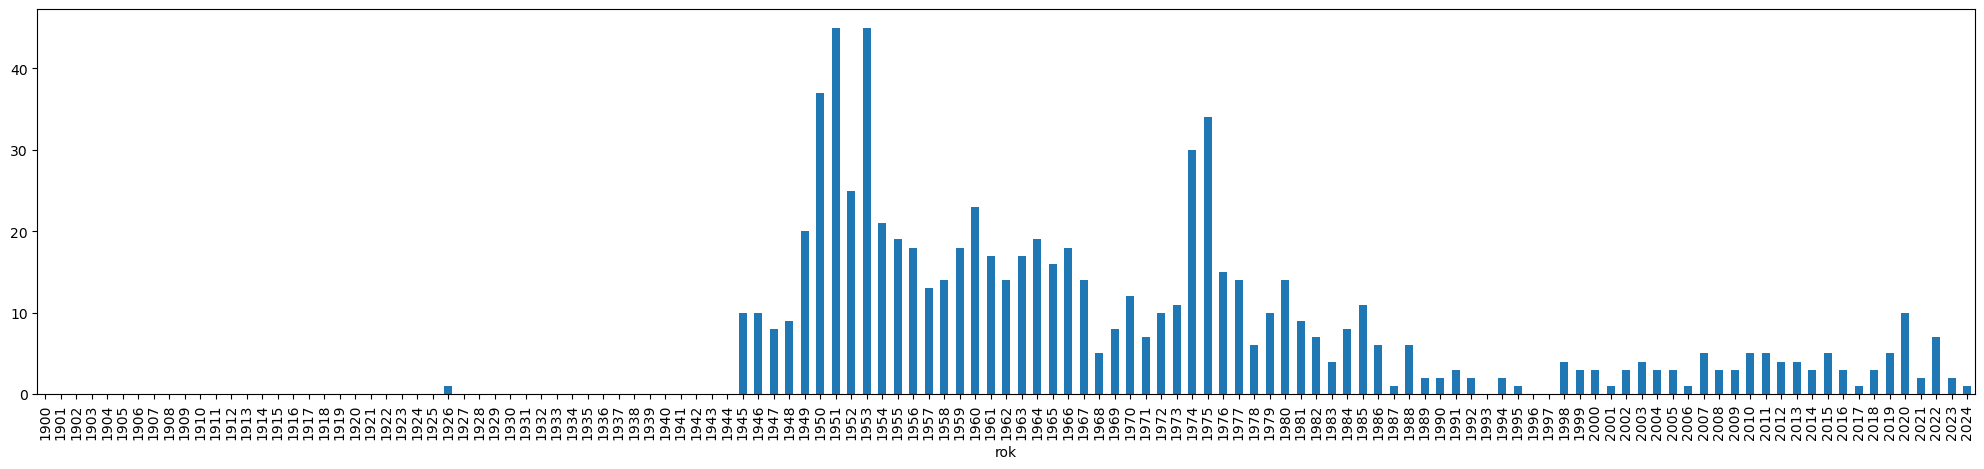

In [299]:
r(df2[df2.apply(lambda row: any("partyz" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

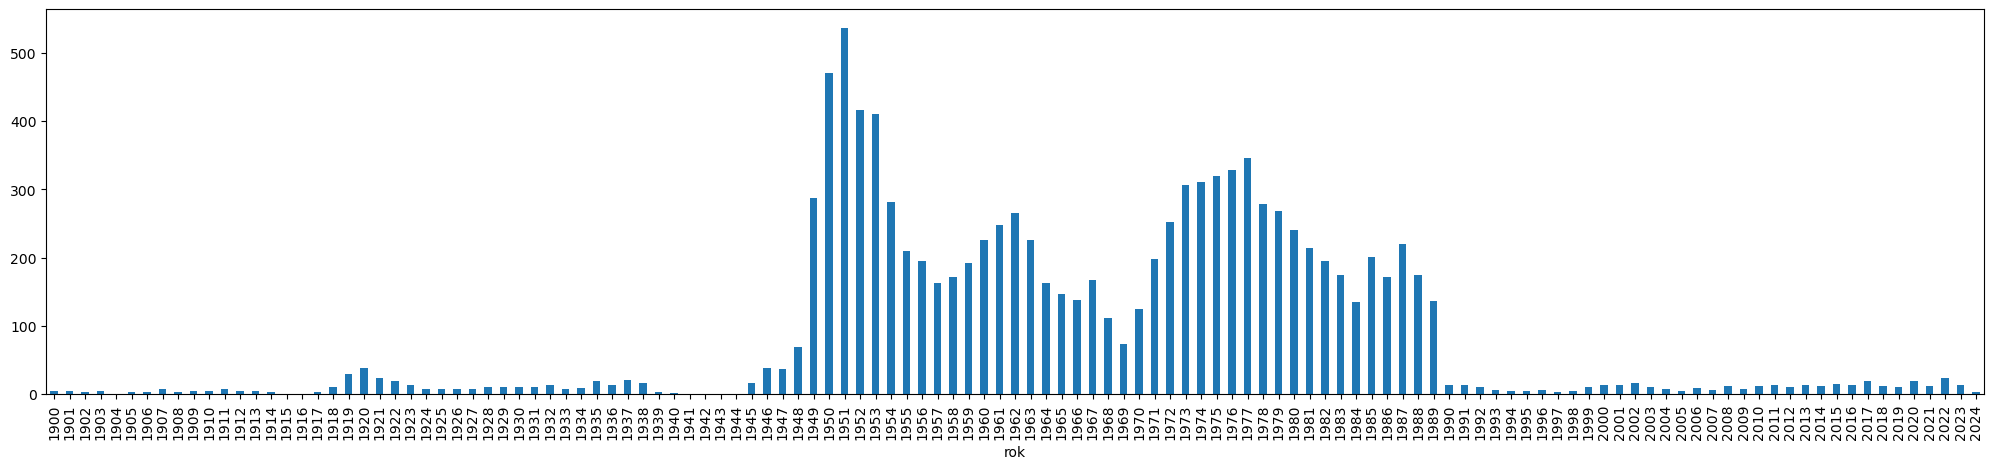

In [272]:
r(df2[df2.apply(lambda row: any("socialis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

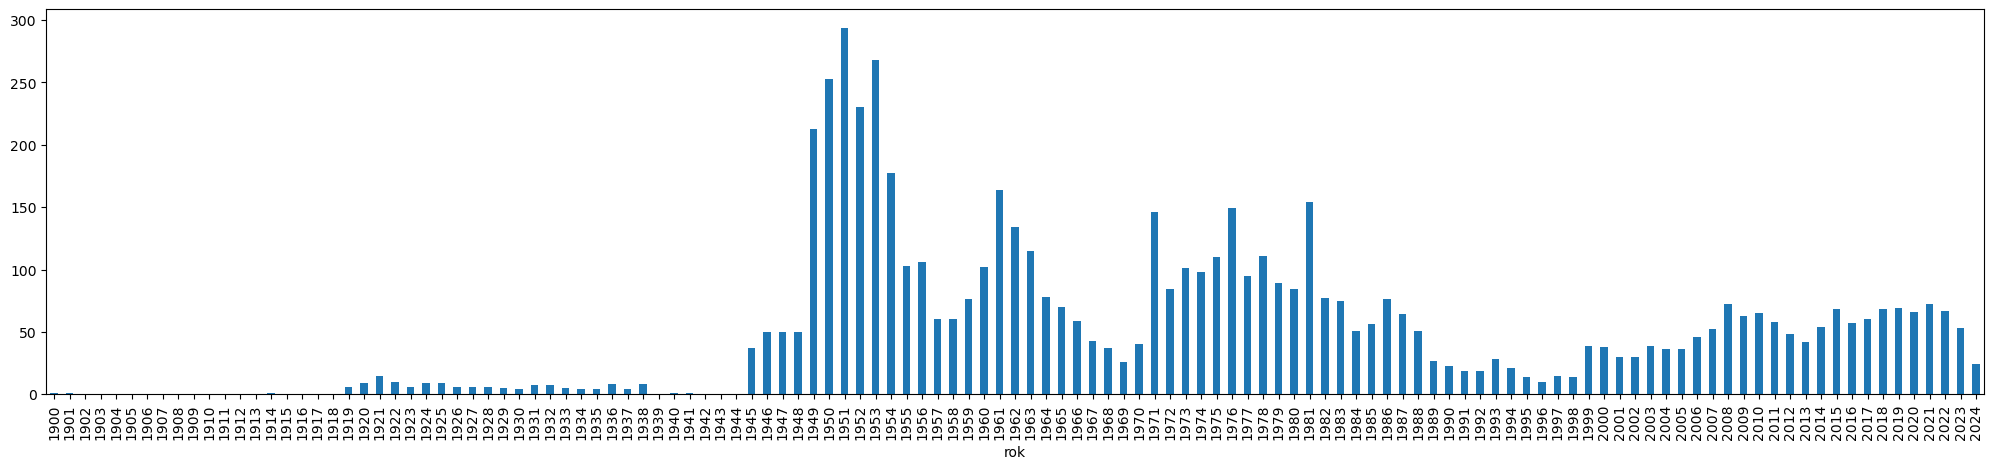

In [273]:
r(df2[df2.apply(lambda row: any("komunis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

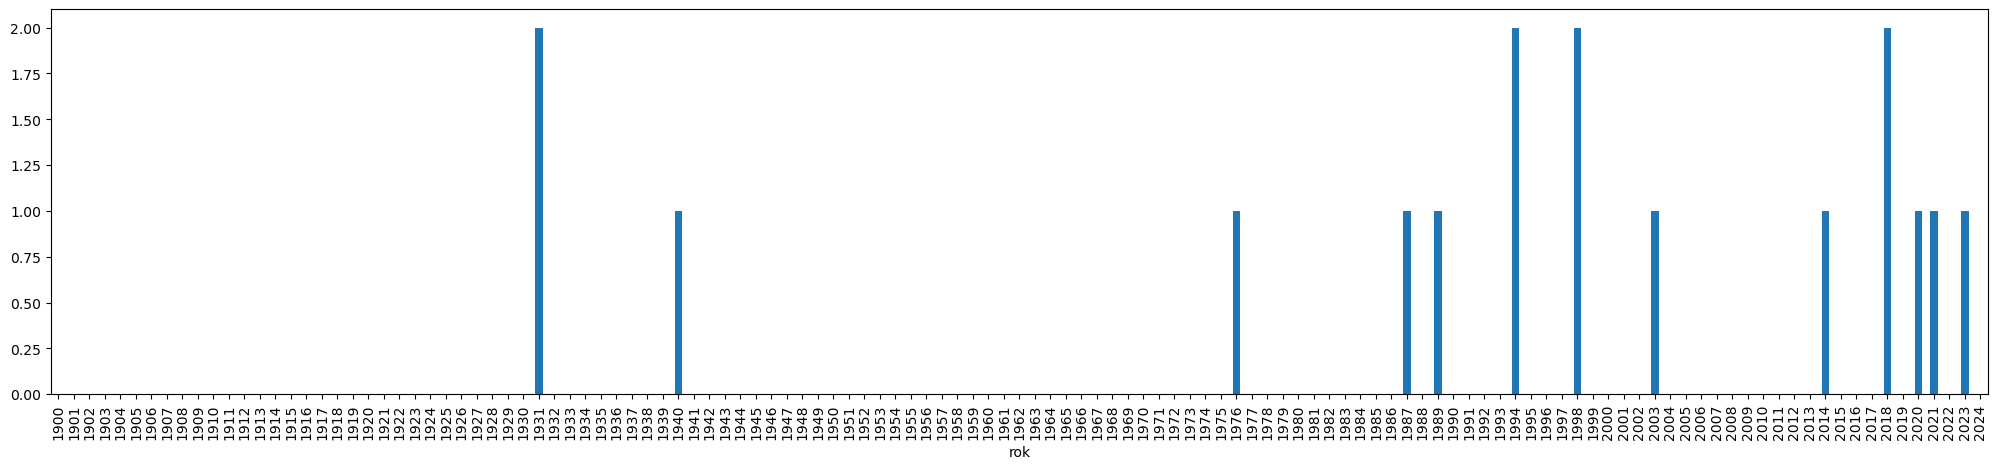

In [274]:
r(df2[df2.apply(lambda row: any("baseball" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

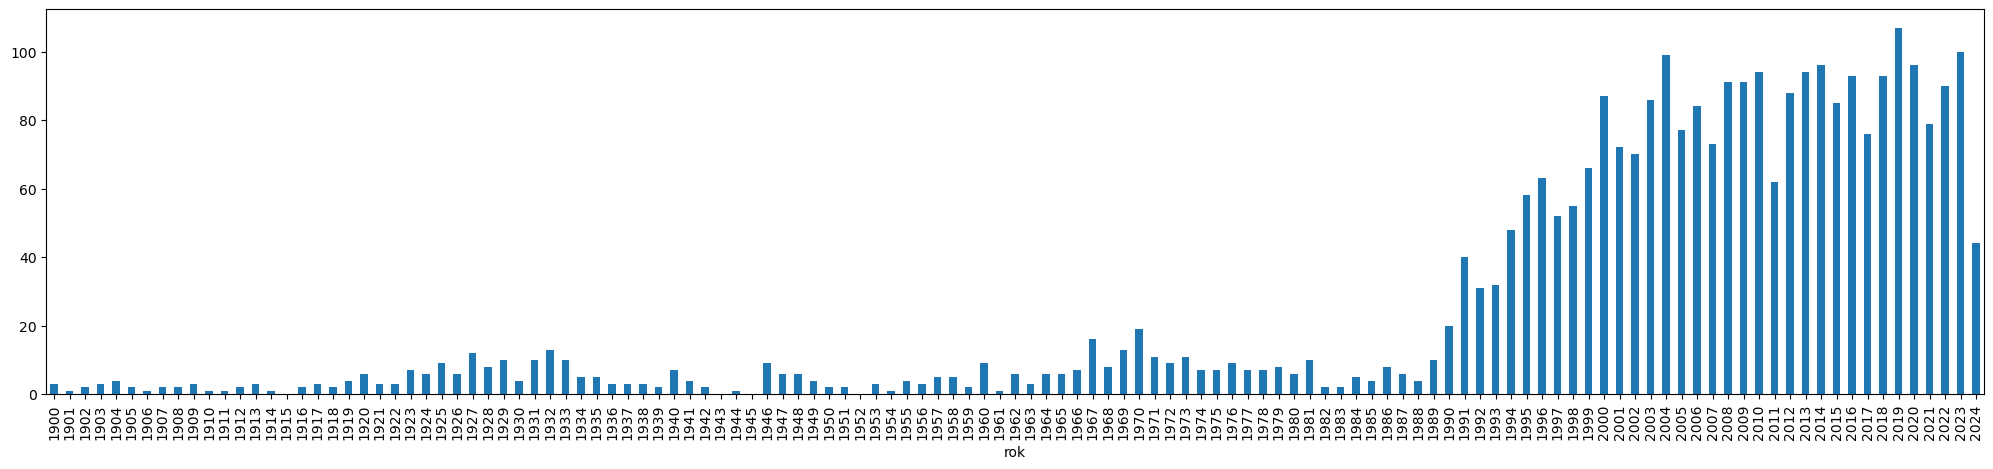

In [275]:
r(df2[df2.apply(lambda row: any("sex" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

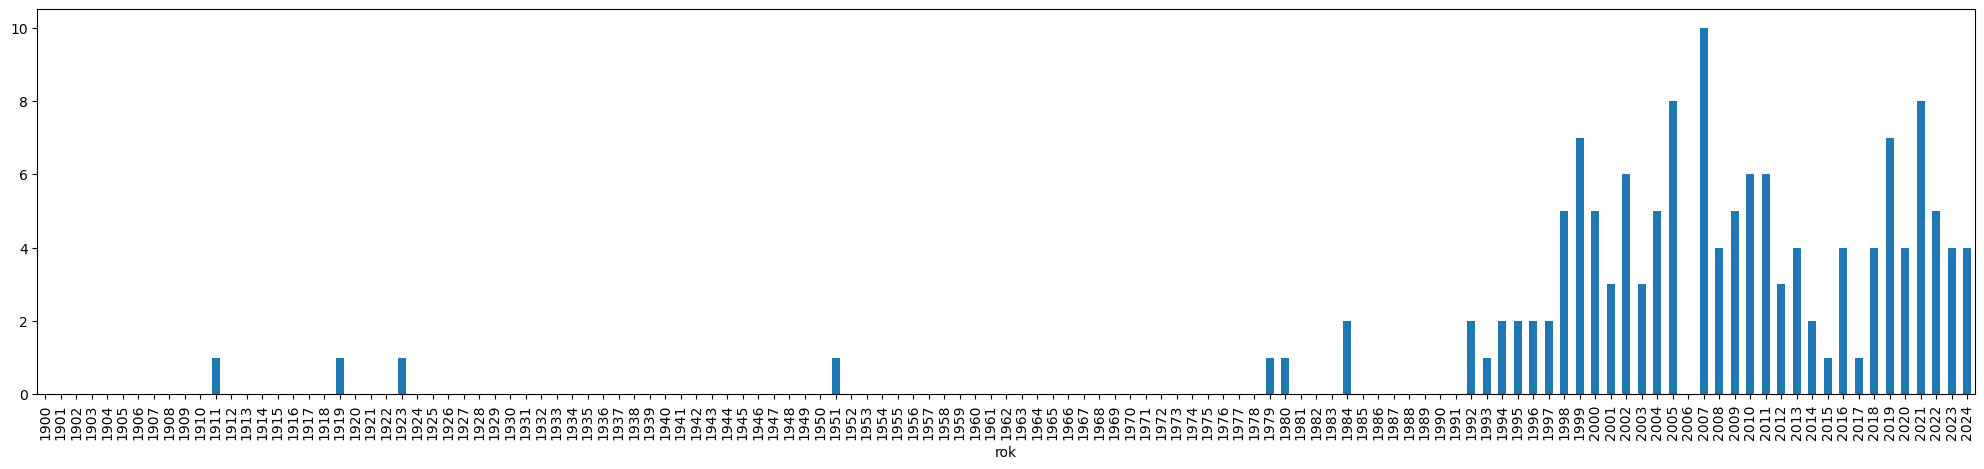

In [276]:
r(df2[df2.apply(lambda row: any("feminism" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

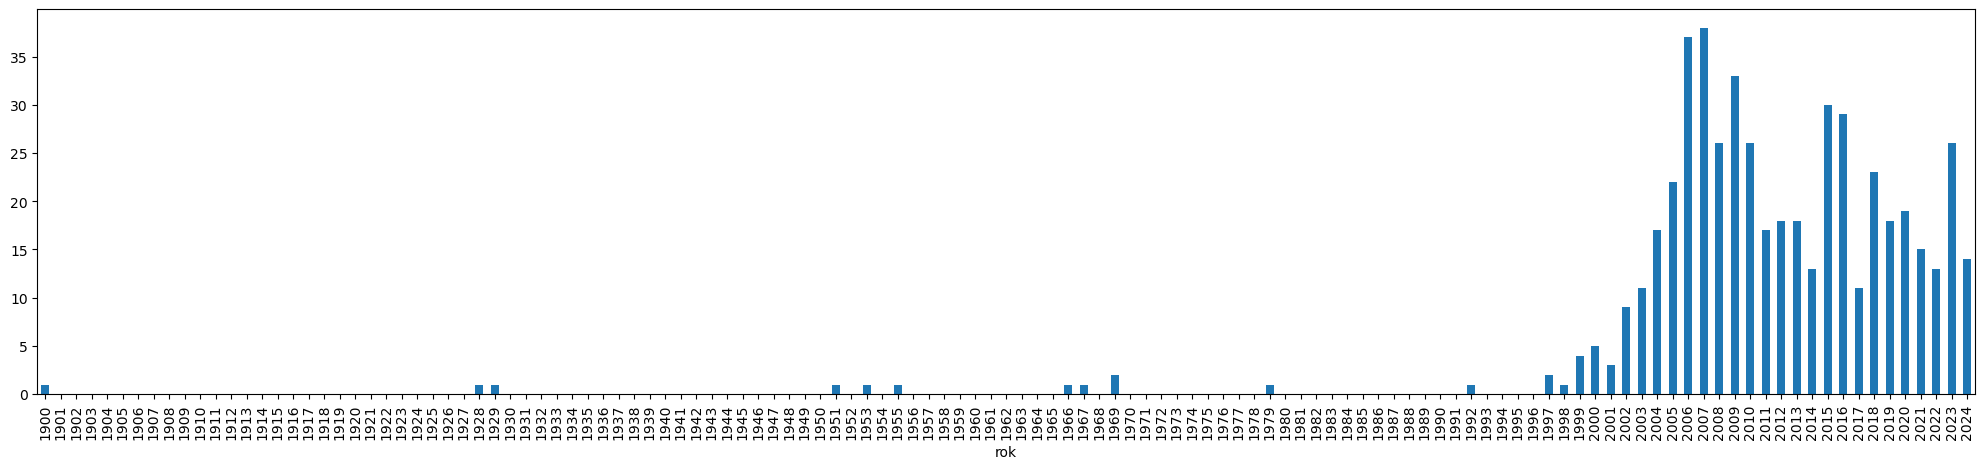

In [277]:
r(df2[df2.apply(lambda row: any("gender" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

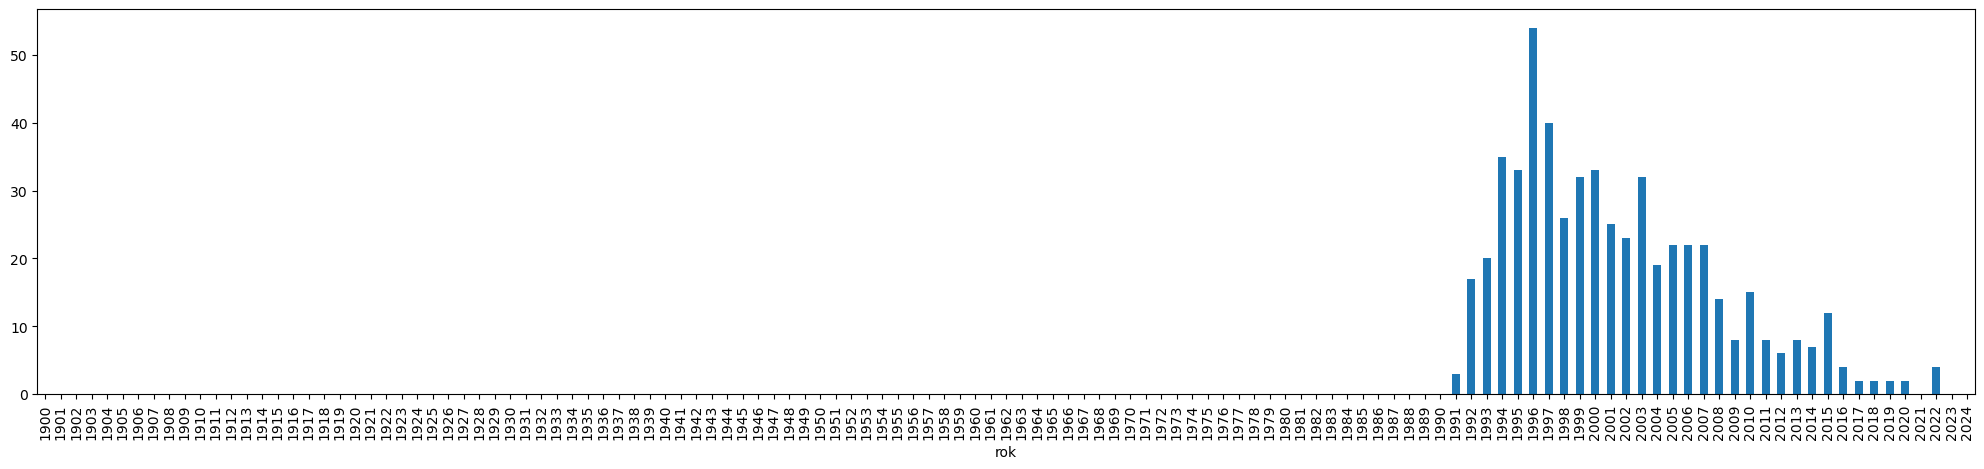

In [240]:
r(df2[df2.apply(lambda row: any("Windows" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

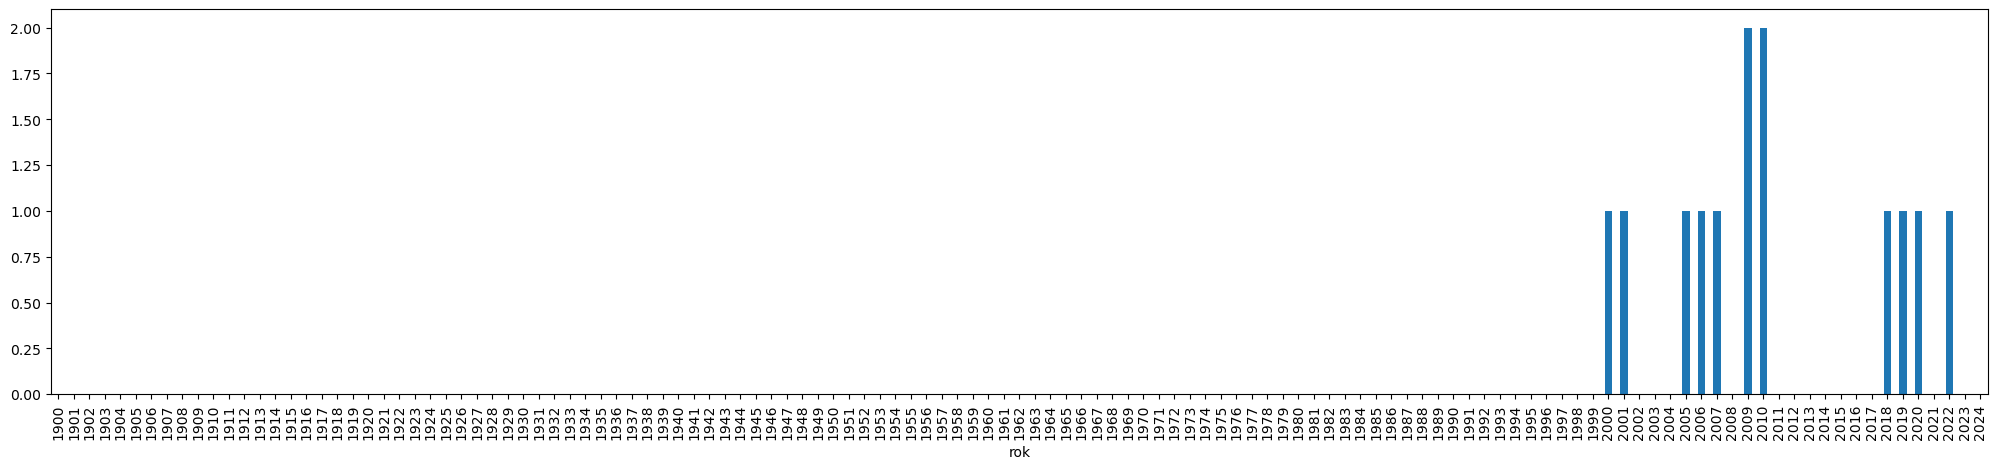

In [279]:
r(df2[df2.apply(lambda row: any("florbal" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

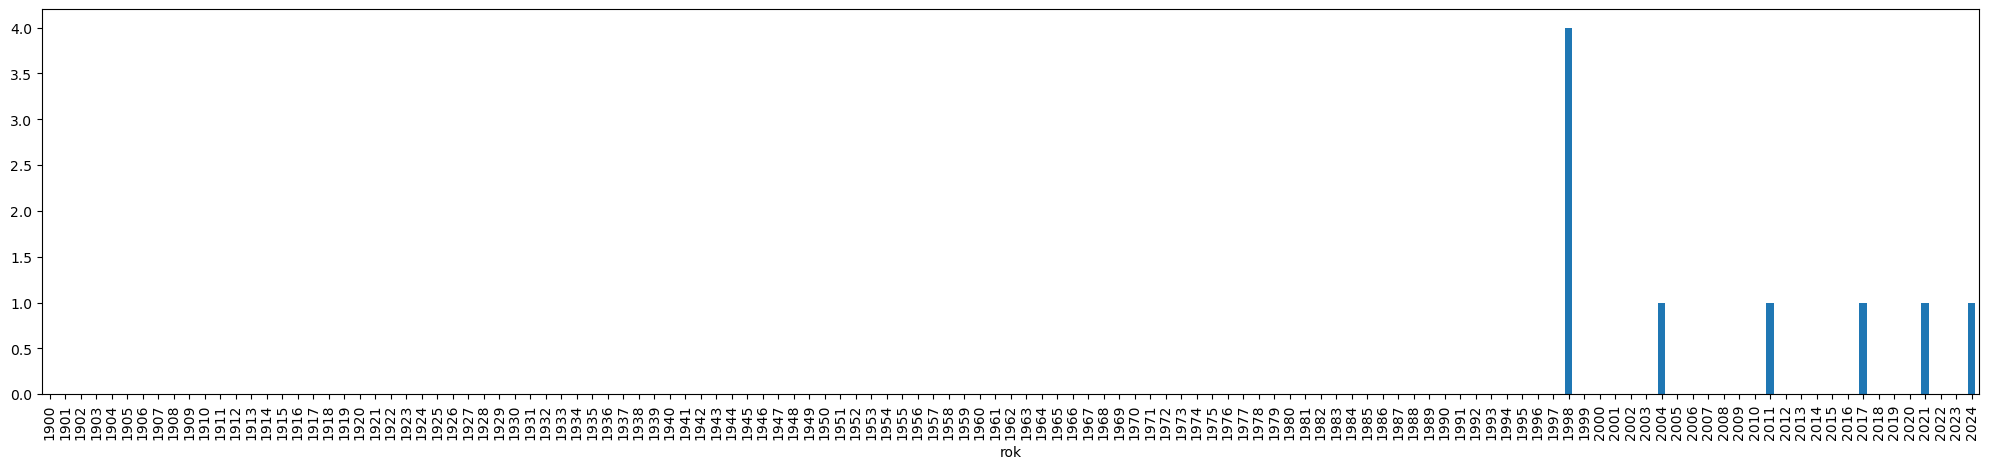

In [235]:
r(df2[df2.apply(lambda row: any("Nagan" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

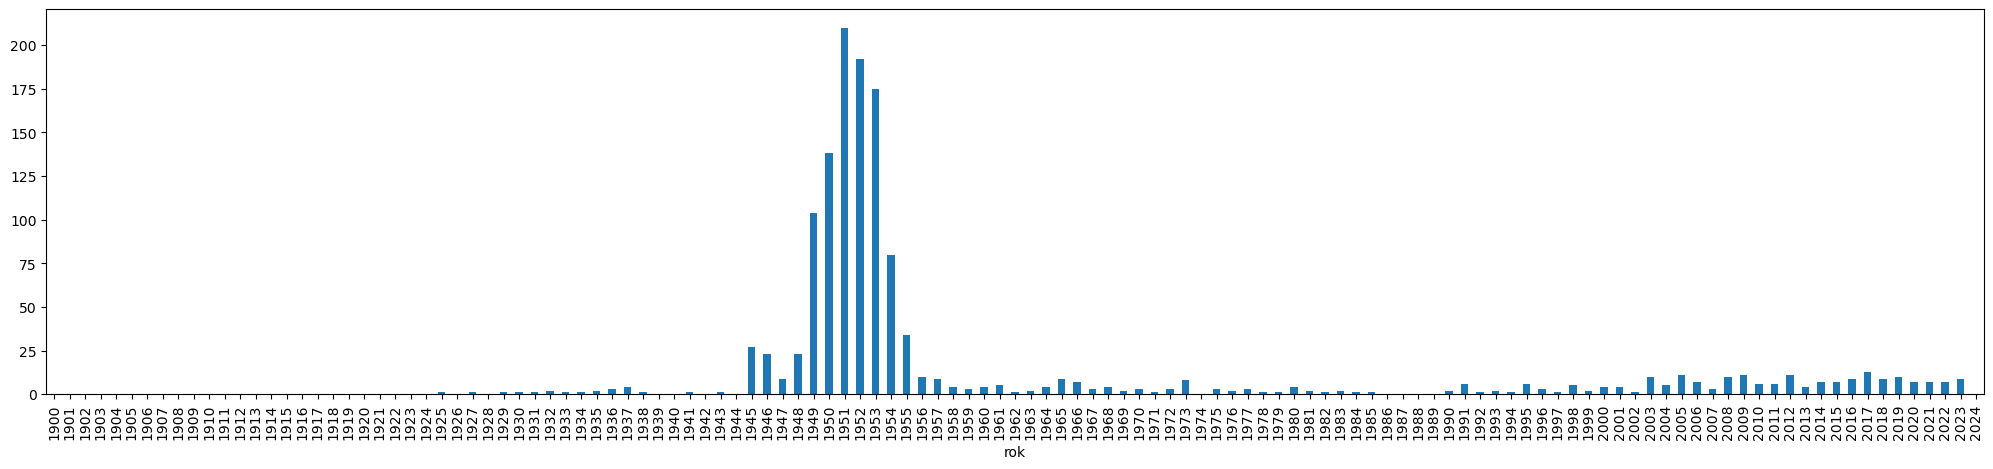

In [260]:
r(df2[df2.apply(lambda row: any("Stalin" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

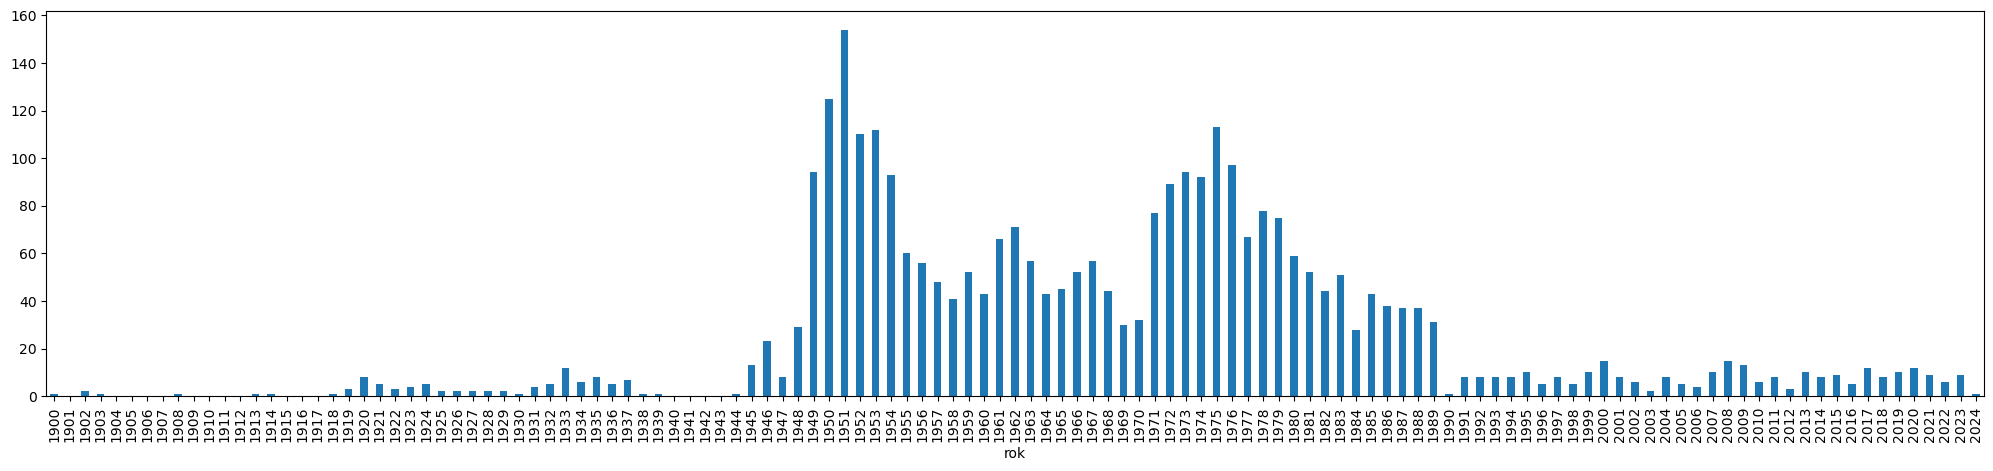

In [263]:
r(df2[df2.apply(lambda row: any("marx" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

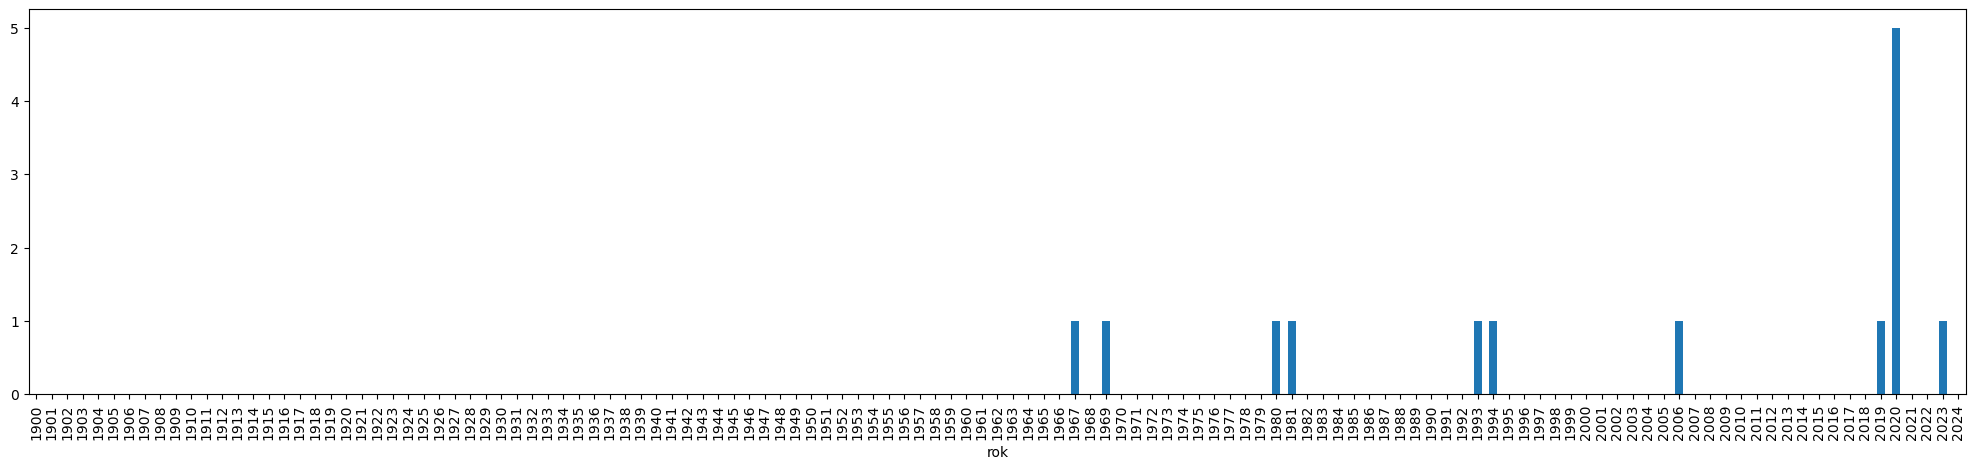

In [232]:
r(df2[df2.apply(lambda row: any("Pelé" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

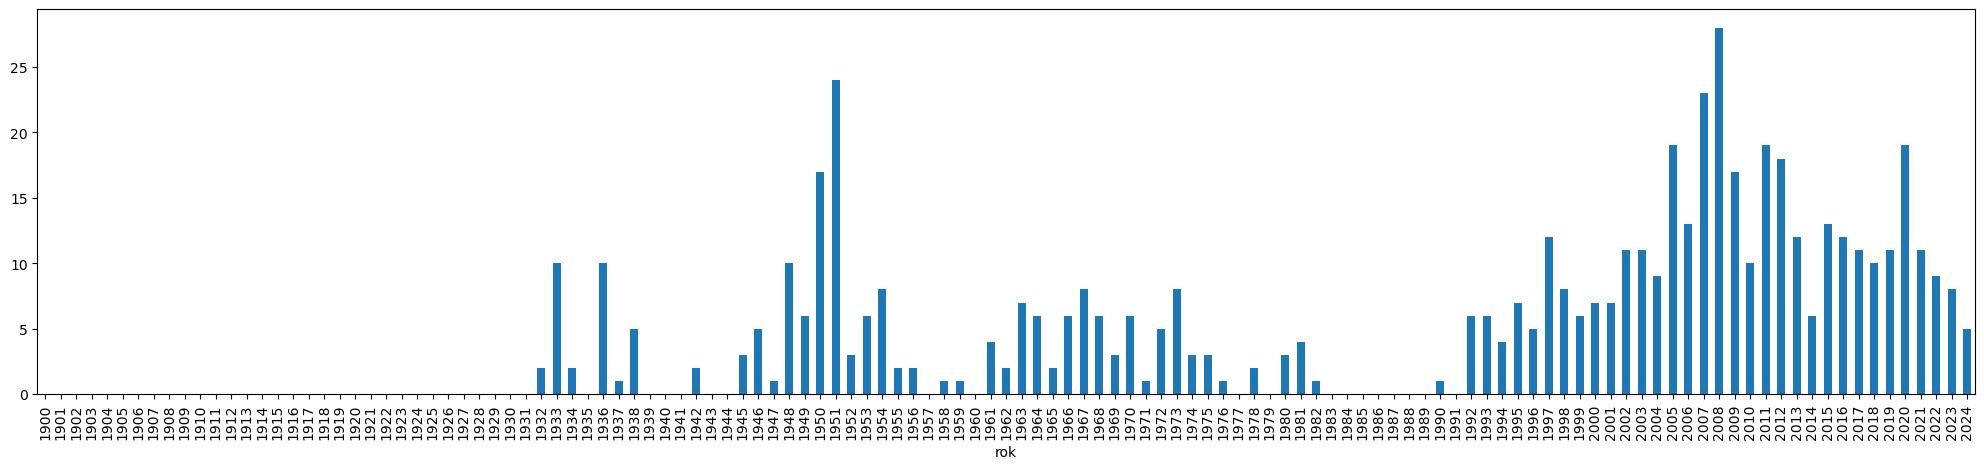

In [228]:
r(df2[df2.apply(lambda row: any("Hitler" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

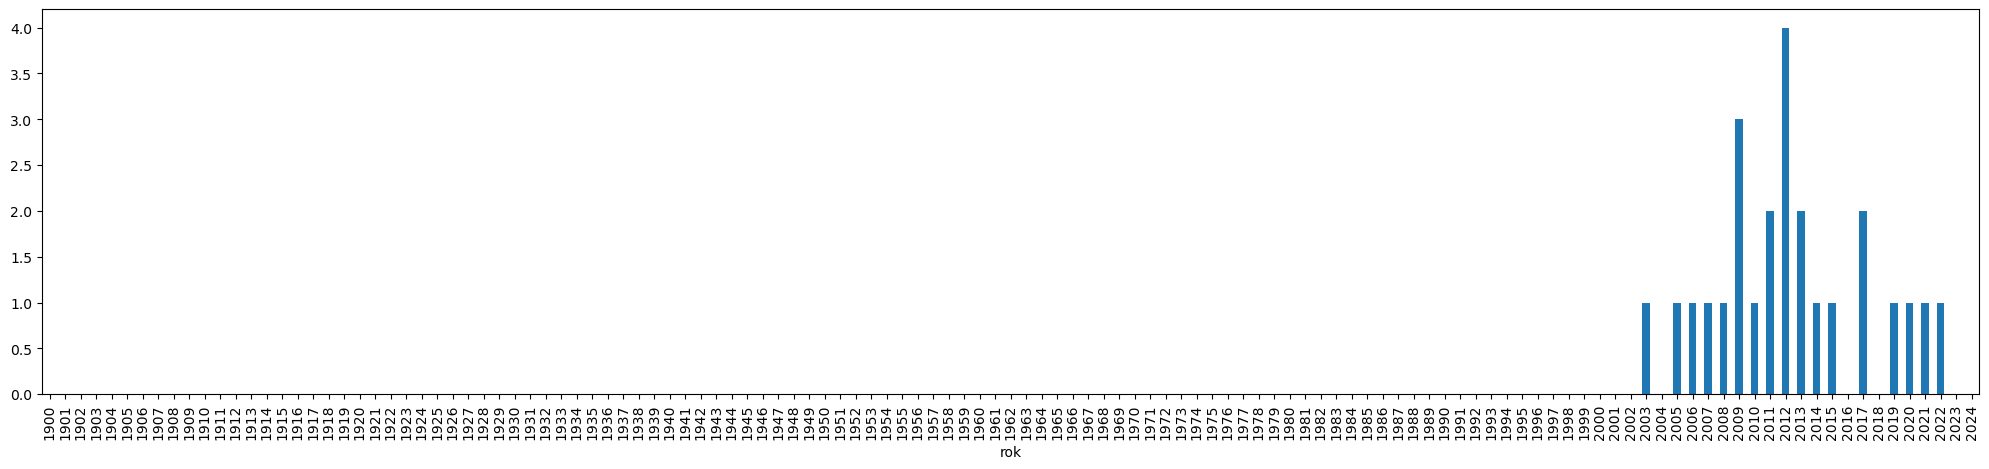

In [230]:
r(df2[df2.apply(lambda row: any("Google" in str(value) for value in row), axis=1)])